In [1]:
import pandas as pd
import folium
import shapefile
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
zhongshan_gpd = gpd.read_file("zhongshan_gpd.geojson")
zhongshan_gpd

VILLCODE COUNTYNAME TOWNNAME VILLNAME           VILLENG COUNTYID  \
0   63000040004        臺北市      中山區      民安里       Min'an Vil.        A   
1   63000040005        臺北市      中山區      康樂里       Kangle Vil.        A   
2   63000040006        臺北市      中山區      中山里    Zhongshan Vil.        A   
3   63000040007        臺北市      中山區      聚盛里      Jucheng Vil.        A   
4   63000040001        臺北市      中山區      正守里    Zhengshou Vil.        A   
5   63000040002        臺北市      中山區      正義里      Zhengyi Vil.        A   
6   63000040003        臺北市      中山區      正得里      Zhengde Vil.        A   
7   63000040008        臺北市      中山區      集英里       Jiying Vil.        A   
8   63000040009        臺北市      中山區      聚葉里         Juye Vil.        A   
9   63000040030        臺北市      中山區      中吉里      Zhongji Vil.        A   
10  63000040031        臺北市      中山區      中原里    Zhongyuan Vil.        A   
11  63000040032        臺北市      中山區      興亞里       Xingya Vil.        A   
12  63000040037        臺北市      中山區      埤頭里        Bitou Vil.        A   
13  63000040038        臺北市      中山區      朱崙里       Zhulun Vil.        A   
14  63000040039        臺北市      中山區      力行里       Lixing Vil.        A   
15  63000040033        臺北市      中山區      中央里    Zhongyang Vil.        A   
16  63000040034        臺北市      中山區      朱馥里        Zhufu Vil.        A   
17  63000040035        臺北市      中山區      龍洲里     Longzhou Vil.        A   
18  63000040036        臺北市      中山區      朱園里      Zhuyuan Vil.        A   
19  63000040020        臺北市      中山區      新福里        Xinfu Vil.        A   
20  63000040021        臺北市      中山區      松江里    Songjiang Vil.        A   
21  63000040026        臺北市      中山區      行孝里     Xingxiao Vil.        A   
22  63000040027        臺北市      中山區      下埤里        Xiabi Vil.        A   
23  63000040028        臺北市      中山區      江寧里    Jiangning Vil.        A   
24  63000040029        臺北市      中山區      江山里    Jiangshan Vil.        A   
25  63000040022        臺北市      中山區      新生里     Xinsheng Vil.        A   
26  63000040023        臺北市      中山區      中庄里  Zhongzhuang Vil.        A   
27  63000040024        臺北市      中山區      行政里    Xingzheng Vil.        A   
28  63000040025        臺北市      中山區      行仁里      Xingren Vil.        A   
29  63000040040        臺北市      中山區      復華里        Fuhua Vil.        A   
30  63000040041        臺北市      中山區      金泰里       Jintai Vil.        A   
31  63000040042        臺北市      中山區      北安里       Bei'an Vil.        A   
32  63000040010        臺北市      中山區      恆安里      Heng'an Vil.        A   
33  63000040015        臺北市      中山區      成功里    Chenggong Vil.        A   
34  63000040016        臺北市      中山區      永安里      Yong'an Vil.        A   
35  63000040017        臺北市      中山區      大佳里        Dajia Vil.        A   
36  63000040018        臺北市      中山區      新喜里        Xinxi Vil.        A   
37  63000040011        臺北市      中山區      晴光里    Qingguang Vil.        A   
38  63000040012        臺北市      中山區      圓山里     Yuanshan Vil.        A   
39  63000040013        臺北市      中山區      劍潭里      Jiantan Vil.        A   
40  63000040014        臺北市      中山區      大直里        Dazhi Vil.        A   
41  63000040019        臺北市      中山區      新庄里    Xinzhuang Vil.        A   

   COUNTYCODE TOWNID  TOWNCODE  NOTE  \
0       63000    A10  63000040  None   
1       63000    A10  63000040  None   
2       63000    A10  63000040  None   
3       63000    A10  63000040  None   
4       63000    A10  63000040  None   
5       63000    A10  63000040  None   
6       63000    A10  63000040  None   
7       63000    A10  63000040  None   
8       63000    A10  63000040  None   
9       63000    A10  63000040  None   
10      63000    A10  63000040  None   
11      63000    A10  63000040  None   
12      63000    A10  63000040  None   
13      63000    A10  63000040  None   
14      63000    A10  63000040  None   
15      63000    A10  63000040  None   
16      63000    A10  63000040  None   
17      63000    A10  63000040  None   
18      63000    A10 

In [3]:
village_list = []
village = pd.read_csv("village.csv")
for i in village["village"]:
    village_list.append(i)
village_list

['民安里',
 '康樂里',
 '中山里',
 '聚盛里',
 '正守里',
 '正義里',
 '正得里',
 '集英里',
 '聚葉里',
 '中吉里',
 '中原里',
 '興亞里',
 '埤頭里',
 '朱崙里',
 '力行里',
 '中央里',
 '朱馥里',
 '龍洲里',
 '朱園里',
 '新福里',
 '松江里',
 '行孝里',
 '下埤里',
 '江寧里',
 '江山里',
 '新生里',
 '中庄里',
 '行政里',
 '行仁里',
 '復華里',
 '金泰里',
 '北安里',
 '恆安里',
 '成功里',
 '永安里',
 '大佳里',
 '新喜里',
 '晴光里',
 '圓山里',
 '劍潭里',
 '大直里',
 '新庄里']

In [4]:
tour_mrt_df = pd.read_csv("tour.csv")
tour_mrt_df

Unnamed: 0 area  enter numb   Longitude  Latitude_x enter name  \
0          NaN  民安里           1  121.520303   25.052414     中山站出口1   
1          NaN  民安里           2  121.521063   25.052382     中山站出口2   
2          NaN  民安里           3  121.521154   25.052611     中山站出口3   
3          NaN  集英里           1  121.519454   25.062641   民權西路站出口1   
4          NaN  集英里           4  121.519867   25.061936   民權西路站出口4   
5          NaN  集英里           3  121.519888   25.061991   民權西路站出口3   
6          NaN  集英里           7  121.520092   25.062670   民權西路站出口7   
7          NaN  集英里           8  121.520602   25.062660   民權西路站出口8   
8          NaN  集英里           9  121.520744   25.063027   民權西路站出口9   
9          NaN  集英里          10  121.519791   25.063063  民權西路站出口10   
10         NaN  聚葉里           2  121.526148   25.062461   中山國小站出口2   
11         NaN  聚葉里           3  121.527114   25.062476   中山國小站出口3   
12         NaN  中吉里           8  121.532826   25.052570   松江南京站出口8   
13         NaN  興亞里           1  121.532388   25.051842   松江南京站出口1   
14         NaN  興亞里           2  121.532875   25.051342   松江南京站出口2   
15         NaN  興亞里           3  121.532870   25.051085   松江南京站出口3   
16         NaN  力行里           2  121.541863   25.051748   南京復興站出口2   
17         NaN  力行里           3  121.543237   25.051719   南京復興站出口4   
18         NaN  力行里           4  121.543237   25.051719   南京復興站出口4   
19         NaN  中央里           6  121.533727   25.052095   松江南京站出口6   
20         NaN  中央里           7  121.533195   25.052470   松江南京站出口7   
21         NaN  朱園里           4  121.533240   25.051624   松江南京站出口4   
22         NaN  朱園里           5  121.534081   25.051882   松江南京站出口5   
23         NaN  松江里           2  121.533342   25.058792    行天宮站出口2   
24         NaN  松江里           3  121.533393   25.059868    行天宮站出口3   
25         NaN  江寧里           0  121.544031   25.060889    中山國中站出口   
26         NaN  新生里           4  121.532991   25.060365    行天宮站出口4   
27         NaN  中庄里           1  121.533004   25.058316    行天宮站出口1   
28         NaN  復華里           1  121.542121   25.052625   南京復興站出口1   
29         NaN  復華里           8  121.543819   25.052018   南京復興站出口8   
30         NaN  北安里           1  121.555226   25.085174    劍南路站出口1   
31         NaN  恆安里           1  121.526095   25.062840   中山國小站出口1   
32         NaN  恆安里           4  121.526835   25.062835   中山國小站出口4   
33         NaN  成功里           2  121.555097   25.084754    劍南路站出口2   
34         NaN  成功里           3  121.556098   25.084484    劍南路站出口3   
35         NaN  永安里           2  121.546823   25.079584     大直站出口2   
36         NaN  永安里           3  121.546901   25.079310     大直站出口3   
37         NaN  圓山里           1  121.520033   25.070785     圓山站出口1   
38         NaN  圓山里           2  121.520108   25.071776     圓山站出口2   
39         NaN  大直里           1  121.547104   25.080118     大直站出口1   

                        geometry  
0   POINT (121.520303 25.052414)  
1   POINT (121.521063 25.052382)  
2   POINT (121.521154 25.052611)  
3   POINT (121.519454 25.062641)  
4   POINT (121.519867 25.061936)  
5   POINT (121.519888 25.061991)  
6    POINT (121.520092 25.06267)  
7    POINT (121.520602 25.06266)  
8   POINT (121.520744 25.063027)  
9   POINT (121.519791 25.063063)  
10  POINT (121.526148 25.062461)  
11  POINT (121.527114 25.062476)  
12   POINT (121.532826 25.05257)  
13  POINT (121.532388 25.051842)  
14  POINT (121.532875 25.051342)  
15   POINT (121.53287 25.051085)  
16  POINT (121.541863 25.051748)  
17  POINT (121.543237 25.051719)  
18  POINT (121.543237 25.051719)  
19  POINT (121.533727 25.052095)  
20   POINT (121.533195 25.05247)  
21   POINT (121.53324 25.051624)  
22  POINT (121.534081 25.051882)  
23  POINT (121.533342 25.058792)  
24  POINT (121.533393 25.059868)  
25  POINT (121.544031 25.060889)  
26  POINT (121.532991 25.060365)  
27  POINT (121.533004 25.058316)  
28  POINT (121.542121 25.052625)  
29  POINT (121.543819 25.052018)  
30  POINT (121.555226 25.085174)  
31   POINT (1

In [5]:
tour_lon_lat_list = []
run = True
c = 0
while run:
    try:
        tour_lon_lat_list.append([tour_df["Latitude"][c], tour_df["Longitude"][c]])
        c += 1
    except:
        print("end")
        run = False
tour_lon_lat_list

end


[]

In [6]:
mrt_df = pd.read_csv("臺北捷運車站出入口座標.csv", encoding="big5")

mrt_df

項次      出入口名稱 出入口編號          經度         緯度 是否為無障礙用
0      1     頂埔站出口1     1  121.418573  24.959283       是
1      2     頂埔站出口2     2  121.419000  24.959310       否
2      3     頂埔站出口3     3  121.419521  24.959769       是
3      4     頂埔站出口4     4  121.420100  24.960390       是
4      5   松山機場站出口1     1  121.552043  25.063631       是
..   ...        ...   ...         ...        ...     ...
380  381     板橋站出口5     5  121.464312  25.015502       是
381  382    新埔民生站出口     0  121.466839  25.026125       是
382  383     幸福站出口1     1  121.460146  25.050126       是
383  384     幸福站出口2     2  121.460593  25.049545       否
384  385  新北產業園區站出口     0  121.459926  25.061548       是

[385 rows x 6 columns]

In [7]:
mrt_df = mrt_df.rename(columns={"經度":"Longitude", "緯度":"Latitude", "出入口編號":"enter number", "出入口名稱":"enter name", "項次":"item"})
mrt_df = mrt_df.drop(["是否為無障礙用"], axis=1)
mrt_df.to_csv("mrt.csv", encoding="big5")


In [8]:
mrt_df

item enter name enter number   Longitude   Latitude
0       1     頂埔站出口1            1  121.418573  24.959283
1       2     頂埔站出口2            2  121.419000  24.959310
2       3     頂埔站出口3            3  121.419521  24.959769
3       4     頂埔站出口4            4  121.420100  24.960390
4       5   松山機場站出口1            1  121.552043  25.063631
..    ...        ...          ...         ...        ...
380   381     板橋站出口5            5  121.464312  25.015502
381   382    新埔民生站出口            0  121.466839  25.026125
382   383     幸福站出口1            1  121.460146  25.050126
383   384     幸福站出口2            2  121.460593  25.049545
384   385  新北產業園區站出口            0  121.459926  25.061548

[385 rows x 5 columns]

In [9]:
mrt_zhongshan_df = pd.read_excel("mrt_df.xlsx")
mrt_zhongshan_df

Unnamed: 0  item enter name  enter number   Longitude   Latitude
0            1     1    中山國中站出口             0  121.544031  25.060889
1            2     2     大直站出口1             1  121.547104  25.080118
2            3     3     大直站出口2             2  121.546823  25.079584
3            4     4     大直站出口3             3  121.546901  25.079310
4            5     5    劍南路站出口1             1  121.555226  25.085174
5            6     6    劍南路站出口2             2  121.555097  25.084754
6            7     7    劍南路站出口3             3  121.556098  25.084484
7            8     8   民權西路站出口1             1  121.519454  25.062641
8            9     9   民權西路站出口4             4  121.519867  25.061936
9           10    10   民權西路站出口3             3  121.519888  25.061991
10          11    11   民權西路站出口7             7  121.520092  25.062670
11          12    12   民權西路站出口8             8  121.520602  25.062660
12          13    13   民權西路站出口9             9  121.520744  25.063027
13          14    14  民權西路站出口10            10  121.519791  25.063063
14          15    15     圓山站出口1             1  121.520033  25.070785
15          16    16     圓山站出口2             2  121.520108  25.071776
16          17    17   中山國小站出口1             1  121.526095  25.062840
17          18    18   中山國小站出口2             2  121.526148  25.062461
18          19    19   中山國小站出口3             3  121.527114  25.062476
19          20    20   中山國小站出口4             4  121.526835  25.062835
20          21    21    行天宮站出口1             1  121.533004  25.058316
21          22    22    行天宮站出口2             2  121.533342  25.058792
22          23    23    行天宮站出口3             3  121.533393  25.059868
23          24    24    行天宮站出口4             4  121.532991  25.060365
24          25    25   南京復興站出口1             1  121.542121  25.052625
25          26    26   南京復興站出口2             2  121.541863  25.051748
26          27    27   南京復興站出口4             4  121.543237  25.051719
27          28    28   南京復興站出口8             8  121.543819  25.052018
28          29    29     中山站出口1             1  121.520303  25.052414
29          30    30     中山站出口4             4  121.520306  25.052858
30          31    31     中山站出口2             2  121.521063  25.052382
31          32    32     中山站出口3             3  121.521154  25.052611
32          33    33   松江南京站出口1             1  121.532388  25.051842
33          34    34   松江南京站出口2             2  121.532875  25.051342
34          35    35   松江南京站出口3             3  121.532870  25.051085
35          36    36   松江南京站出口4             4  121.533240  25.051624
36          37    37   松江南京站出口5             5  121.534081  25.051882
37          38    38   松江南京站出口6             6  121.533727  25.052095
38          39    39   松江南京站出口7             7  121.533195  25.052470
39          40    40   松江南京站出口8             8  121.532826  25.052570

In [43]:
mrt_lon_lat_list = []
run = True
c = 0
while run:
    try:
        mrt_lon_lat_list.append([mrt_df["Latitude"][c], mrt_df["Longitude"][c]])
        c += 1
    except:
        print("end")
        run = False
mrt_lon_lat_list

end


[[24.9592829, 121.4185726],
 [24.95931, 121.419],
 [24.9597693, 121.4195208],
 [24.96039, 121.4201],
 [25.0636308, 121.5520427],
 [25.0635351, 121.5509869],
 [25.0631707, 121.5518415],
 [25.060889, 121.544031],
 [25.041797, 121.543143],
 [25.041458, 121.5434792],
 [25.041467, 121.544806],
 [25.041772, 121.54506],
 [25.04202, 121.543985],
 [25.033508, 121.541949],
 [25.033515, 121.541826],
 [25.033241, 121.54233],
 [25.0336302, 121.543802],
 [25.032862, 121.543719],
 [25.034006, 121.543749],
 [25.026154, 121.543636],
 [25.023852, 121.552737],
 [25.018554, 121.558606],
 [25.005119, 121.557021],
 [24.999383, 121.557737],
 [24.9986402, 121.5684518],
 [24.998174, 121.573417],
 [24.9982988, 121.579942],
 [24.997971, 121.579321],
 [25.080118, 121.547104],
 [25.079584, 121.546823],
 [25.07931, 121.546901],
 [25.085174, 121.555226],
 [25.084754, 121.555097],
 [25.084484, 121.556098],
 [25.082339, 121.566647],
 [25.082023, 121.567141],
 [25.080152, 121.57556],
 [25.080065, 121.574704],
 [25.0786

In [ ]:
mrt_lon_lat_list1 = []
run = True
c = 0
while run:
    try:
        mrt_lon_lat_list1.append([mrt_zhongshan_df["Latitude"][c], mrt_zhongshan_df["Longitude"][c]])
        c += 1
    except:
        print("end")
        run = False
mrt_lon_lat_list1

In [11]:
zhongshan_map = zhongshan_gpd.explore(
                                     column="VILLNAME", # make choropleth based on "BoroName" column
                                     tooltip="VILLNAME", # show "BoroName" value in tooltip (on hover)
                                     popup=True, # show all values in popup (on click)
                                     legend=False,
                                     tiles="CartoDB positron", # use "CartoDB positron" tiles
                                     cmap="Set1", # use "Set1" matplotlib colormap
                                     style_kwds=dict(color="black",weight=1, opacity=1, fillOpacity=.1) # use black outline    
                                    )
zhongshan_map

In [12]:
c = 0
for marker in tour_lon_lat_list:
    folium.Marker(marker, popup = f"{c} {marker}", icon=folium.Icon(color='green')).add_to(zhongshan_map)
    c += 1
zhongshan_map

In [44]:
c = 0
for marker in mrt_lon_lat_list:
    folium.Marker(marker, popup = f"{c} {marker}", icon=folium.Icon(color='red')).add_to(zhongshan_map)
    c += 1
zhongshan_map

In [14]:
num = list(range(1,43))
tour_df = pd.DataFrame(columns=["village"],index=num)
tour_df

village
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21     NaN
22     NaN
23     NaN
24     NaN
25     NaN
26     NaN
27     NaN
28     NaN
29     NaN
30     NaN
31     NaN
32     NaN
33     NaN
34     NaN
35     NaN
36     NaN
37     NaN
38     NaN
39     NaN
40     NaN
41     NaN
42     NaN

In [15]:
tour_df["village"] = village_list
tour_df

village
1      民安里
2      康樂里
3      中山里
4      聚盛里
5      正守里
6      正義里
7      正得里
8      集英里
9      聚葉里
10     中吉里
11     中原里
12     興亞里
13     埤頭里
14     朱崙里
15     力行里
16     中央里
17     朱馥里
18     龍洲里
19     朱園里
20     新福里
21     松江里
22     行孝里
23     下埤里
24     江寧里
25     江山里
26     新生里
27     中庄里
28     行政里
29     行仁里
30     復華里
31     金泰里
32     北安里
33     恆安里
34     成功里
35     永安里
36     大佳里
37     新喜里
38     晴光里
39     圓山里
40     劍潭里
41     大直里
42     新庄里

In [16]:
mrt_zhongshan_df

Unnamed: 0  item enter name  enter number   Longitude   Latitude
0            1     1    中山國中站出口             0  121.544031  25.060889
1            2     2     大直站出口1             1  121.547104  25.080118
2            3     3     大直站出口2             2  121.546823  25.079584
3            4     4     大直站出口3             3  121.546901  25.079310
4            5     5    劍南路站出口1             1  121.555226  25.085174
5            6     6    劍南路站出口2             2  121.555097  25.084754
6            7     7    劍南路站出口3             3  121.556098  25.084484
7            8     8   民權西路站出口1             1  121.519454  25.062641
8            9     9   民權西路站出口4             4  121.519867  25.061936
9           10    10   民權西路站出口3             3  121.519888  25.061991
10          11    11   民權西路站出口7             7  121.520092  25.062670
11          12    12   民權西路站出口8             8  121.520602  25.062660
12          13    13   民權西路站出口9             9  121.520744  25.063027
13          14    14  民權西路站出口10            10  121.519791  25.063063
14          15    15     圓山站出口1             1  121.520033  25.070785
15          16    16     圓山站出口2             2  121.520108  25.071776
16          17    17   中山國小站出口1             1  121.526095  25.062840
17          18    18   中山國小站出口2             2  121.526148  25.062461
18          19    19   中山國小站出口3             3  121.527114  25.062476
19          20    20   中山國小站出口4             4  121.526835  25.062835
20          21    21    行天宮站出口1             1  121.533004  25.058316
21          22    22    行天宮站出口2             2  121.533342  25.058792
22          23    23    行天宮站出口3             3  121.533393  25.059868
23          24    24    行天宮站出口4             4  121.532991  25.060365
24          25    25   南京復興站出口1             1  121.542121  25.052625
25          26    26   南京復興站出口2             2  121.541863  25.051748
26          27    27   南京復興站出口4             4  121.543237  25.051719
27          28    28   南京復興站出口8             8  121.543819  25.052018
28          29    29     中山站出口1             1  121.520303  25.052414
29          30    30     中山站出口4             4  121.520306  25.052858
30          31    31     中山站出口2             2  121.521063  25.052382
31          32    32     中山站出口3             3  121.521154  25.052611
32          33    33   松江南京站出口1             1  121.532388  25.051842
33          34    34   松江南京站出口2             2  121.532875  25.051342
34          35    35   松江南京站出口3             3  121.532870  25.051085
35          36    36   松江南京站出口4             4  121.533240  25.051624
36          37    37   松江南京站出口5             5  121.534081  25.051882
37          38    38   松江南京站出口6             6  121.533727  25.052095
38          39    39   松江南京站出口7             7  121.533195  25.052470
39          40    40   松江南京站出口8             8  121.532826  25.052570

In [17]:
lat_lon_mrt = "mrt.gpkg"
lat_lon_mrt = gpd.read_file(lat_lon_mrt, driver='GPKG')
lat_lon_mrt

C:\Users\Frank\anaconda3\lib\site-packages\fiona\collection.py:208: FeatureWarning: Empty field name at index 0
  self._schema = self.session.get_schema()
C:\Users\Frank\anaconda3\lib\site-packages\geopandas\geodataframe.py:630: UserWarning: Empty field name at index 0
  for feature in features_lst:


item                                         enter name  \
0    None    1                b'\xb3\xbb\xaeH\xaf\xb8\xa5X\xa4f1'   
1    None    2                b'\xb3\xbb\xaeH\xaf\xb8\xa5X\xa4f2'   
2    None    3                b'\xb3\xbb\xaeH\xaf\xb8\xa5X\xa4f3'   
3    None    4                b'\xb3\xbb\xaeH\xaf\xb8\xa5X\xa4f4'   
4    None    5   b'\xaaQ\xa4s\xbe\xf7\xb3\xf5\xaf\xb8\xa5X\xa4f1'   
..    ...  ...                                                ...   
380  None  381                b'\xaaO\xbe\xf4\xaf\xb8\xa5X\xa4f5'   
381  None  382    b'\xb7s\xaeH\xa5\xc1\xa5\xcd\xaf\xb8\xa5X\xa4f'   
382  None  383             b'\xa9\xaf\xba\xd6\xaf\xb8\xa5X\xa4f1'   
383  None  384             b'\xa9\xaf\xba\xd6\xaf\xb8\xa5X\xa4f2'   
384  None  385  b'\xb7s\xa5_\xb2\xa3\xb7~\xb6\xe9\xb0\xcf\xaf\...   

    enter number   Longitude   Latitude                    geometry  
0              1  121.418573  24.959283  POINT (121.41857 24.95928)  
1              2  121.419000  24.959310  POINT (121.41900 24.95931)  
2              3  121.419521  24.959769  POINT (121.41952 24.95977)  
3              4  121.420100  24.960390  POINT (121.42010 24.96039)  
4              1  121.552043  25.063631  POINT (121.55204 25.06363)  
..           ...         ...        ...                         ...  
380            5  121.464312  25.015502  POINT (121.46431 25.01550)  
381            0  121.466839  25.026125  POINT (121.46684 25.02613)  
382            1  121.460146  25.050126  POINT (121.46015 25.05013)  
383            2  121.460593  25.049545  POINT (121.46059 25.04954)  
384            0  121.459926  25.061548  POINT (121.45993 25.06155)  

[385 rows x 7 columns]

In [18]:
mrt_select_data = pd.merge(lat_lon_mrt, mrt_zhongshan_df, on="Longitude", how="inner")
mrt_select_data

item_x                                       enter name_x  \
0   None      8  b'\xa4\xa4\xa4s\xb0\xea\xa4\xa4\xaf\xb8\xa5X\x...   
1   None     29                b'\xa4j\xaa\xbd\xaf\xb8\xa5X\xa4f1'   
2   None     30                b'\xa4j\xaa\xbd\xaf\xb8\xa5X\xa4f2'   
3   None     31                b'\xa4j\xaa\xbd\xaf\xb8\xa5X\xa4f3'   
4   None     32           b'\xbcC\xabn\xb8\xf4\xaf\xb8\xa5X\xa4f1'   
5   None     33           b'\xbcC\xabn\xb8\xf4\xaf\xb8\xa5X\xa4f2'   
6   None     34           b'\xbcC\xabn\xb8\xf4\xaf\xb8\xa5X\xa4f3'   
7   None    130  b'\xa5\xc1\xc5v\xa6\xe8\xb8\xf4\xaf\xb8\xa5X\x...   
8   None    131  b'\xa5\xc1\xc5v\xa6\xe8\xb8\xf4\xaf\xb8\xa5X\x...   
9   None    132  b'\xa5\xc1\xc5v\xa6\xe8\xb8\xf4\xaf\xb8\xa5X\x...   
10  None    136  b'\xa5\xc1\xc5v\xa6\xe8\xb8\xf4\xaf\xb8\xa5X\x...   
11  None    137  b'\xa5\xc1\xc5v\xa6\xe8\xb8\xf4\xaf\xb8\xa5X\x...   
12  None    138  b'\xa5\xc1\xc5v\xa6\xe8\xb8\xf4\xaf\xb8\xa5X\x...   
13  None    139  b'\xa5\xc1\xc5v\xa6\xe8\xb8\xf4\xaf\xb8\xa5X\x...   
14  None    140                b'\xb6\xea\xa4s\xaf\xb8\xa5X\xa4f1'   
15  None    141                b'\xb6\xea\xa4s\xaf\xb8\xa5X\xa4f2'   
16  None    296   b'\xa4\xa4\xa4s\xb0\xea\xa4p\xaf\xb8\xa5X\xa4f1'   
17  None    297   b'\xa4\xa4\xa4s\xb0\xea\xa4p\xaf\xb8\xa5X\xa4f2'   
18  None    298   b'\xa4\xa4\xa4s\xb0\xea\xa4p\xaf\xb8\xa5X\xa4f3'   
19  None    299   b'\xa4\xa4\xa4s\xb0\xea\xa4p\xaf\xb8\xa5X\xa4f4'   
20  None    300        b'\xa6\xe6\xa4\xd1\xaec\xaf\xb8\xa5X\xa4f1'   
21  None    301        b'\xa6\xe6\xa4\xd1\xaec\xaf\xb8\xa5X\xa4f2'   
22  None    302        b'\xa6\xe6\xa4\xd1\xaec\xaf\xb8\xa5X\xa4f3'   
23  None    303        b'\xa6\xe6\xa4\xd1\xaec\xaf\xb8\xa5X\xa4f4'   
24  None    327   b'\xabn\xa8\xca\xb4_\xbf\xb3\xaf\xb8\xa5X\xa4f1'   
25  None    328   b'\xabn\xa8\xca\xb4_\xbf\xb3\xaf\xb8\xa5X\xa4f2'   
26  None    329   b'\xabn\xa8\xca\xb4_\xbf\xb3\xaf\xb8\xa5X\xa4f3'   
27  None    330   b'\xabn\xa8\xca\xb4_\xbf\xb3\xaf\xb8\xa5X\xa4f4'   
28  None    333   b'\xabn\xa8\xca\xb4_\xbf\xb3\xaf\xb8\xa5X\xa4f8'   
29  None    335                b'\xa4\xa4\xa4s\xaf\xb8\xa5X\xa4f1'   
30  None    336                b'\xa4\xa4\xa4s\xaf\xb8\xa5X\xa4f4'   
31  None    337                b'\xa4\xa4\xa4s\xaf\xb8\xa5X\xa4f2'   
32  None    338                b'\xa4\xa4\xa4s\xaf\xb8\xa5X\xa4f3'   
33  None    347   b'\xaaQ\xa6\xbf\xabn\xa8\xca\xaf\xb8\xa5X\xa4f1'   
34  None    348   b'\xaaQ\xa6\xbf\xabn\xa8\xca\xaf\xb8\xa5X\xa4f2'   
35  None    349   b'\xaaQ\xa6\xbf\xabn\xa8\xca\xaf\xb8\xa5X\xa4f3'   
36  None    350   b'\xaaQ\xa6\xbf\xabn\xa8\xca\xaf\xb8\xa5X\xa4f4'   
37  None    351   b'\xaaQ\xa6\xbf\xabn\xa8\xca\xaf\xb8\xa5X\xa4f5'   
38  None    352   b'\xaaQ\xa6\xbf\xabn\xa8\xca\xaf\xb8\xa5X\xa4f6'   
39  None    353   b'\xaaQ\xa6\xbf\xabn\xa8\xca\xaf\xb8\xa5X\xa4f7'   
40  None    354   b'\xaaQ\xa6\xbf\xabn\xa8\xca\xaf\xb8\xa5X\xa4f8'   

   enter number_x   Longitude  Latitude_x                    geometry  \
0               0  121.544031   25.060889  POINT (121.54403 25.06089)   
1               1  121.547104   25.080118  POINT (121.54710 25.08012)   
2               2  121.546823   25.079584  POINT (121.54682 25.07958)   
3               3  121.546901   25.079310  POINT (121.54690 25.07931)   
4               1  121.555226   25.085174  POINT (121.55523 25.08517)   
5               2  121.555097   25.084754  POINT (121.55510 25.08475)   
6               3  121.556098   25.084484  POINT (121.55610 25.08448)   
7               1  121.519454   25.062641  POINT (121.51945 25.06264)   
8               4  121.519867   25.061936  POINT (121.51987 25.06194)   
9               3  121.519888   25.061991  POINT (121.51989 25.06199)   
10              7  121.520092   25.062670  POINT (121.52009 25.06267)   
11              8  121.520602   25.062660  POINT (121.52060 25.06266)   
12              9  121.520744   25.063027  POINT (121.52074 25.06303)   
13             10  121.519791   25.063063  POI

In [19]:
mrt_select_data = mrt_select_data.drop(["Unnamed: 0", "item_y", "enter number_y", "Latitude_y", "enter name_x","item_x"], axis=1)
mrt_select_data

enter number_x   Longitude  Latitude_x                    geometry  \
0   None              0  121.544031   25.060889  POINT (121.54403 25.06089)   
1   None              1  121.547104   25.080118  POINT (121.54710 25.08012)   
2   None              2  121.546823   25.079584  POINT (121.54682 25.07958)   
3   None              3  121.546901   25.079310  POINT (121.54690 25.07931)   
4   None              1  121.555226   25.085174  POINT (121.55523 25.08517)   
5   None              2  121.555097   25.084754  POINT (121.55510 25.08475)   
6   None              3  121.556098   25.084484  POINT (121.55610 25.08448)   
7   None              1  121.519454   25.062641  POINT (121.51945 25.06264)   
8   None              4  121.519867   25.061936  POINT (121.51987 25.06194)   
9   None              3  121.519888   25.061991  POINT (121.51989 25.06199)   
10  None              7  121.520092   25.062670  POINT (121.52009 25.06267)   
11  None              8  121.520602   25.062660  POINT (121.52060 25.06266)   
12  None              9  121.520744   25.063027  POINT (121.52074 25.06303)   
13  None             10  121.519791   25.063063  POINT (121.51979 25.06306)   
14  None              1  121.520033   25.070785  POINT (121.52003 25.07079)   
15  None              2  121.520108   25.071776  POINT (121.52011 25.07178)   
16  None              1  121.526095   25.062840  POINT (121.52609 25.06284)   
17  None              2  121.526148   25.062461  POINT (121.52615 25.06246)   
18  None              3  121.527114   25.062476  POINT (121.52711 25.06248)   
19  None              4  121.526835   25.062835  POINT (121.52684 25.06283)   
20  None              1  121.533004   25.058316  POINT (121.53300 25.05832)   
21  None              2  121.533342   25.058792  POINT (121.53334 25.05879)   
22  None              3  121.533393   25.059868  POINT (121.53339 25.05987)   
23  None              4  121.532991   25.060365  POINT (121.53299 25.06037)   
24  None              1  121.542121   25.052625  POINT (121.54212 25.05262)   
25  None              2  121.541863   25.051748  POINT (121.54186 25.05175)   
26  None              3  121.543237   25.051719  POINT (121.54324 25.05172)   
27  None              4  121.543237   25.051719  POINT (121.54324 25.05172)   
28  None              8  121.543819   25.052018  POINT (121.54382 25.05202)   
29  None              1  121.520303   25.052414  POINT (121.52030 25.05241)   
30  None              4  121.520306   25.052858  POINT (121.52031 25.05286)   
31  None              2  121.521063   25.052382  POINT (121.52106 25.05238)   
32  None              3  121.521154   25.052611  POINT (121.52115 25.05261)   
33  None              1  121.532388   25.051842  POINT (121.53239 25.05184)   
34  None              2  121.532875   25.051342  POINT (121.53288 25.05134)   
35  None              3  121.532870   25.051085  POINT (121.53287 25.05109)   
36  None              4  121.533240   25.051624  POINT (121.53324 25.05162)   
37  None              5  121.534081   25.051882  POINT (121.53408 25.05188)   
38  None              6  121.533727   25.052095  POINT (121.53373 25.05210)   
39  None              7  121.533195   25.052470  POINT (121.53320 25.05247)   
40  None              8  121.532826   25.052570  POINT (121.53283 25.05257)   

   enter name_y  
0       中山國中站出口  
1        大直站出口1  
2        大直站出口2  
3        大直站出口3  
4       劍南路站出口1  
5       劍南路站出口2  
6       劍南路站出口3  
7      民權西路站出口1  
8      民權西路站出口4  
9      民權西路站出口3  
10     民權西路站出口7  
11     民權西路站出口8  
12     民權西路站出口9  
13    民權西路站出口10  
14       圓山站出口1  
15       圓山站出口2  
16     中山國小站出口1  
17     中山國小站出口2  
18     中山國小站出口3  
19     中山國小站出口4  
20      行天宮站出口1  
21      行天宮站出口2  
22      行天宮站出口3  
23      行天宮站出口4  
24     南京復興站出口1  
25     南京復興站出口2  
26     南京復興站出口4  
27     南京復興站出口4  
28     南京復興站出口8  
29       中山站出口1  
30       中山站出口4  
31       中山站出口2  
32       中山站出口3  
33     松江南京站出口1  
34     松江南京站出口2  
35     松江南京站出口3  
36     松江南京站出口4  
37    

C:\Users\Frank\AppData\Local\Temp\ipykernel_16072\1821273565.py:16: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  n = pip_data.to_file(f"{villages}_mrt.shp",encoding='utf-8')
C:\Users\Frank\anaconda3\lib\site-packages\fiona\collection.py:165: FeatureWarning: Empty field name at index 0
  self.session.start(self, **kwargs)
C:\Users\Frank\AppData\Local\Temp\ipykernel_16072\1821273565.py:16: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  n = pip_data.to_file(f"{villages}_mrt.shp",encoding='utf-8')


0          enter number_x   Longitude  Latitude_x                    geometry  \
29  None              1  121.520303   25.052414  POINT (121.52030 25.05241)   
31  None              2  121.521063   25.052382  POINT (121.52106 25.05238)   
32  None              3  121.521154   25.052611  POINT (121.52115 25.05261)   

   enter name_y  
29       中山站出口1  
31       中山站出口2  
32       中山站出口3  
1 Empty GeoDataFrame
Columns: [, enter number_x, Longitude, Latitude_x, geometry, enter name_y]
Index: []
2 Empty GeoDataFrame
Columns: [, enter number_x, Longitude, Latitude_x, geometry, enter name_y]
Index: []


C:\Users\Frank\anaconda3\lib\site-packages\geopandas\io\file.py:545: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)
C:\Users\Frank\anaconda3\lib\site-packages\fiona\collection.py:165: FeatureWarning: Empty field name at index 0
  self.session.start(self, **kwargs)
C:\Users\Frank\AppData\Local\Temp\ipykernel_16072\1821273565.py:16: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  n = pip_data.to_file(f"{villages}_mrt.shp",encoding='utf-8')
C:\Users\Frank\anaconda3\lib\site-packages\geopandas\io\file.py:545: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)
C:\Users\Frank\anaconda3\lib\site-packages\fiona\collection.py:165: FeatureWarning: Empty field name at index 0
  self.ses

3 Empty GeoDataFrame
Columns: [, enter number_x, Longitude, Latitude_x, geometry, enter name_y]
Index: []
4 Empty GeoDataFrame
Columns: [, enter number_x, Longitude, Latitude_x, geometry, enter name_y]
Index: []
5 Empty GeoDataFrame
Columns: [, enter number_x, Longitude, Latitude_x, geometry, enter name_y]
Index: []


C:\Users\Frank\AppData\Local\Temp\ipykernel_16072\1821273565.py:16: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  n = pip_data.to_file(f"{villages}_mrt.shp",encoding='utf-8')
C:\Users\Frank\anaconda3\lib\site-packages\geopandas\io\file.py:545: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)
C:\Users\Frank\anaconda3\lib\site-packages\fiona\collection.py:165: FeatureWarning: Empty field name at index 0
  self.session.start(self, **kwargs)
C:\Users\Frank\AppData\Local\Temp\ipykernel_16072\1821273565.py:16: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  n = pip_data.to_file(f"{villages}_mrt.shp",encoding='utf-8')
C:\Users\Frank\anaconda3\lib\site-packages\geopandas\io\file.py:545: UserWarning: You are attempting to write an empty DataFrame to file. Fo

6 Empty GeoDataFrame
Columns: [, enter number_x, Longitude, Latitude_x, geometry, enter name_y]
Index: []
7          enter number_x   Longitude  Latitude_x                    geometry  \
7   None              1  121.519454   25.062641  POINT (121.51945 25.06264)   
8   None              4  121.519867   25.061936  POINT (121.51987 25.06194)   
9   None              3  121.519888   25.061991  POINT (121.51989 25.06199)   
10  None              7  121.520092   25.062670  POINT (121.52009 25.06267)   
11  None              8  121.520602   25.062660  POINT (121.52060 25.06266)   
12  None              9  121.520744   25.063027  POINT (121.52074 25.06303)   
13  None             10  121.519791   25.063063  POINT (121.51979 25.06306)   

   enter name_y  
7      民權西路站出口1  
8      民權西路站出口4  
9      民權西路站出口3  
10     民權西路站出口7  
11     民權西路站出口8  
12     民權西路站出口9  
13    民權西路站出口10  
8          enter number_x   Longitude  Latitude_x                    geometry  \
17  None              2  121.52614

C:\Users\Frank\AppData\Local\Temp\ipykernel_16072\1821273565.py:16: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  n = pip_data.to_file(f"{villages}_mrt.shp",encoding='utf-8')
C:\Users\Frank\anaconda3\lib\site-packages\fiona\collection.py:165: FeatureWarning: Empty field name at index 0
  self.session.start(self, **kwargs)
C:\Users\Frank\AppData\Local\Temp\ipykernel_16072\1821273565.py:16: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  n = pip_data.to_file(f"{villages}_mrt.shp",encoding='utf-8')
C:\Users\Frank\anaconda3\lib\site-packages\fiona\collection.py:165: FeatureWarning: Empty field name at index 0
  self.session.start(self, **kwargs)
C:\Users\Frank\AppData\Local\Temp\ipykernel_16072\1821273565.py:16: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  n = pip_data.to_file(f"{villages}_mrt.shp",encoding='utf-8')
C:\Users\

9          enter number_x   Longitude  Latitude_x                    geometry  \
40  None              8  121.532826    25.05257  POINT (121.53283 25.05257)   

   enter name_y  
40     松江南京站出口8  
10 Empty GeoDataFrame
Columns: [, enter number_x, Longitude, Latitude_x, geometry, enter name_y]
Index: []
11          enter number_x   Longitude  Latitude_x                    geometry  \
33  None              1  121.532388   25.051842  POINT (121.53239 25.05184)   
34  None              2  121.532875   25.051342  POINT (121.53288 25.05134)   
35  None              3  121.532870   25.051085  POINT (121.53287 25.05109)   

   enter name_y  
33     松江南京站出口1  
34     松江南京站出口2  
35     松江南京站出口3  

C:\Users\Frank\AppData\Local\Temp\ipykernel_16072\1821273565.py:16: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  n = pip_data.to_file(f"{villages}_mrt.shp",encoding='utf-8')
C:\Users\Frank\anaconda3\lib\site-packages\geopandas\io\file.py:545: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)
C:\Users\Frank\anaconda3\lib\site-packages\fiona\collection.py:165: FeatureWarning: Empty field name at index 0
  self.session.start(self, **kwargs)
C:\Users\Frank\AppData\Local\Temp\ipykernel_16072\1821273565.py:16: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  n = pip_data.to_file(f"{villages}_mrt.shp",encoding='utf-8')
C:\Users\Frank\anaconda3\lib\site-packages\fiona\collection.py:165: FeatureWarning: Empty field name at index 0
  self.session.start(self, *


12 Empty GeoDataFrame
Columns: [, enter number_x, Longitude, Latitude_x, geometry, enter name_y]
Index: []
13 Empty GeoDataFrame
Columns: [, enter number_x, Longitude, Latitude_x, geometry, enter name_y]
Index: []


C:\Users\Frank\anaconda3\lib\site-packages\fiona\collection.py:165: FeatureWarning: Empty field name at index 0
  self.session.start(self, **kwargs)
C:\Users\Frank\AppData\Local\Temp\ipykernel_16072\1821273565.py:16: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  n = pip_data.to_file(f"{villages}_mrt.shp",encoding='utf-8')
C:\Users\Frank\anaconda3\lib\site-packages\geopandas\io\file.py:545: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)
C:\Users\Frank\anaconda3\lib\site-packages\fiona\collection.py:165: FeatureWarning: Empty field name at index 0
  self.session.start(self, **kwargs)
C:\Users\Frank\AppData\Local\Temp\ipykernel_16072\1821273565.py:16: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  n = pip_data.to_file(f"{villages}_mrt.shp",encoding=

14          enter number_x   Longitude  Latitude_x                    geometry  \
25  None              2  121.541863   25.051748  POINT (121.54186 25.05175)   
26  None              3  121.543237   25.051719  POINT (121.54324 25.05172)   
27  None              4  121.543237   25.051719  POINT (121.54324 25.05172)   

   enter name_y  
25     南京復興站出口2  
26     南京復興站出口4  
27     南京復興站出口4  
15          enter number_x   Longitude  Latitude_x                    geometry  \
38  None              6  121.533727   25.052095  POINT (121.53373 25.05210)   
39  None              7  121.533195   25.052470  POINT (121.53320 25.05247)   

   enter name_y  
38     松江南京站出口6  
39     松江南京站出口7  
16 Empty GeoDataFrame
Columns: [, enter number_x, Longitude, Latitude_x, geometry, enter name_y]
Index: []


C:\Users\Frank\AppData\Local\Temp\ipykernel_16072\1821273565.py:16: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  n = pip_data.to_file(f"{villages}_mrt.shp",encoding='utf-8')
C:\Users\Frank\anaconda3\lib\site-packages\fiona\collection.py:165: FeatureWarning: Empty field name at index 0
  self.session.start(self, **kwargs)
C:\Users\Frank\AppData\Local\Temp\ipykernel_16072\1821273565.py:16: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  n = pip_data.to_file(f"{villages}_mrt.shp",encoding='utf-8')
C:\Users\Frank\anaconda3\lib\site-packages\geopandas\io\file.py:545: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)
C:\Users\Frank\anaconda3\lib\site-packages\fiona\collection.py:165: FeatureWarning: Empty field name at index 0
  self.session.start(self, *

17 Empty GeoDataFrame
Columns: [, enter number_x, Longitude, Latitude_x, geometry, enter name_y]
Index: []
18          enter number_x   Longitude  Latitude_x                    geometry  \
36  None              4  121.533240   25.051624  POINT (121.53324 25.05162)   
37  None              5  121.534081   25.051882  POINT (121.53408 25.05188)   

   enter name_y  
36     松江南京站出口4  
37     松江南京站出口5  
19 Empty GeoDataFrame
Columns: [, enter number_x, Longitude, Latitude_x, geometry, enter name_y]
Index: []


C:\Users\Frank\AppData\Local\Temp\ipykernel_16072\1821273565.py:16: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  n = pip_data.to_file(f"{villages}_mrt.shp",encoding='utf-8')
C:\Users\Frank\anaconda3\lib\site-packages\geopandas\io\file.py:545: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)
C:\Users\Frank\anaconda3\lib\site-packages\fiona\collection.py:165: FeatureWarning: Empty field name at index 0
  self.session.start(self, **kwargs)
C:\Users\Frank\AppData\Local\Temp\ipykernel_16072\1821273565.py:16: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  n = pip_data.to_file(f"{villages}_mrt.shp",encoding='utf-8')
C:\Users\Frank\anaconda3\lib\site-packages\fiona\collection.py:165: FeatureWarning: Empty field name at index 0
  self.session.start(self, *

20          enter number_x   Longitude  Latitude_x                    geometry  \
21  None              2  121.533342   25.058792  POINT (121.53334 25.05879)   
22  None              3  121.533393   25.059868  POINT (121.53339 25.05987)   

   enter name_y  
21      行天宮站出口2  
22      行天宮站出口3  
21 Empty GeoDataFrame
Columns: [, enter number_x, Longitude, Latitude_x, geometry, enter name_y]
Index: []
22 Empty GeoDataFrame
Columns: [, enter number_x, Longitude, Latitude_x, geometry, enter name_y]
Index: []


C:\Users\Frank\AppData\Local\Temp\ipykernel_16072\1821273565.py:16: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  n = pip_data.to_file(f"{villages}_mrt.shp",encoding='utf-8')
C:\Users\Frank\anaconda3\lib\site-packages\geopandas\io\file.py:545: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)
C:\Users\Frank\anaconda3\lib\site-packages\fiona\collection.py:165: FeatureWarning: Empty field name at index 0
  self.session.start(self, **kwargs)
C:\Users\Frank\AppData\Local\Temp\ipykernel_16072\1821273565.py:16: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  n = pip_data.to_file(f"{villages}_mrt.shp",encoding='utf-8')
C:\Users\Frank\anaconda3\lib\site-packages\fiona\collection.py:165: FeatureWarning: Empty field name at index 0
  self.session.start(self, *

23         enter number_x   Longitude  Latitude_x                    geometry  \
0  None              0  121.544031   25.060889  POINT (121.54403 25.06089)   

  enter name_y  
0      中山國中站出口  
24 Empty GeoDataFrame
Columns: [, enter number_x, Longitude, Latitude_x, geometry, enter name_y]
Index: []
25          enter number_x   Longitude  Latitude_x                    geometry  \
23  None              4  121.532991   25.060365  POINT (121.53299 25.06037)   

   enter name_y  
23      行天宮站出口4  


C:\Users\Frank\AppData\Local\Temp\ipykernel_16072\1821273565.py:16: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  n = pip_data.to_file(f"{villages}_mrt.shp",encoding='utf-8')
C:\Users\Frank\anaconda3\lib\site-packages\fiona\collection.py:165: FeatureWarning: Empty field name at index 0
  self.session.start(self, **kwargs)
C:\Users\Frank\AppData\Local\Temp\ipykernel_16072\1821273565.py:16: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  n = pip_data.to_file(f"{villages}_mrt.shp",encoding='utf-8')
C:\Users\Frank\anaconda3\lib\site-packages\fiona\collection.py:165: FeatureWarning: Empty field name at index 0
  self.session.start(self, **kwargs)
C:\Users\Frank\AppData\Local\Temp\ipykernel_16072\1821273565.py:16: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  n = pip_data.to_file(f"{villages}_mrt.shp",encoding='utf-8')
C:\Users\

26          enter number_x   Longitude  Latitude_x                    geometry  \
20  None              1  121.533004   25.058316  POINT (121.53300 25.05832)   

   enter name_y  
20      行天宮站出口1  
27 Empty GeoDataFrame
Columns: [, enter number_x, Longitude, Latitude_x, geometry, enter name_y]
Index: []
28 Empty GeoDataFrame
Columns: [, enter number_x, Longitude, Latitude_x, geometry, enter name_y]
Index: []
29          enter number_x   Longitude  Latitude_x                    geometry  \
24  None              1  121.542121   25.052625  POINT (121.54212 25.05262)   
28  None              8  121.543819   25.052018  POINT (121.54382 25.05202)   

   enter name_y  
24     南京復興站出口1  
28     南京復興站出口8  
30 Empty GeoDataFrame
Columns: [, enter number_x, Longitude, Latitude_x, geometry, enter name_y]
Index: []


C:\Users\Frank\AppData\Local\Temp\ipykernel_16072\1821273565.py:16: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  n = pip_data.to_file(f"{villages}_mrt.shp",encoding='utf-8')
C:\Users\Frank\anaconda3\lib\site-packages\geopandas\io\file.py:545: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)
C:\Users\Frank\anaconda3\lib\site-packages\fiona\collection.py:165: FeatureWarning: Empty field name at index 0
  self.session.start(self, **kwargs)
C:\Users\Frank\AppData\Local\Temp\ipykernel_16072\1821273565.py:16: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  n = pip_data.to_file(f"{villages}_mrt.shp",encoding='utf-8')
C:\Users\Frank\anaconda3\lib\site-packages\fiona\collection.py:165: FeatureWarning: Empty field name at index 0
  self.session.start(self, *

31         enter number_x   Longitude  Latitude_x                    geometry  \
4  None              1  121.555226   25.085174  POINT (121.55523 25.08517)   

  enter name_y  
4      劍南路站出口1  
32          enter number_x   Longitude  Latitude_x                    geometry  \
16  None              1  121.526095   25.062840  POINT (121.52609 25.06284)   
19  None              4  121.526835   25.062835  POINT (121.52684 25.06283)   

   enter name_y  
16     中山國小站出口1  
19     中山國小站出口4  
33         enter number_x   Longitude  Latitude_x                    geometry  \
5  None              2  121.555097   25.084754  POINT (121.55510 25.08475)   
6  None              3  121.556098   25.084484  POINT (121.55610 25.08448)   

  enter name_y  
5      劍南路站出口2  
6      劍南路站出口3  


C:\Users\Frank\AppData\Local\Temp\ipykernel_16072\1821273565.py:16: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  n = pip_data.to_file(f"{villages}_mrt.shp",encoding='utf-8')
C:\Users\Frank\anaconda3\lib\site-packages\fiona\collection.py:165: FeatureWarning: Empty field name at index 0
  self.session.start(self, **kwargs)
C:\Users\Frank\AppData\Local\Temp\ipykernel_16072\1821273565.py:16: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  n = pip_data.to_file(f"{villages}_mrt.shp",encoding='utf-8')
C:\Users\Frank\anaconda3\lib\site-packages\fiona\collection.py:165: FeatureWarning: Empty field name at index 0
  self.session.start(self, **kwargs)


34         enter number_x   Longitude  Latitude_x                    geometry  \
2  None              2  121.546823   25.079584  POINT (121.54682 25.07958)   
3  None              3  121.546901   25.079310  POINT (121.54690 25.07931)   

  enter name_y  
2       大直站出口2  
3       大直站出口3  
35 Empty GeoDataFrame
Columns: [, enter number_x, Longitude, Latitude_x, geometry, enter name_y]
Index: []


C:\Users\Frank\AppData\Local\Temp\ipykernel_16072\1821273565.py:16: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  n = pip_data.to_file(f"{villages}_mrt.shp",encoding='utf-8')
C:\Users\Frank\anaconda3\lib\site-packages\fiona\collection.py:165: FeatureWarning: Empty field name at index 0
  self.session.start(self, **kwargs)
C:\Users\Frank\AppData\Local\Temp\ipykernel_16072\1821273565.py:16: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  n = pip_data.to_file(f"{villages}_mrt.shp",encoding='utf-8')
C:\Users\Frank\anaconda3\lib\site-packages\fiona\collection.py:165: FeatureWarning: Empty field name at index 0
  self.session.start(self, **kwargs)
C:\Users\Frank\AppData\Local\Temp\ipykernel_16072\1821273565.py:16: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  n = pip_data.to_file(f"{villages}_mrt.shp",encoding='utf-8')
C:\Users\

36 Empty GeoDataFrame
Columns: [, enter number_x, Longitude, Latitude_x, geometry, enter name_y]
Index: []
37 Empty GeoDataFrame
Columns: [, enter number_x, Longitude, Latitude_x, geometry, enter name_y]
Index: []
38          enter number_x   Longitude  Latitude_x                    geometry  \
14  None              1  121.520033   25.070785  POINT (121.52003 25.07079)   
15  None              2  121.520108   25.071776  POINT (121.52011 25.07178)   

   enter name_y  
14       圓山站出口1  
15       圓山站出口2  


C:\Users\Frank\AppData\Local\Temp\ipykernel_16072\1821273565.py:16: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  n = pip_data.to_file(f"{villages}_mrt.shp",encoding='utf-8')
C:\Users\Frank\anaconda3\lib\site-packages\geopandas\io\file.py:545: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)
C:\Users\Frank\anaconda3\lib\site-packages\fiona\collection.py:165: FeatureWarning: Empty field name at index 0
  self.session.start(self, **kwargs)
C:\Users\Frank\AppData\Local\Temp\ipykernel_16072\1821273565.py:16: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  n = pip_data.to_file(f"{villages}_mrt.shp",encoding='utf-8')
C:\Users\Frank\anaconda3\lib\site-packages\geopandas\io\file.py:545: UserWarning: You are attempting to write an empty DataFrame to file. Fo

39 Empty GeoDataFrame
Columns: [, enter number_x, Longitude, Latitude_x, geometry, enter name_y]
Index: []
40         enter number_x   Longitude  Latitude_x                    geometry  \
1  None              1  121.547104   25.080118  POINT (121.54710 25.08012)   

  enter name_y  
1       大直站出口1  
41 Empty GeoDataFrame
Columns: [, enter number_x, Longitude, Latitude_x, geometry, enter name_y]
Index: []


C:\Users\Frank\AppData\Local\Temp\ipykernel_16072\1821273565.py:16: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  n = pip_data.to_file(f"{villages}_mrt.shp",encoding='utf-8')
C:\Users\Frank\anaconda3\lib\site-packages\geopandas\io\file.py:545: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)
C:\Users\Frank\anaconda3\lib\site-packages\fiona\collection.py:165: FeatureWarning: Empty field name at index 0
  self.session.start(self, **kwargs)
C:\Users\Frank\AppData\Local\Temp\ipykernel_16072\1821273565.py:16: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  n = pip_data.to_file(f"{villages}_mrt.shp",encoding='utf-8')
C:\Users\Frank\anaconda3\lib\site-packages\fiona\collection.py:165: FeatureWarning: Empty field name at index 0
  self.session.start(self, *

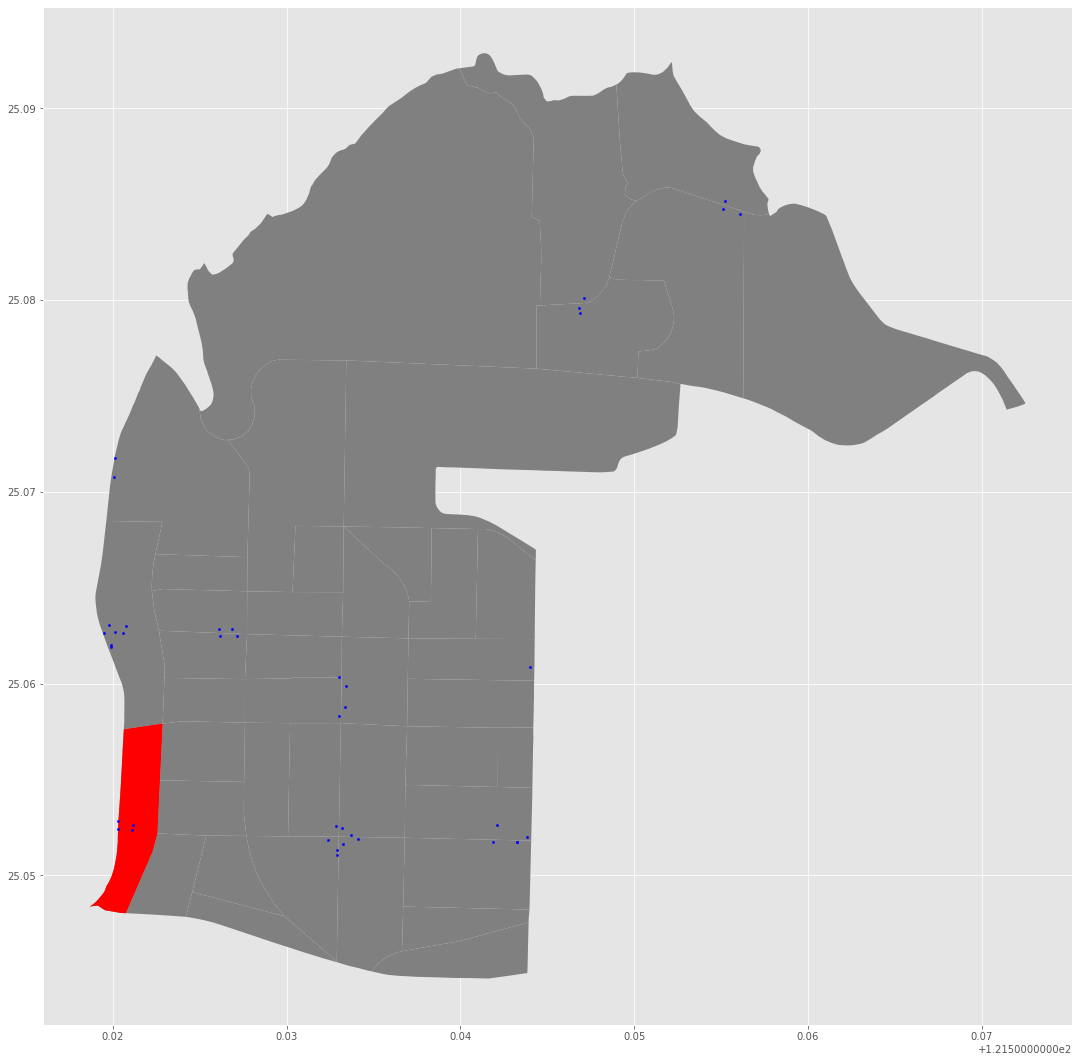

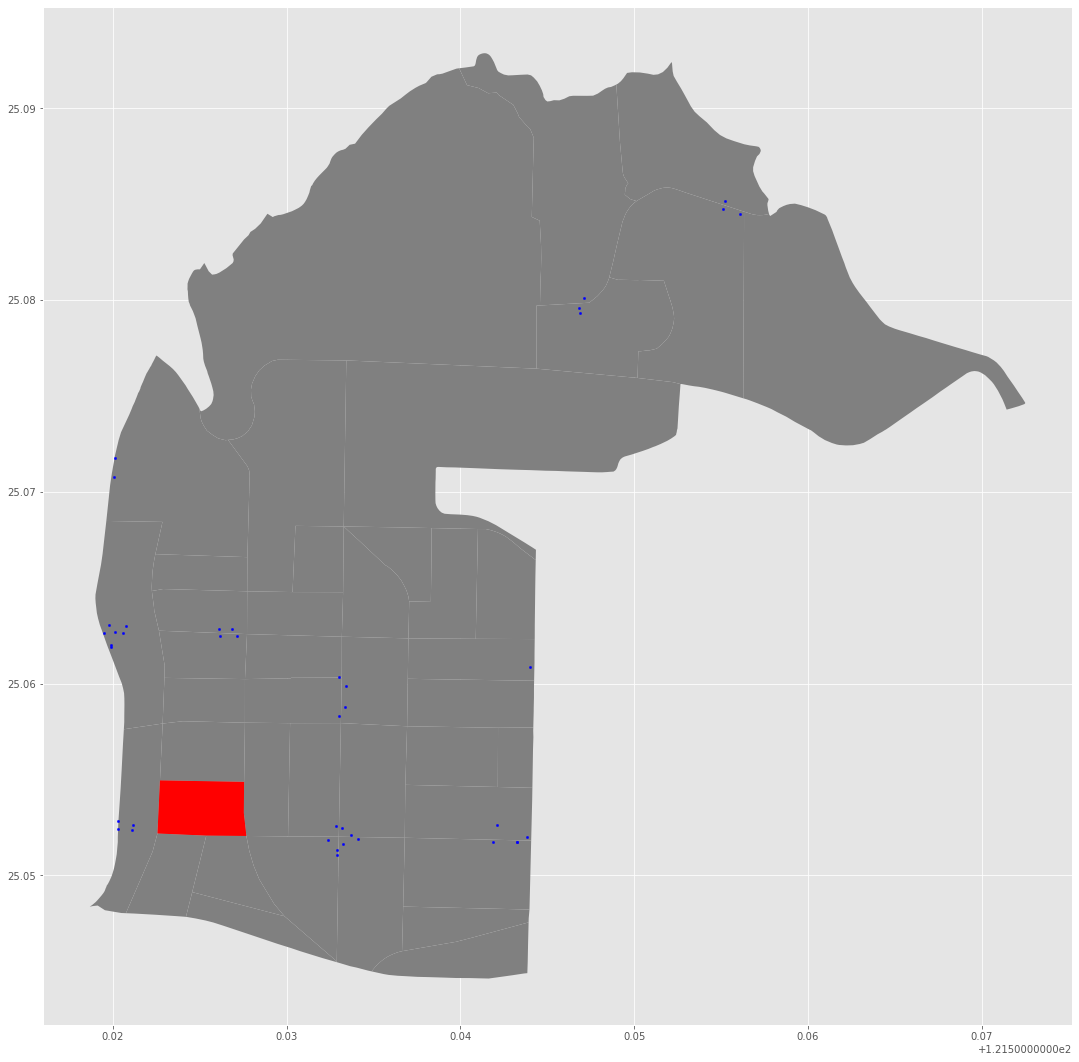

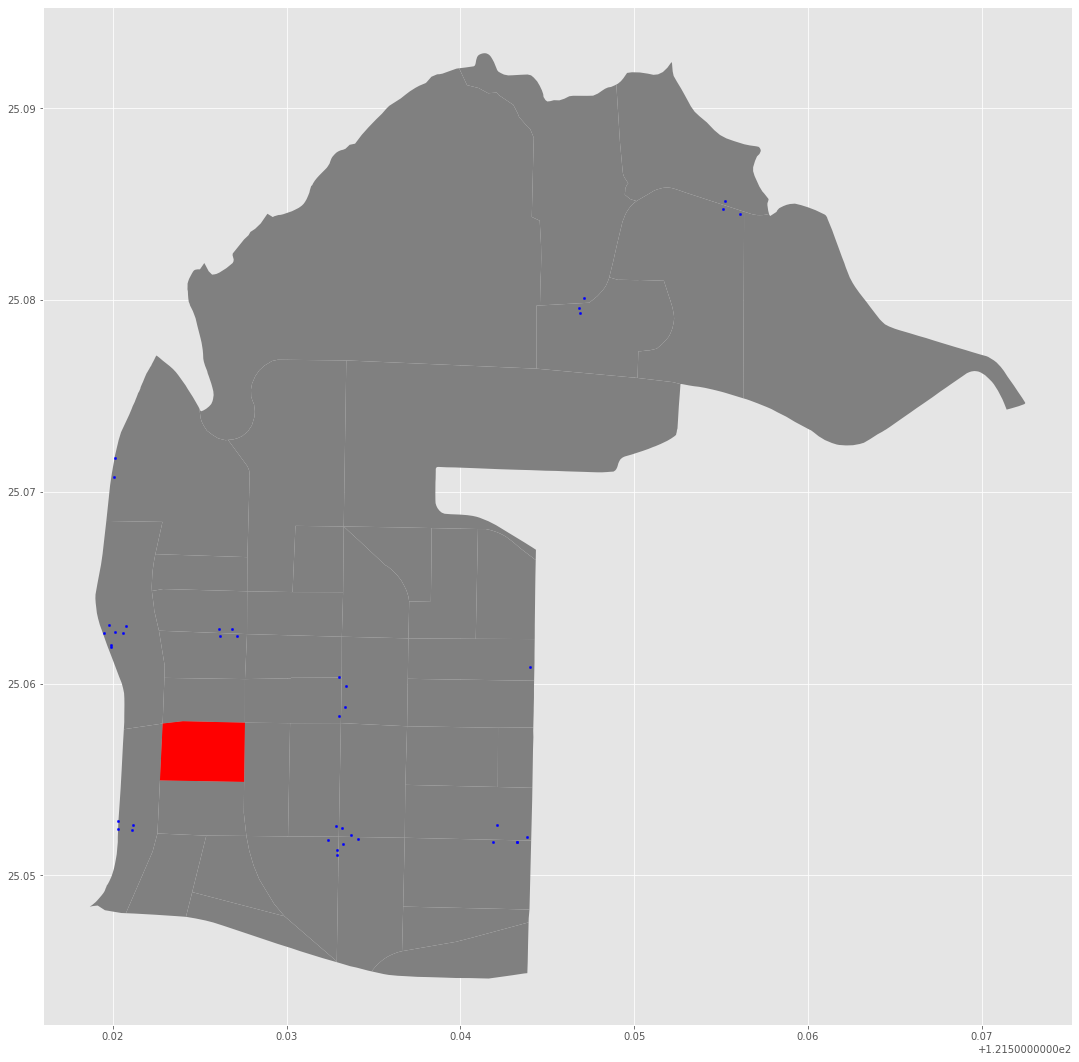

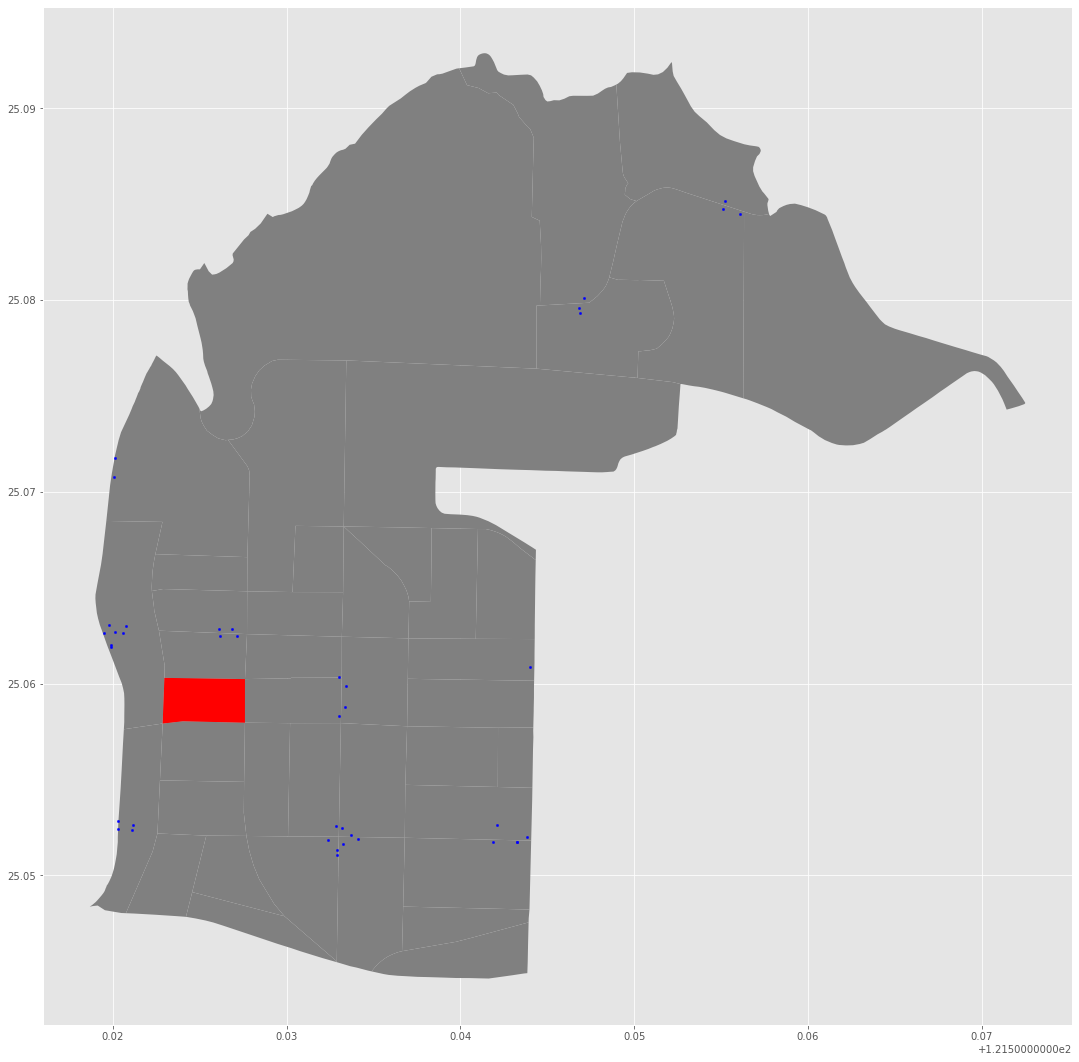

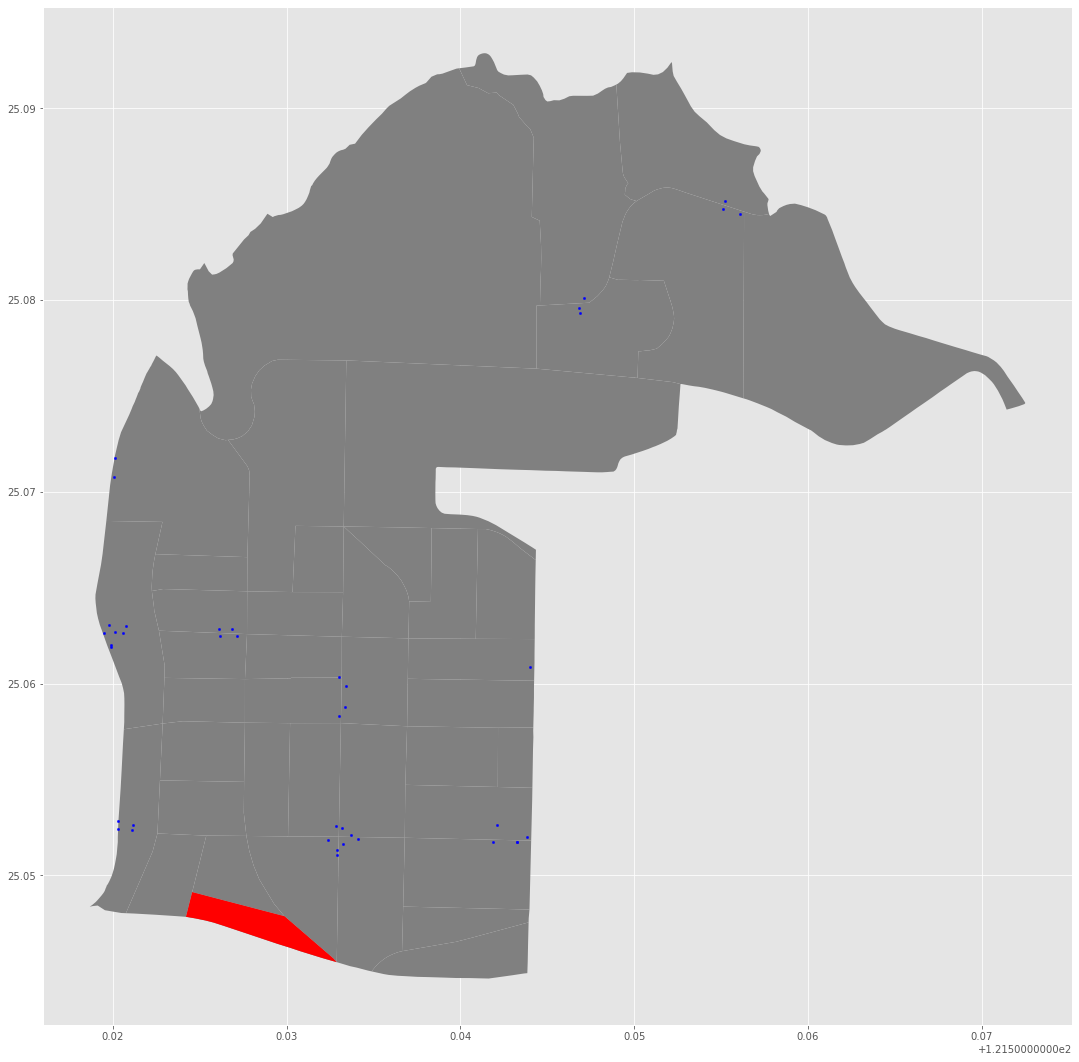

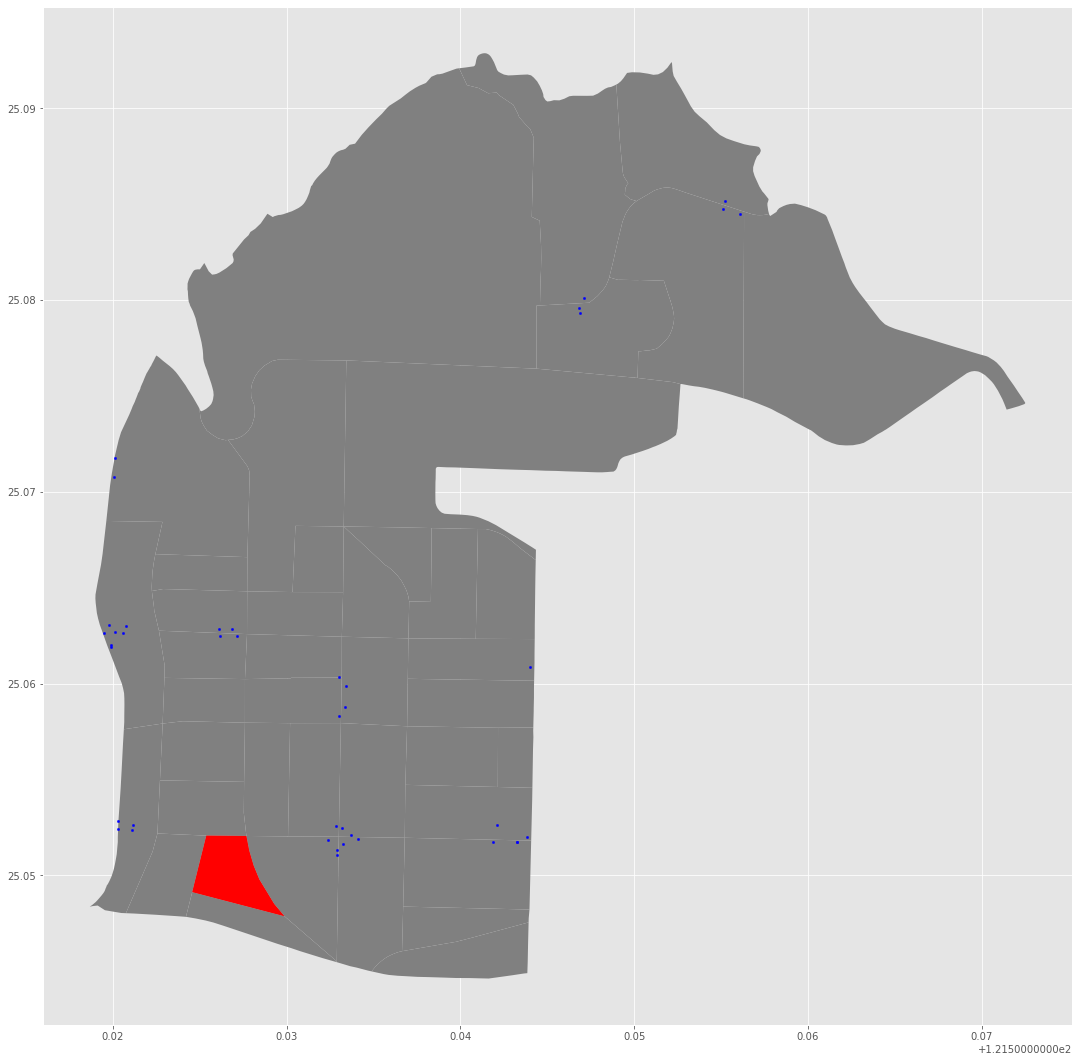

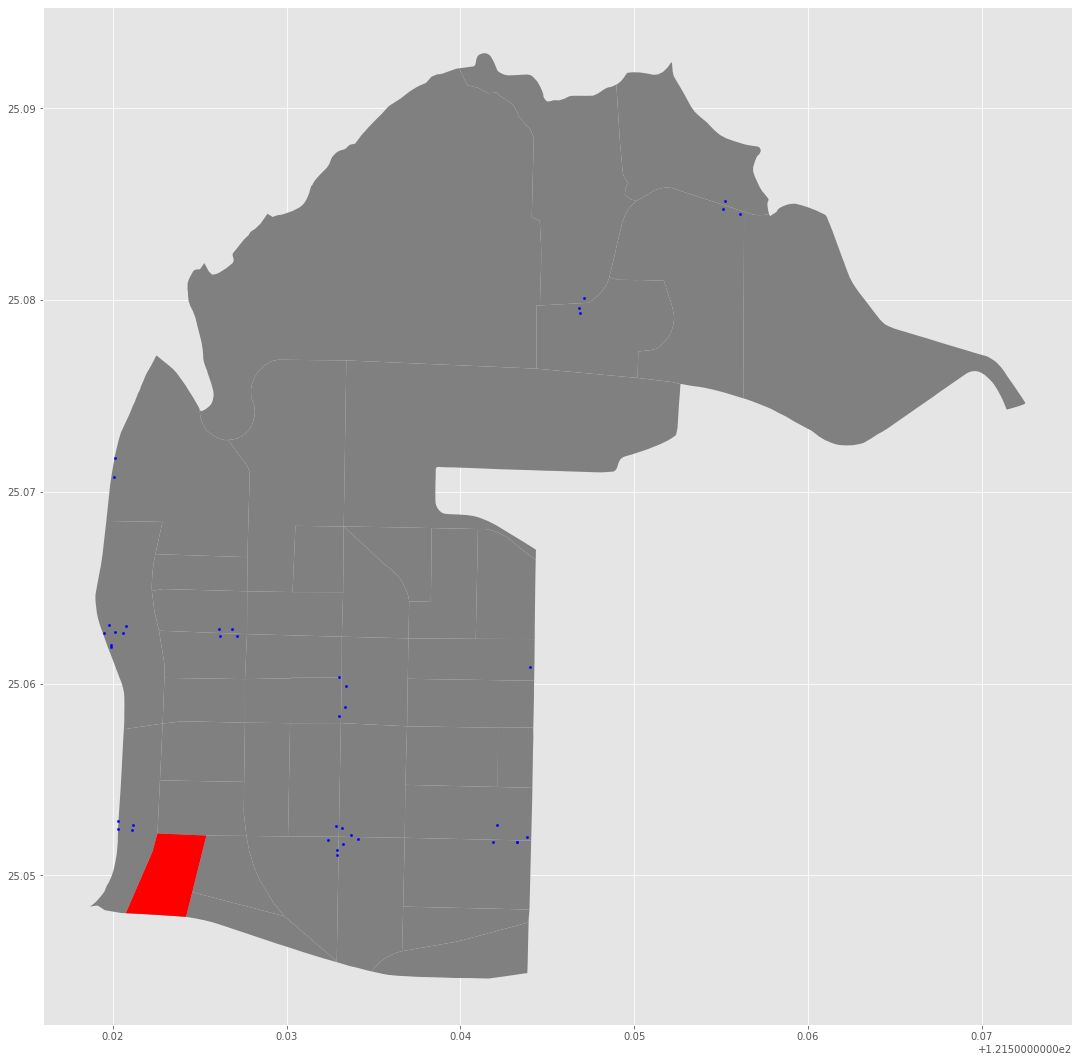

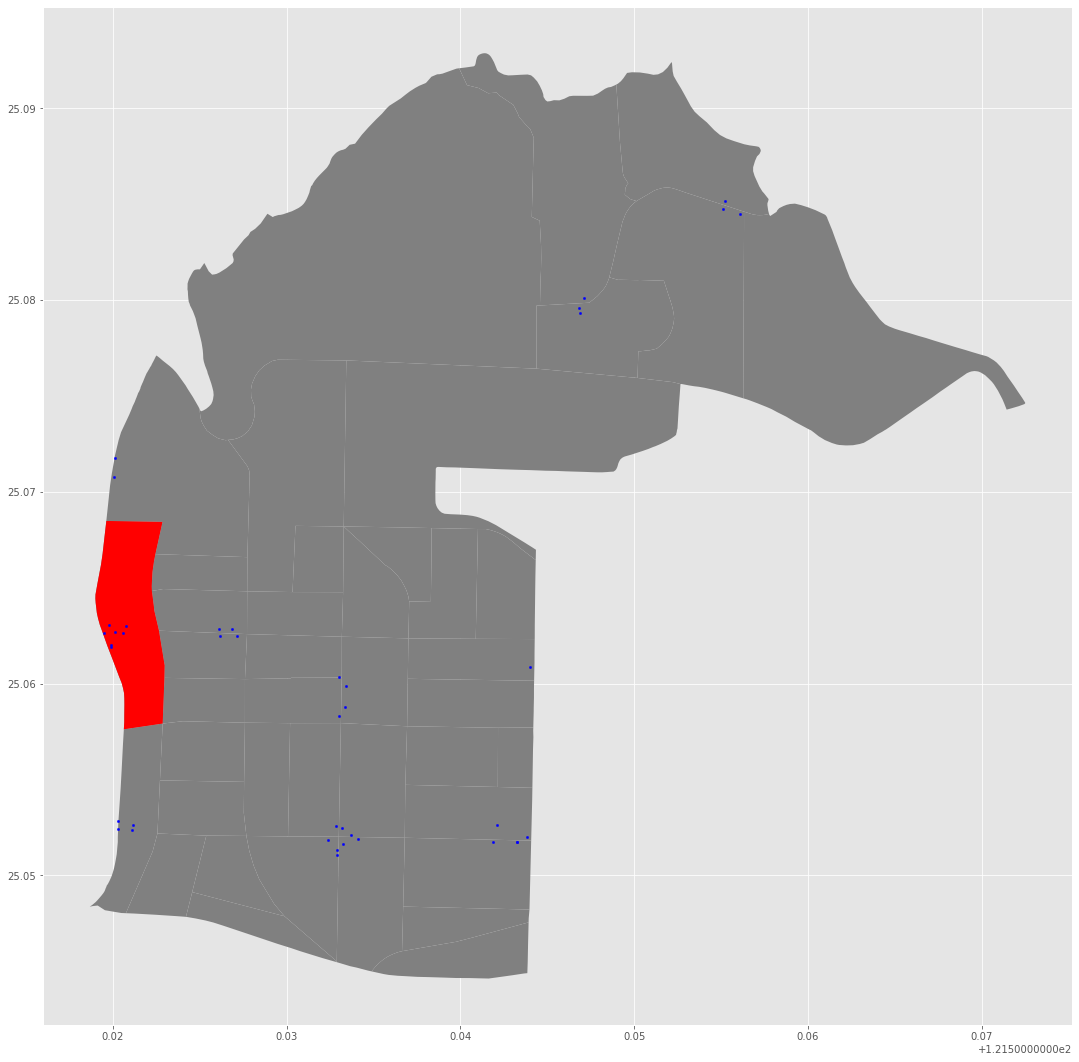

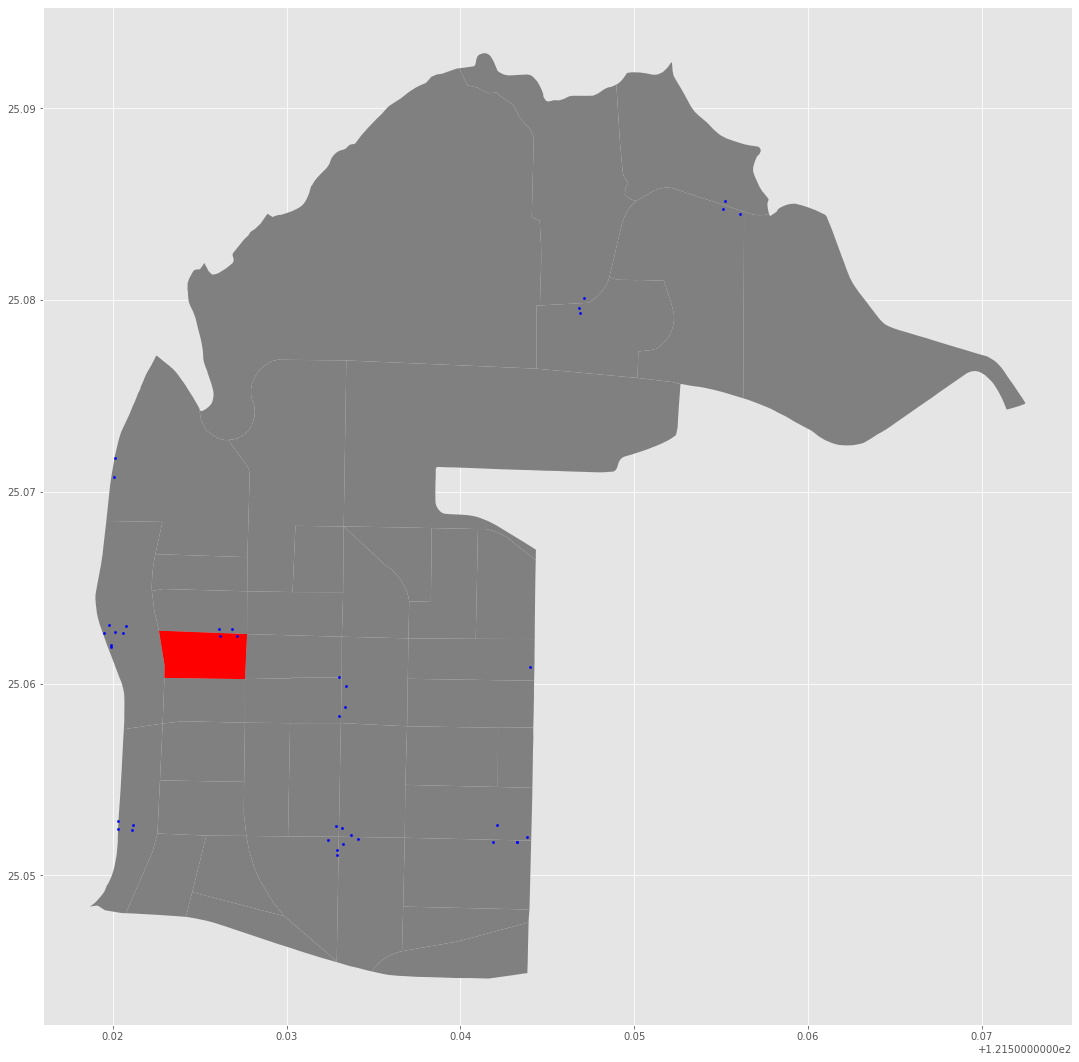

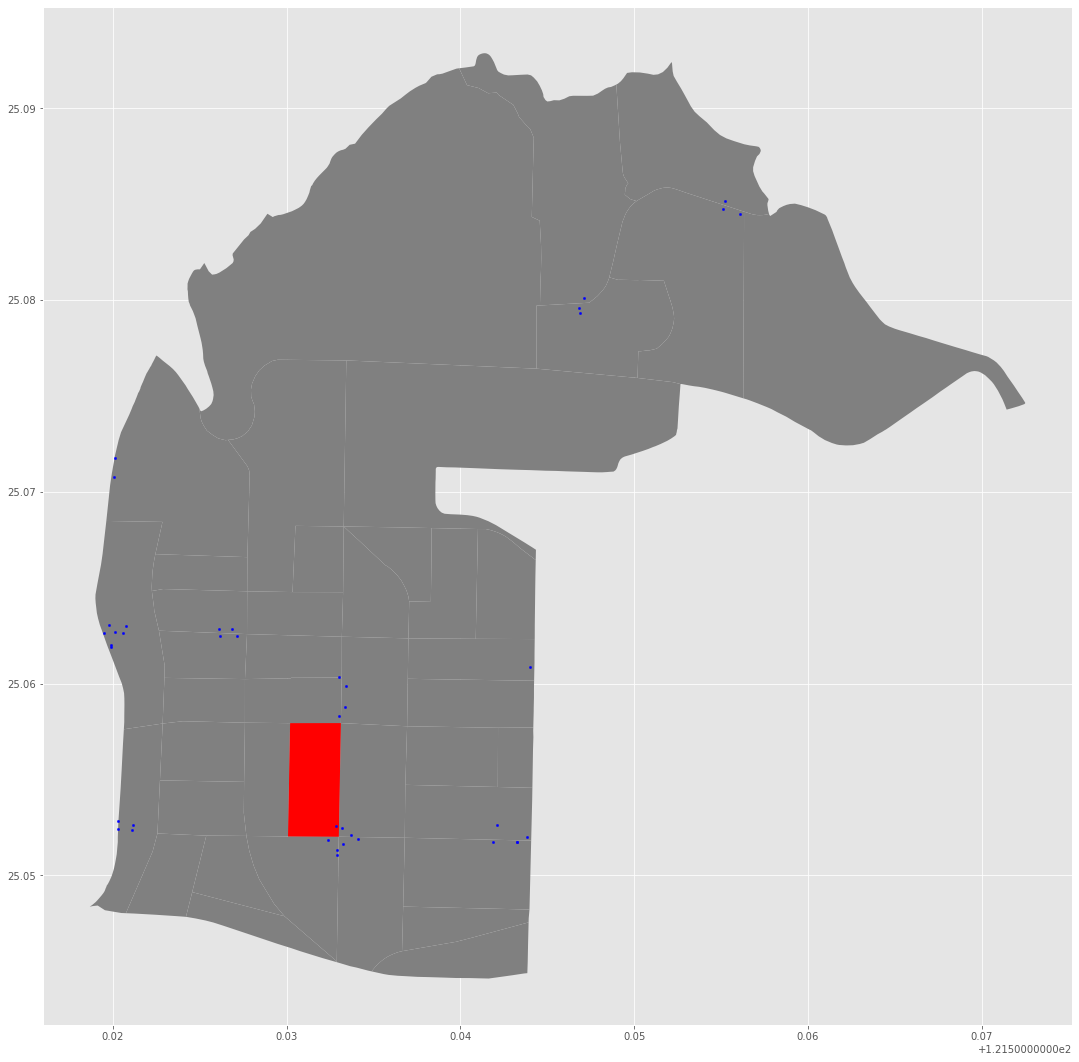

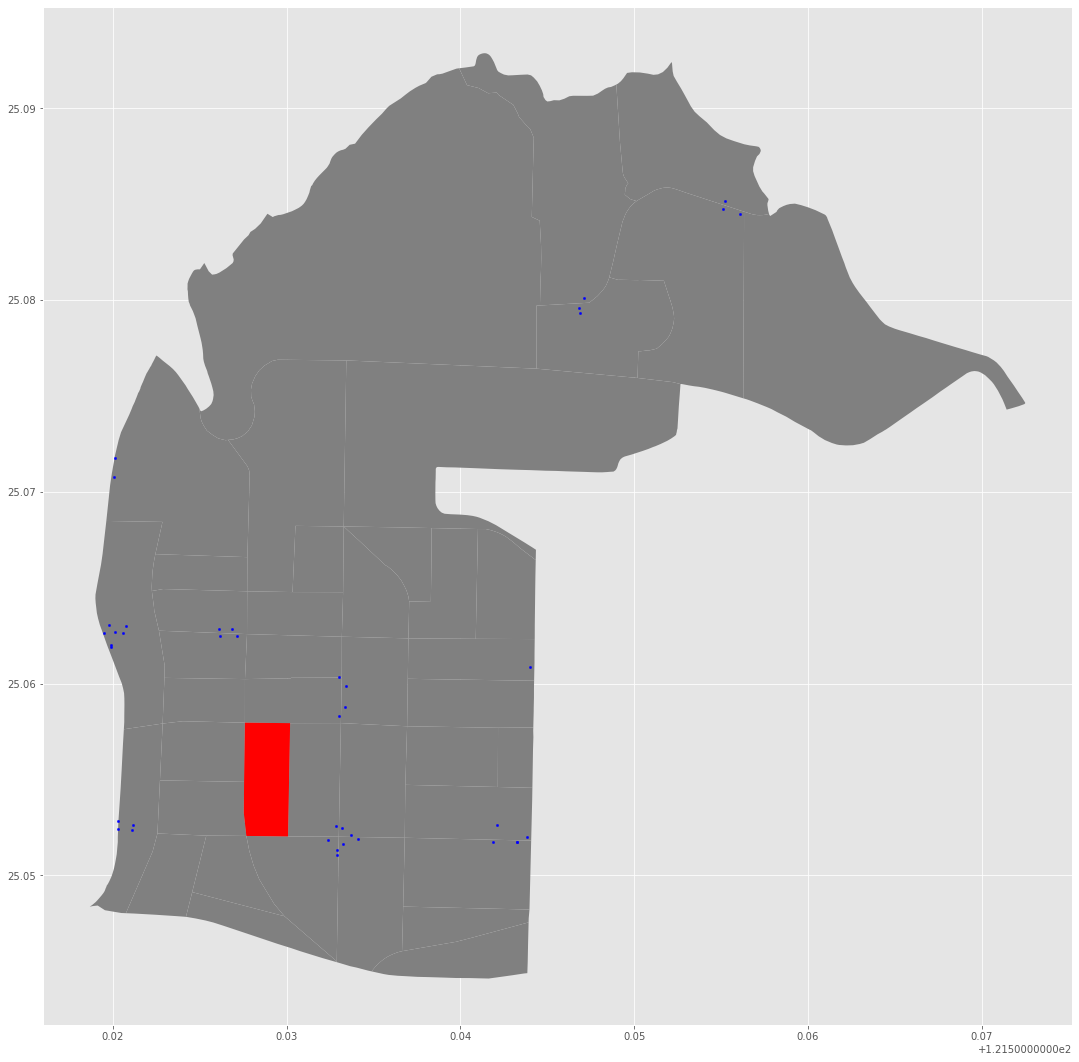

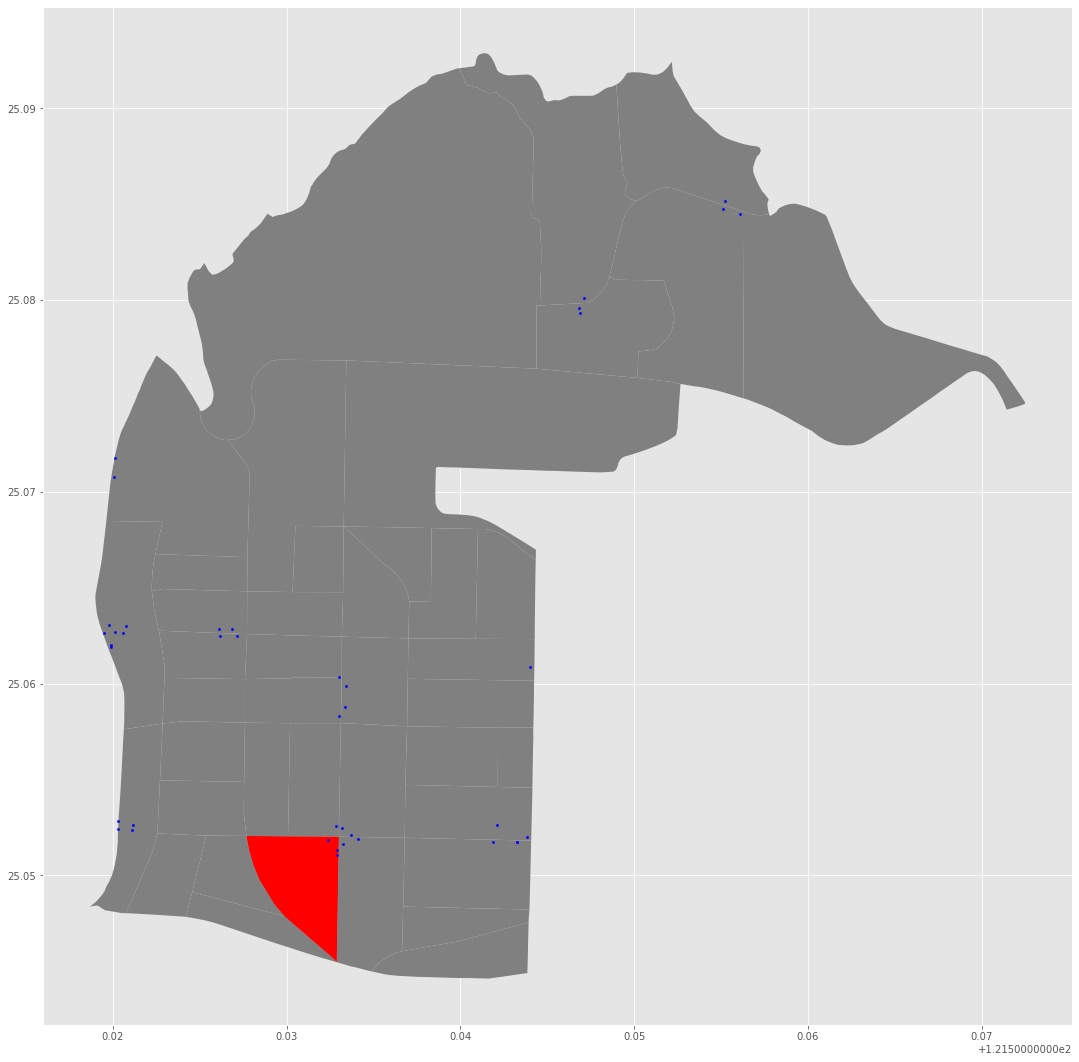

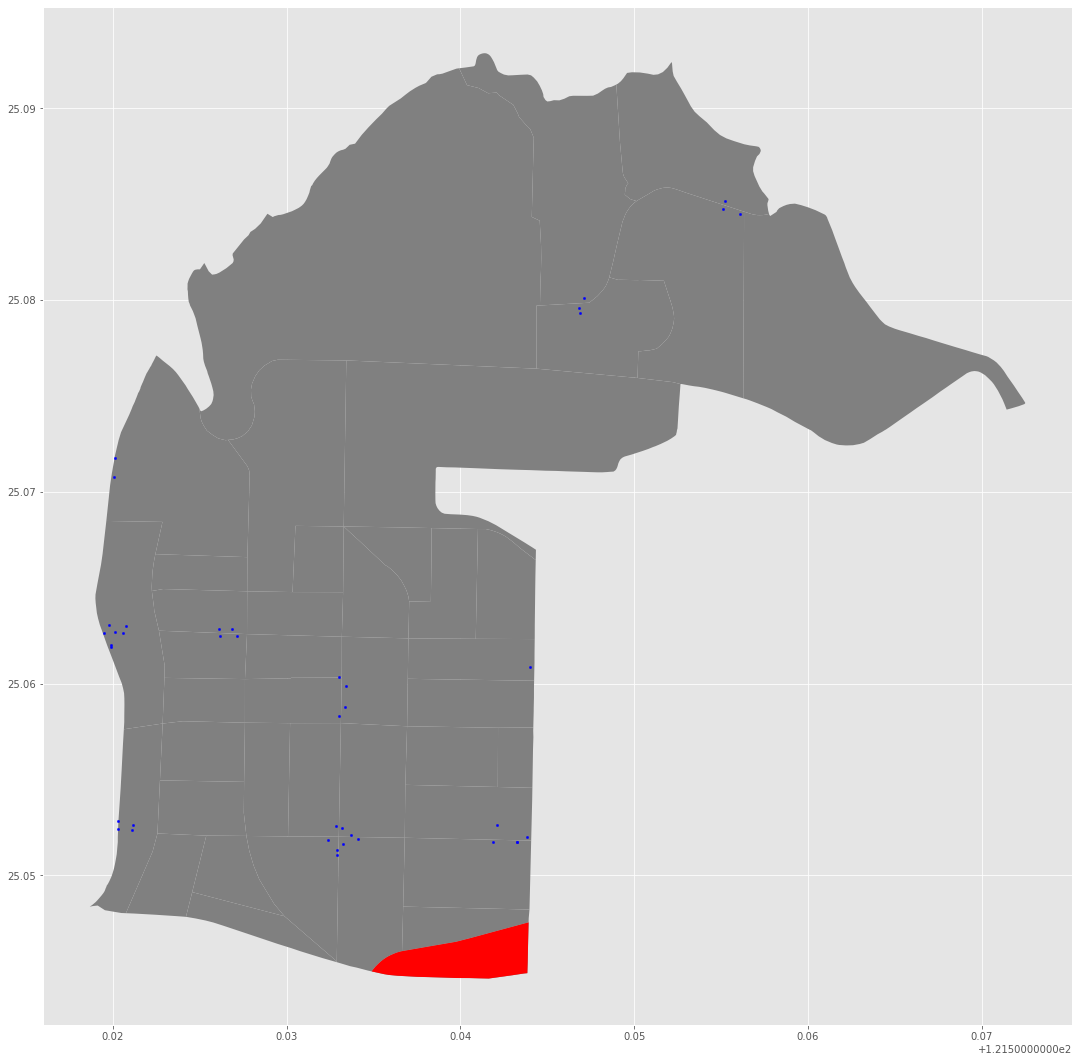

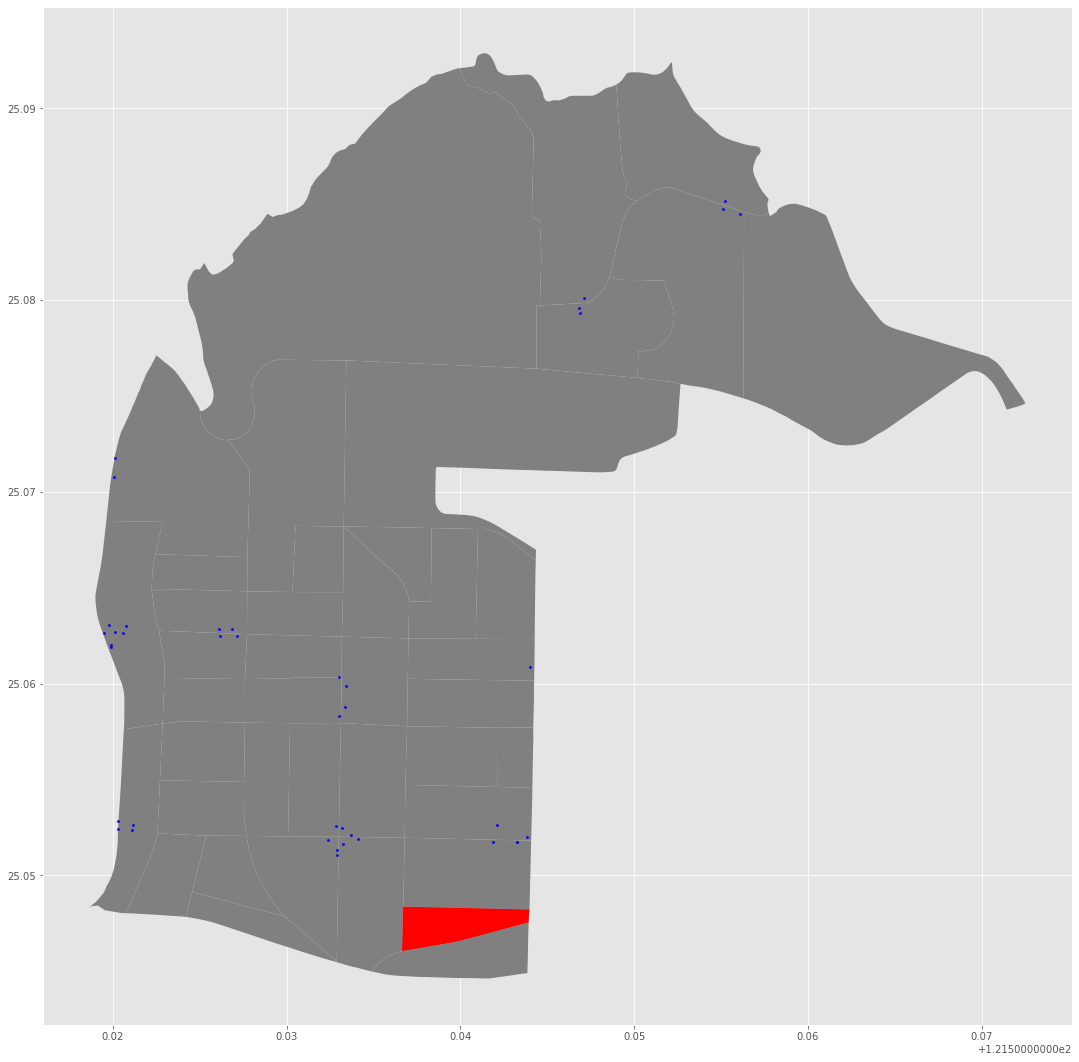

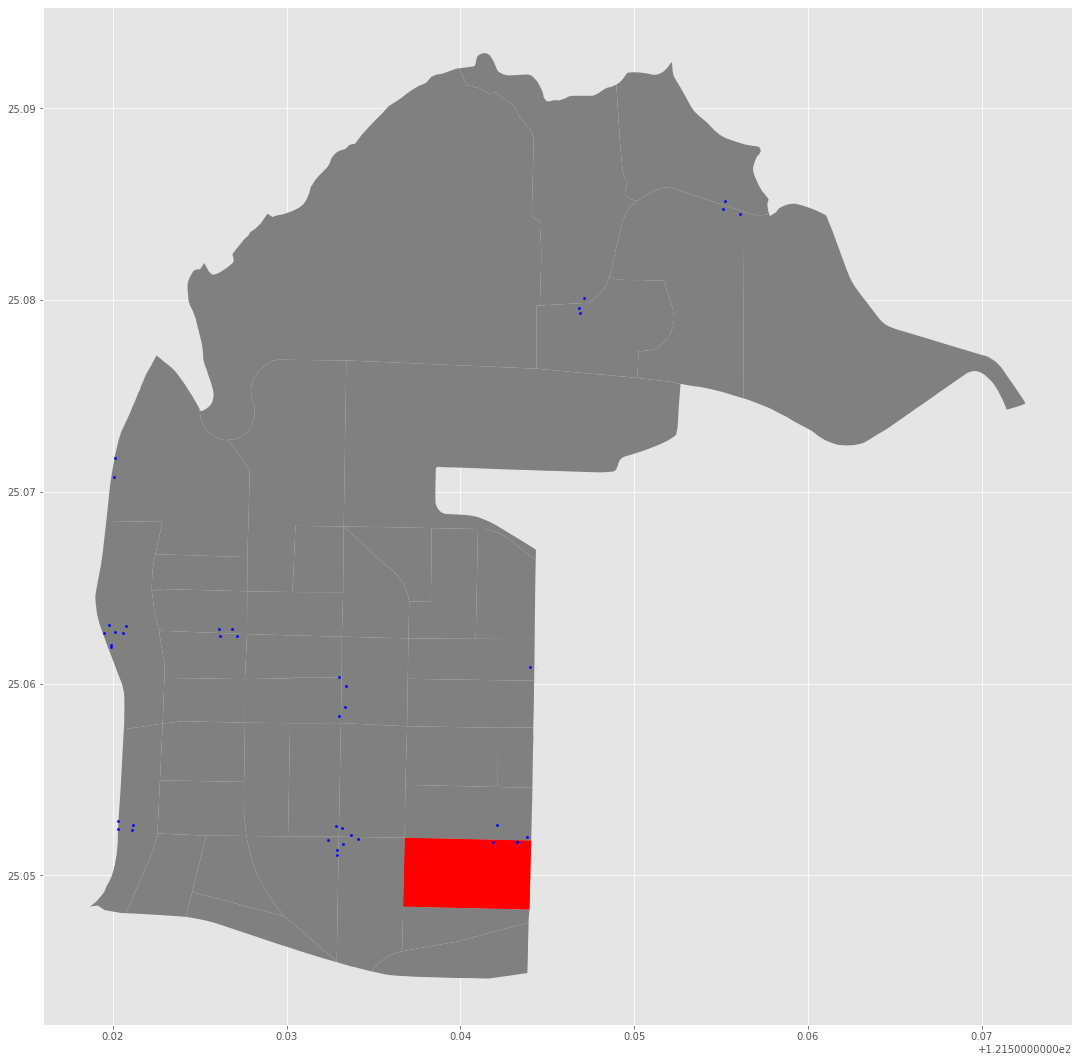

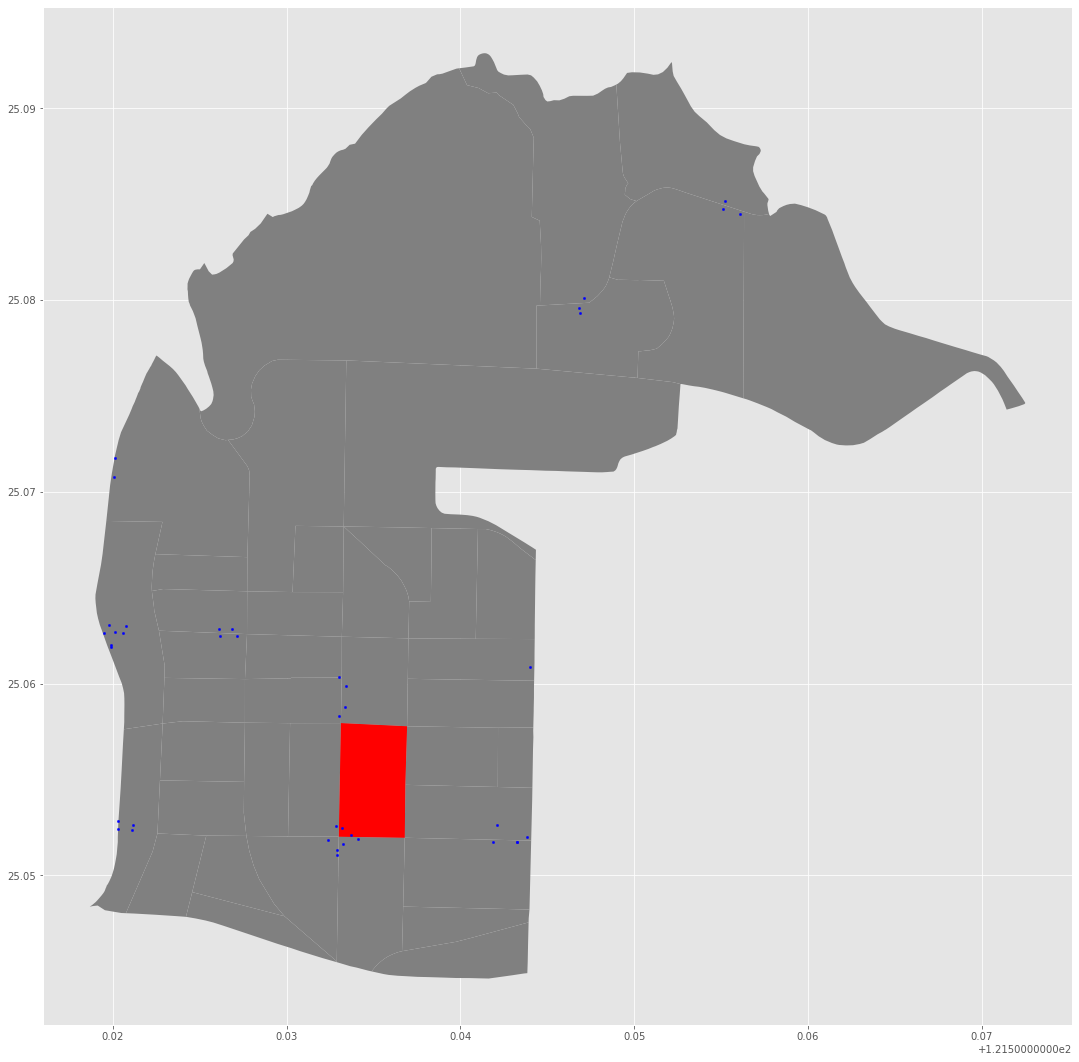

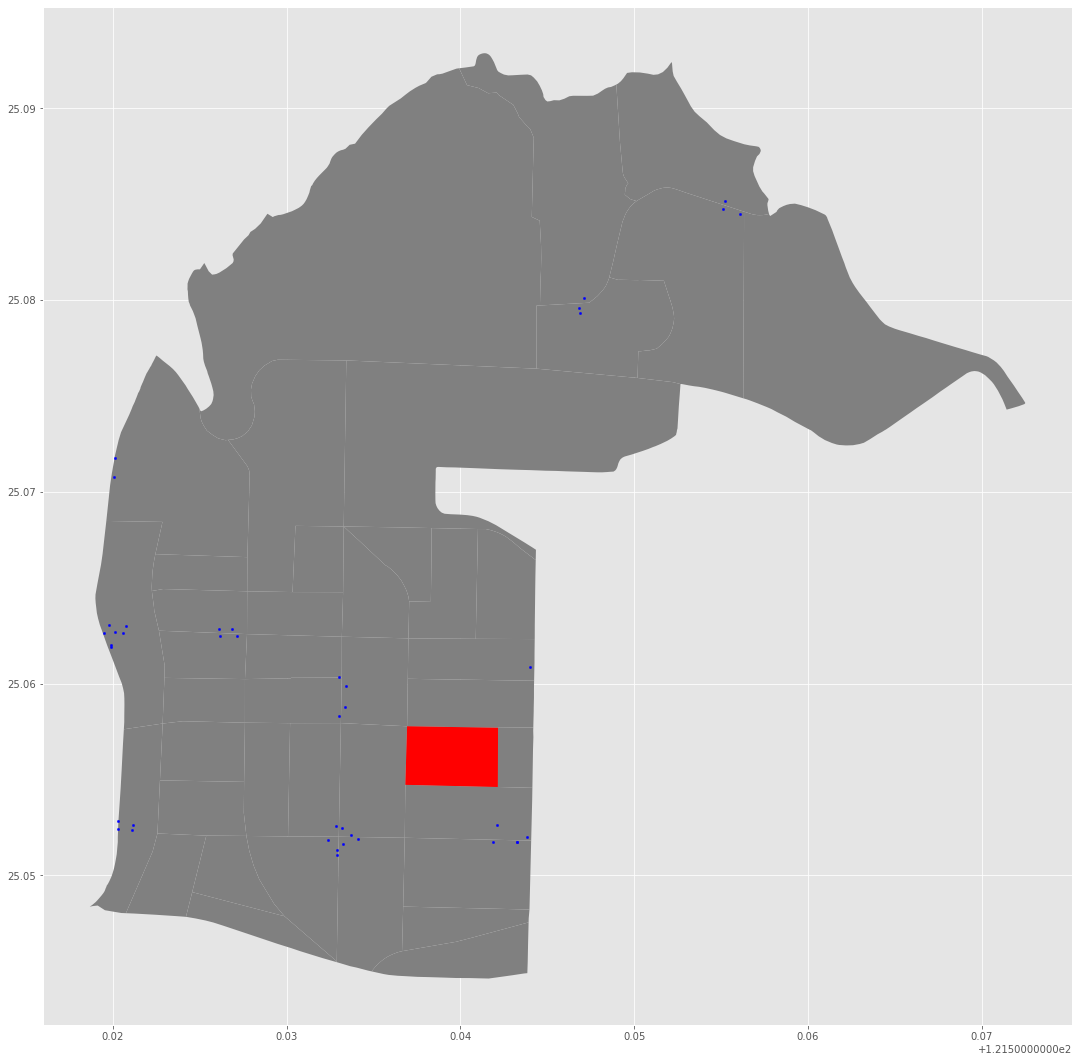

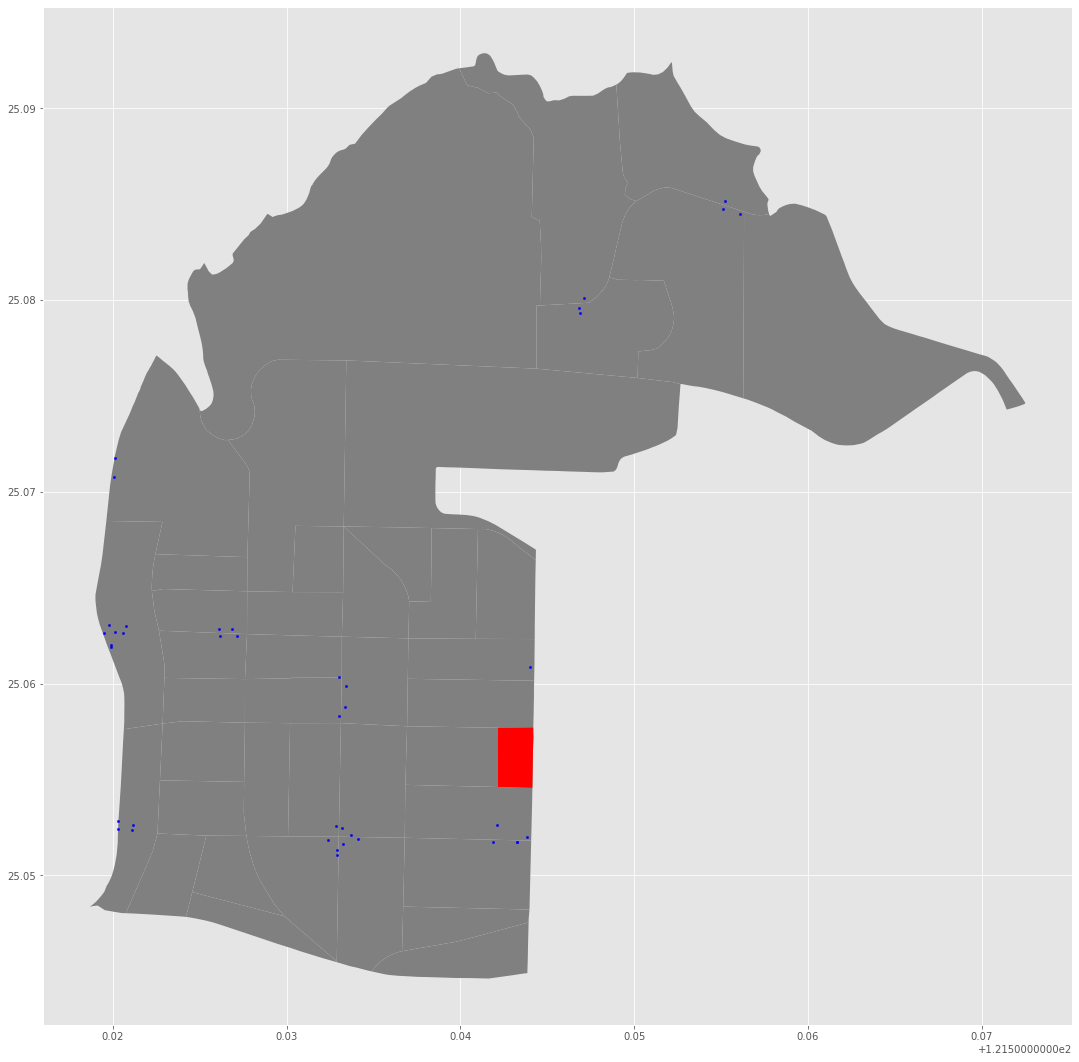

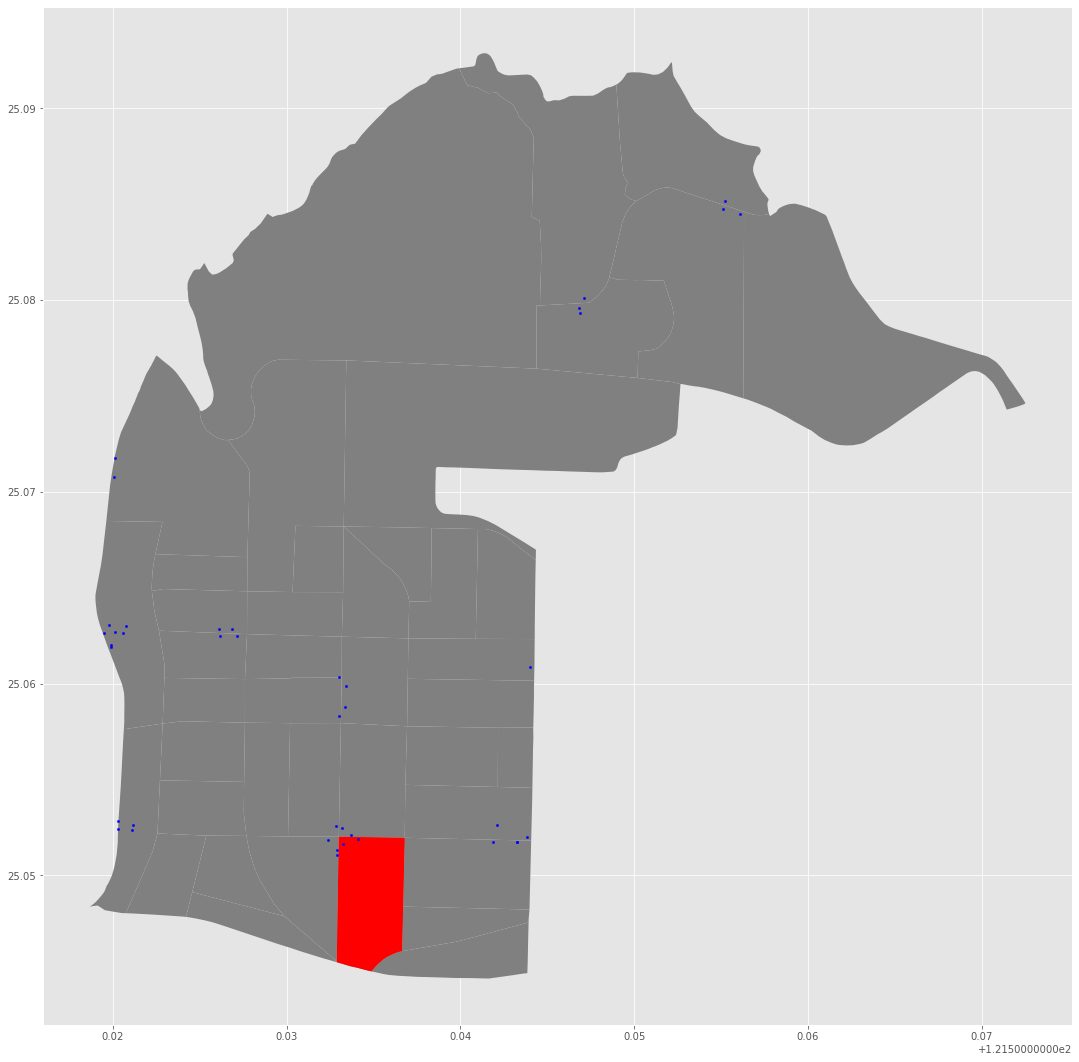

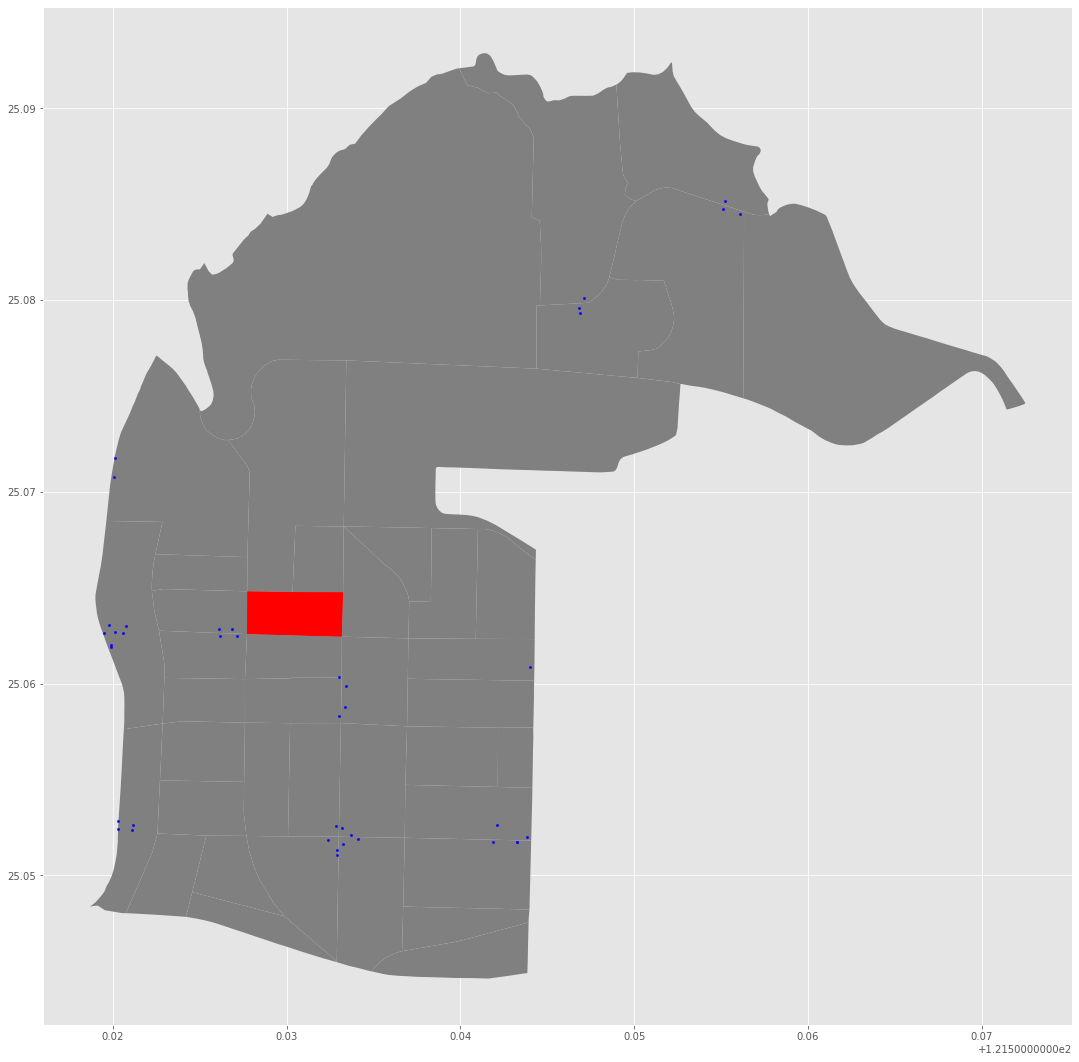

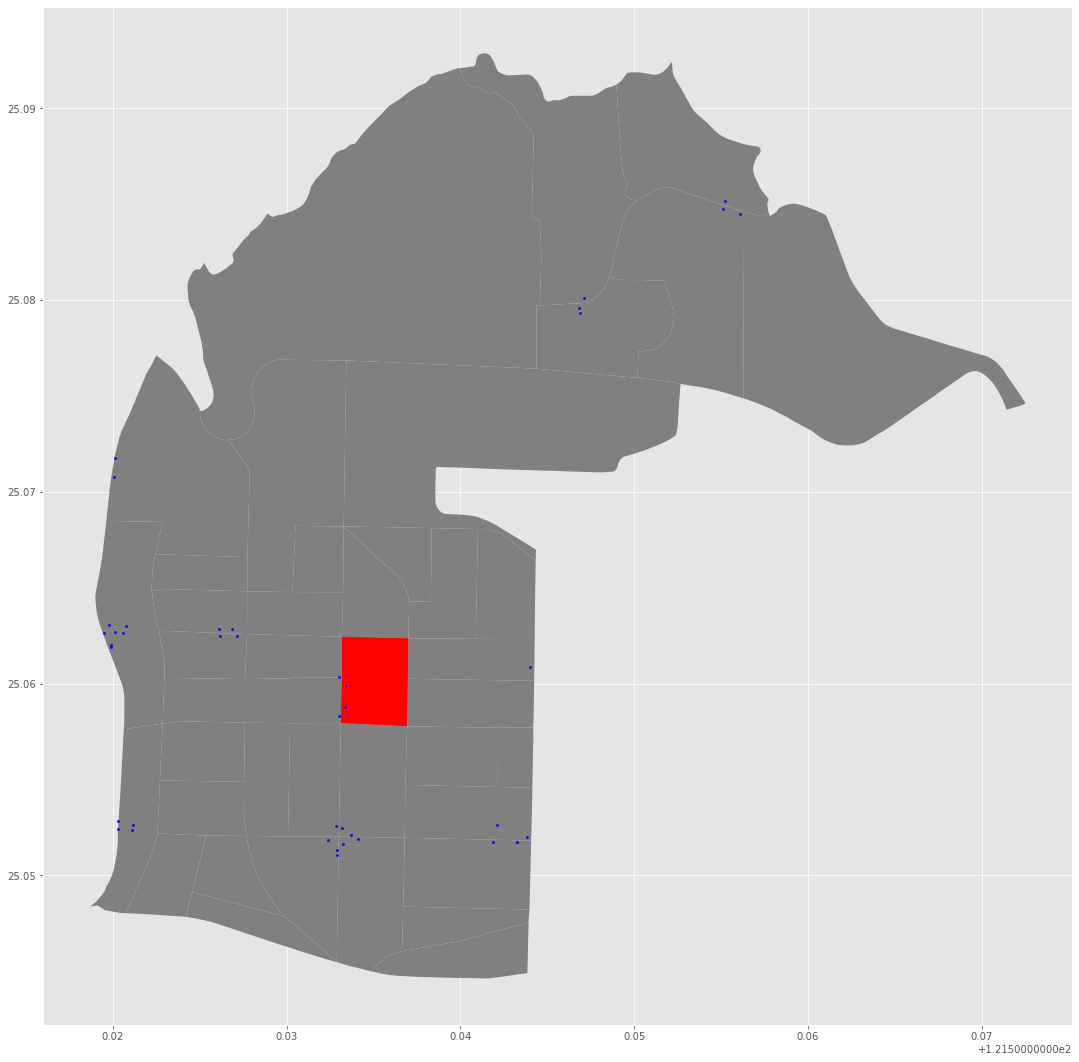

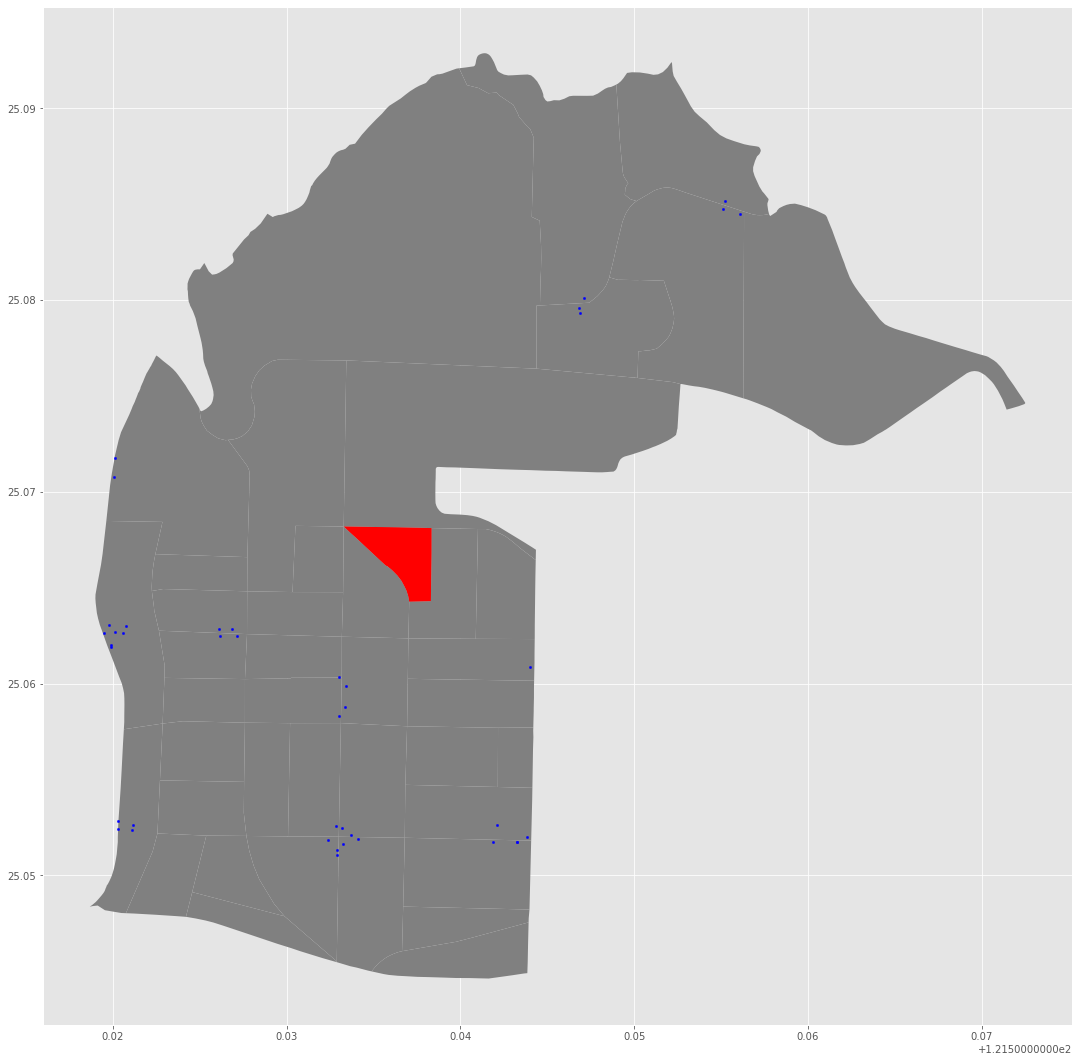

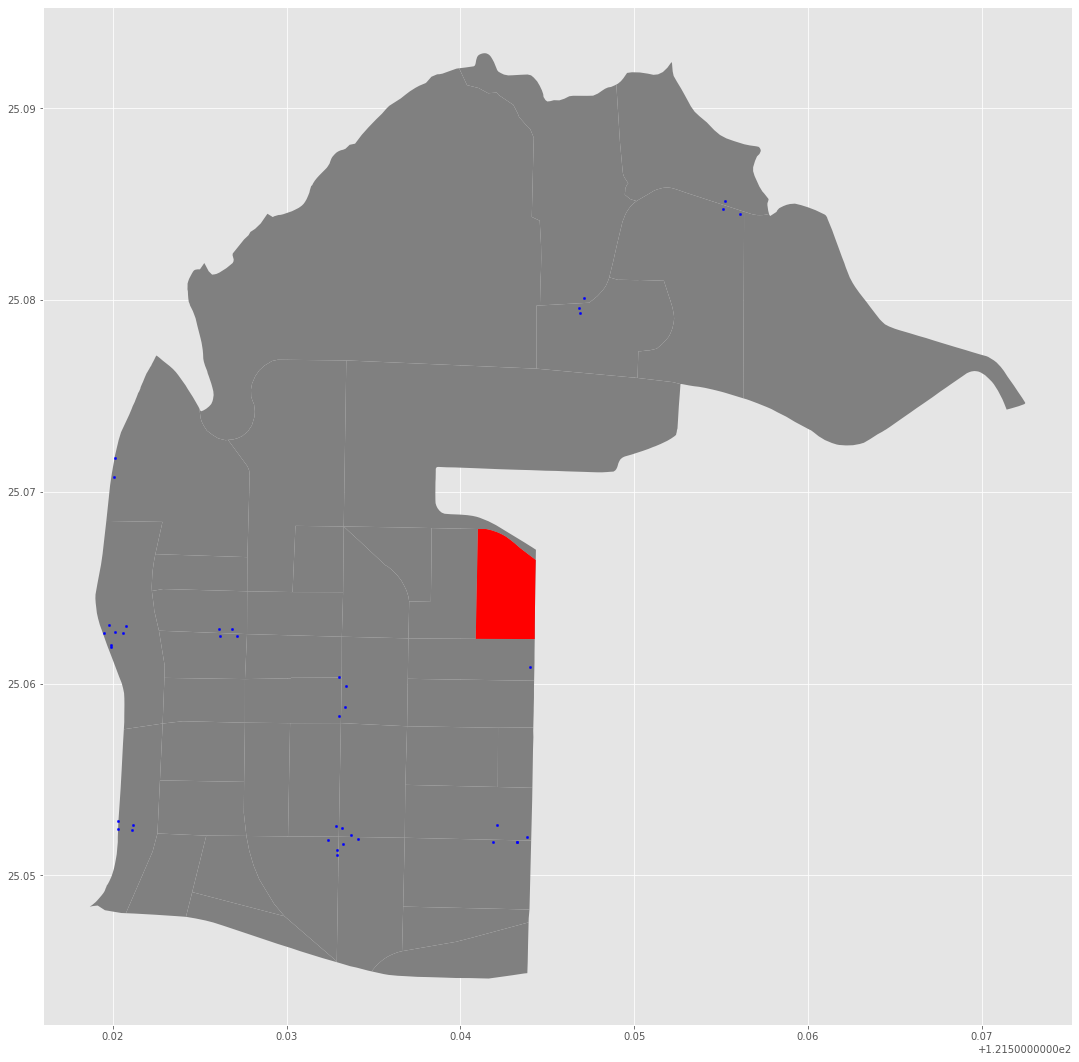

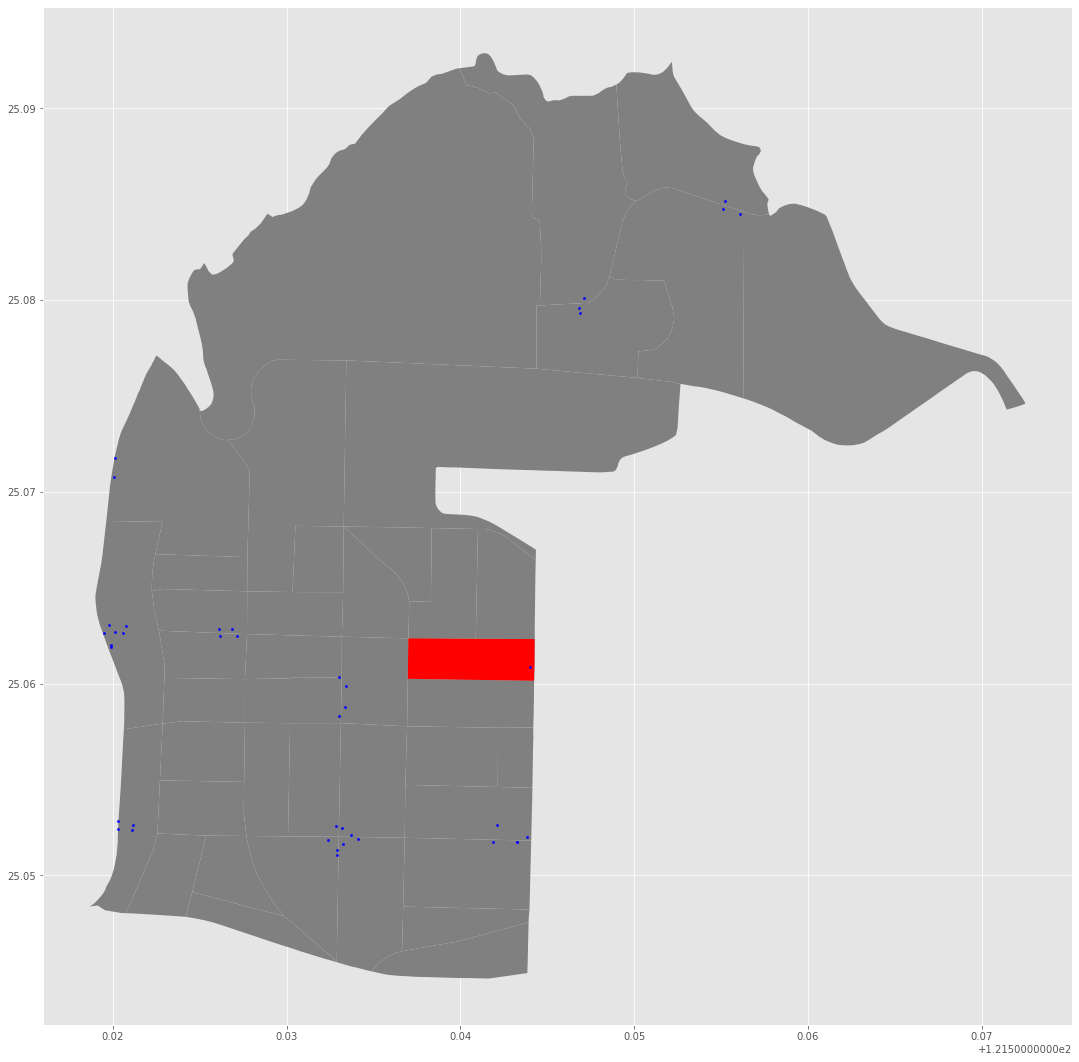

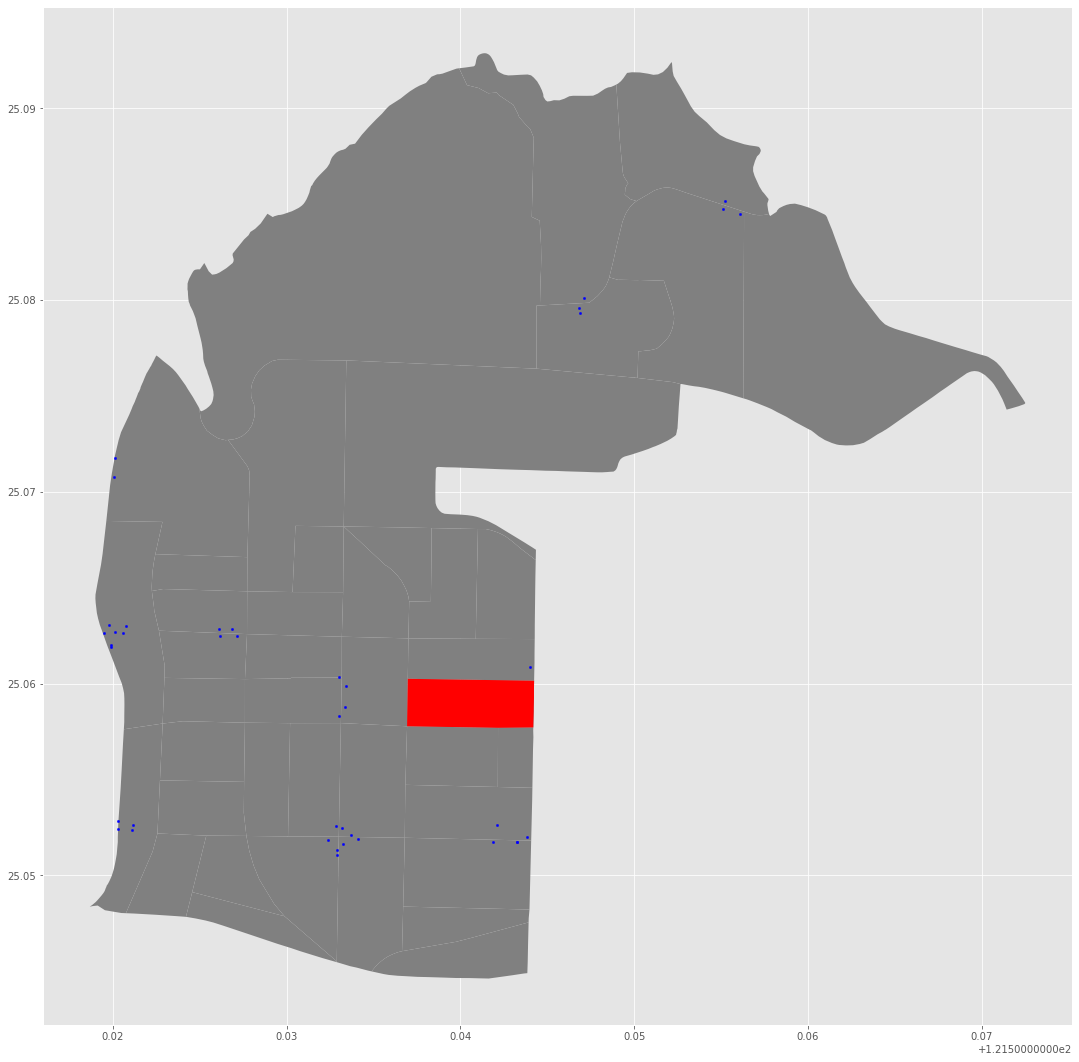

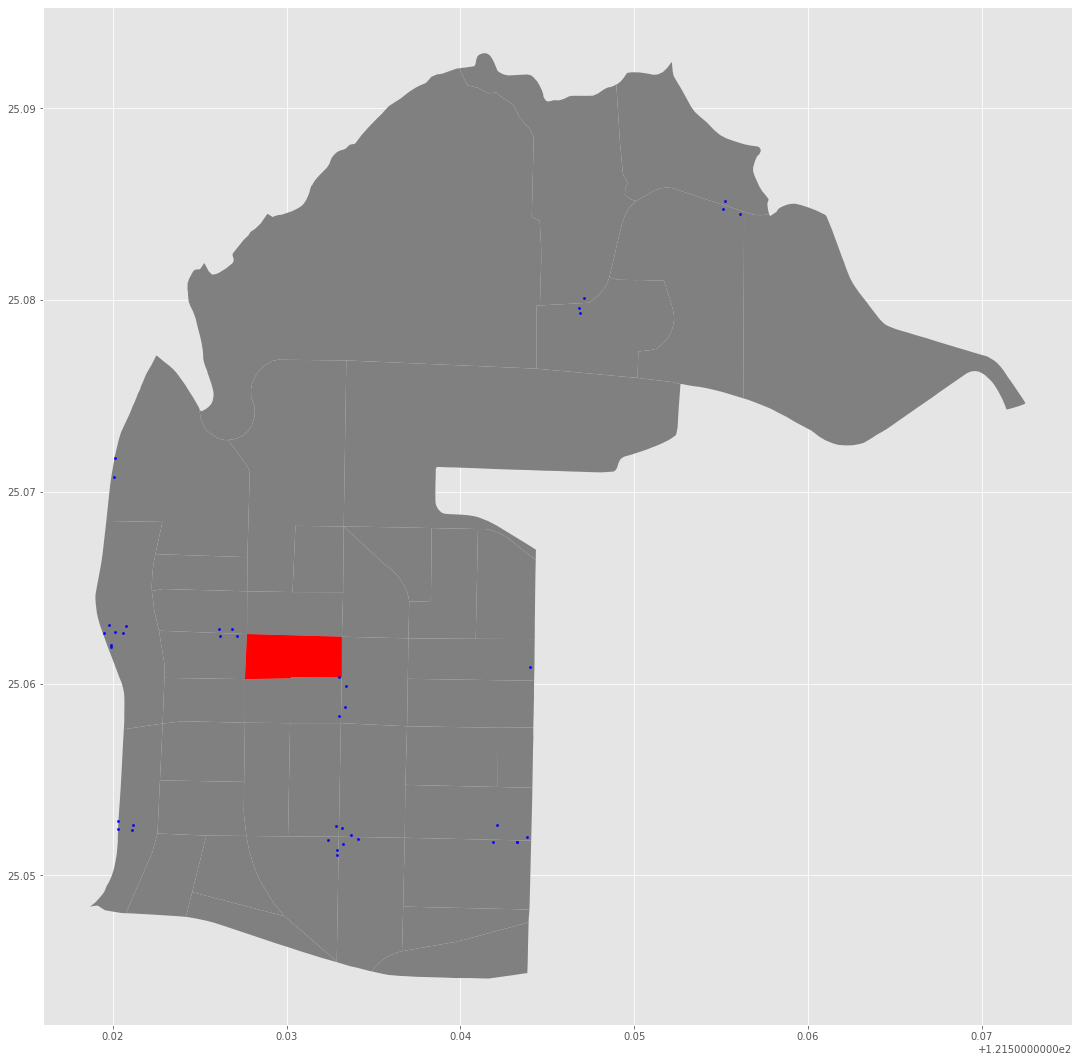

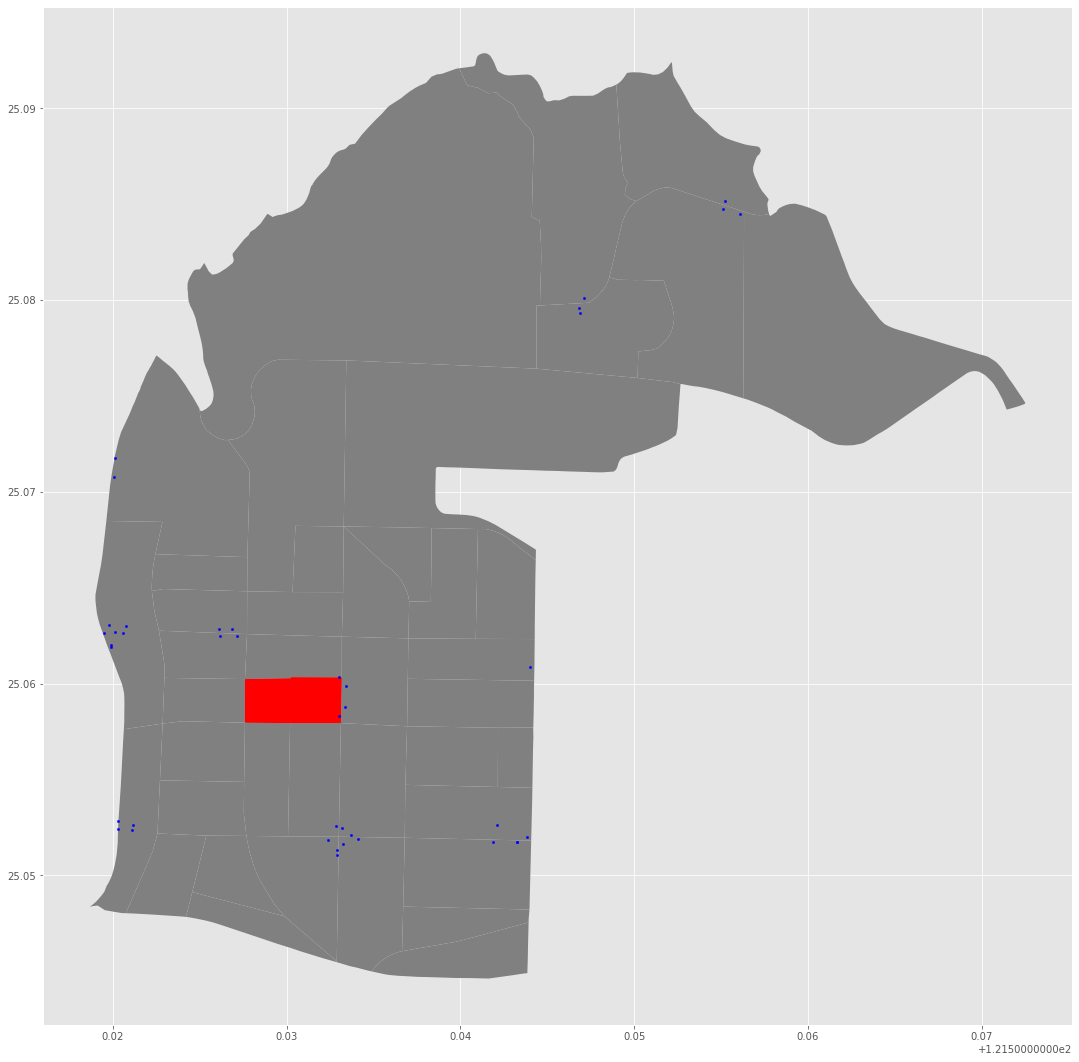

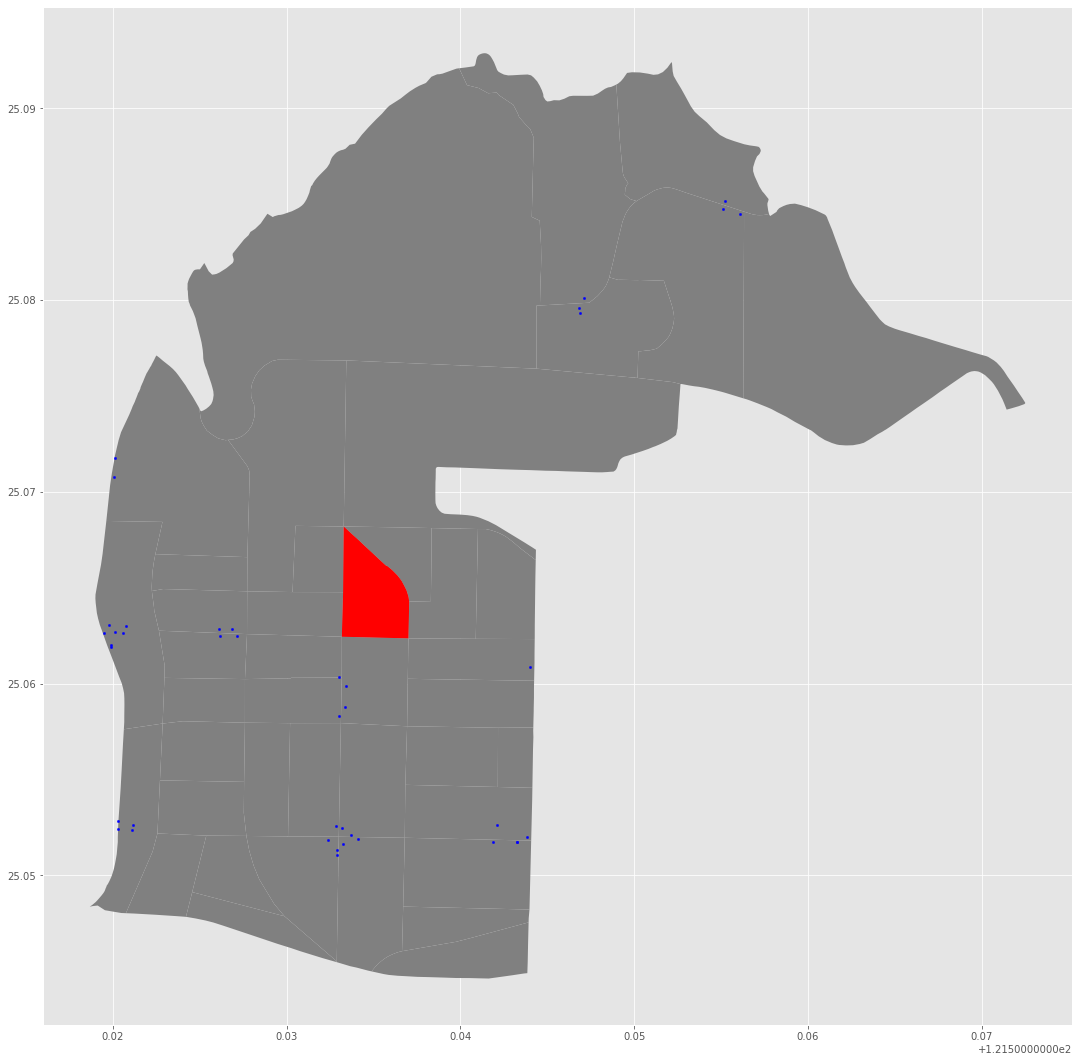

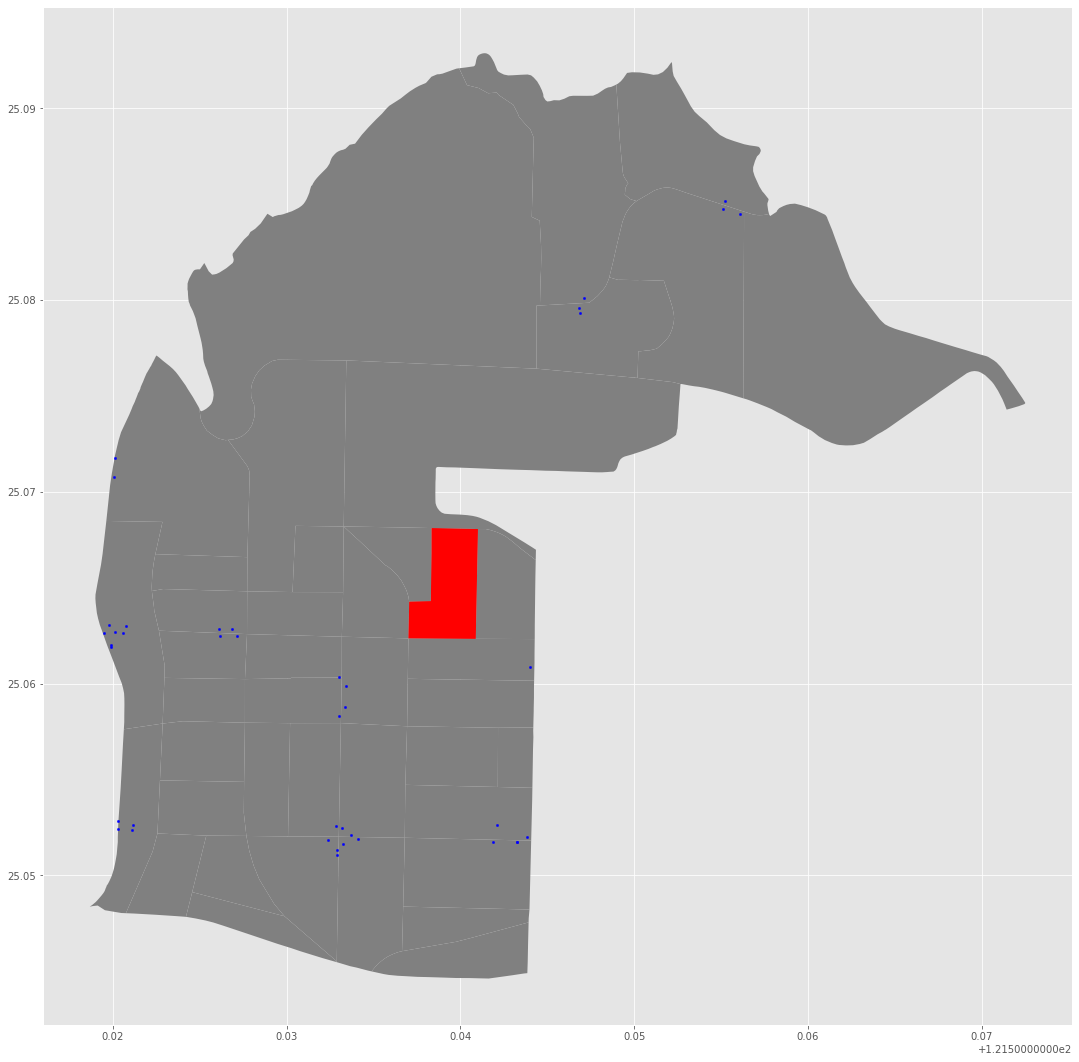

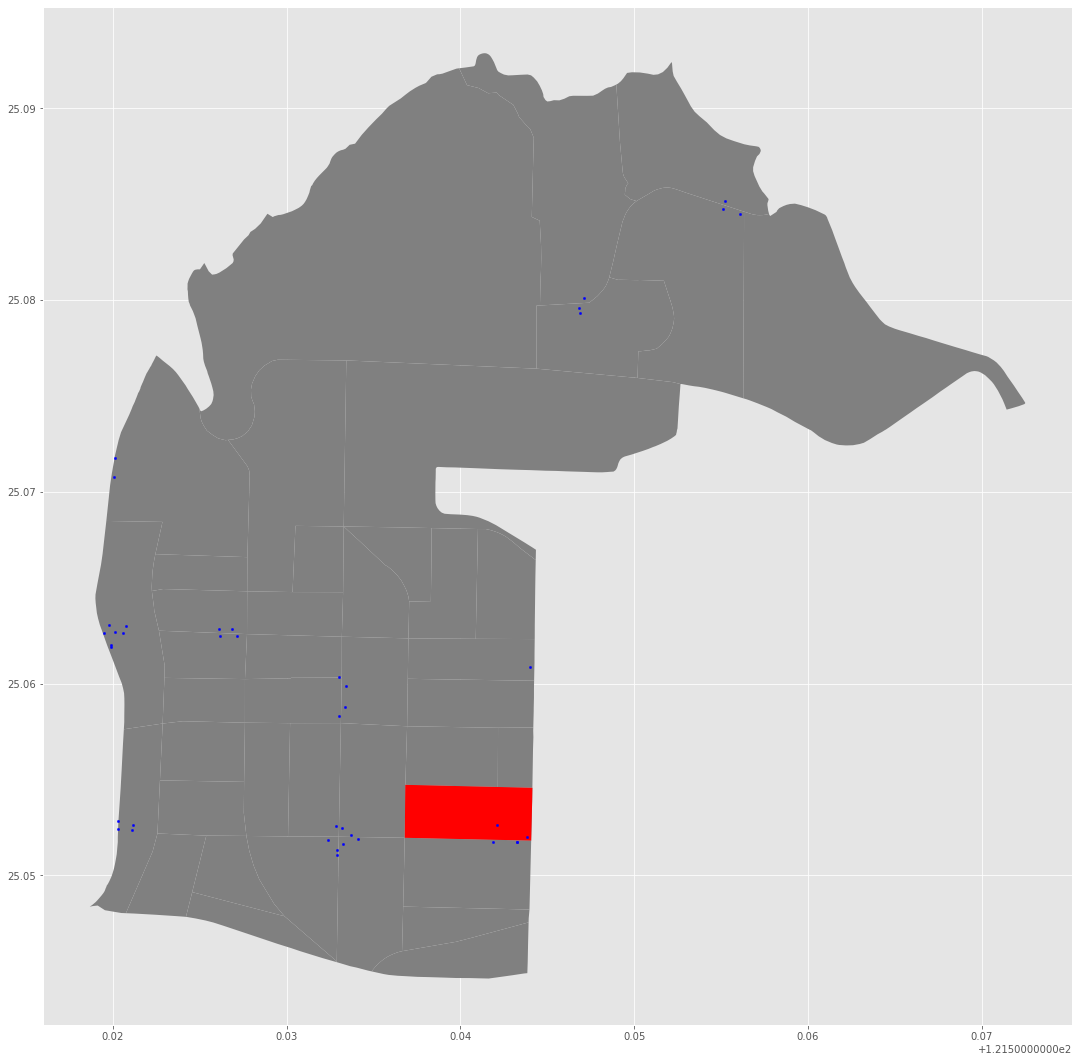

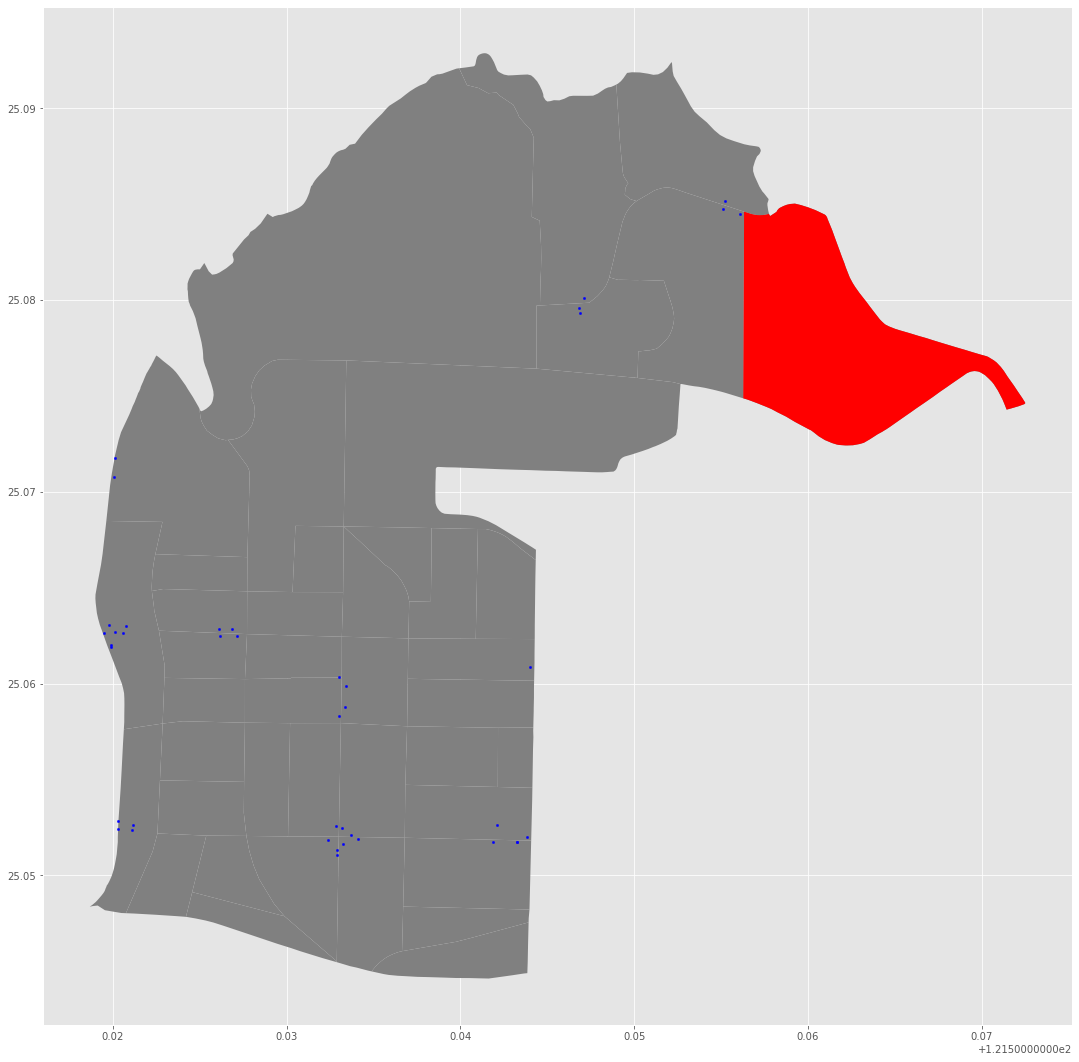

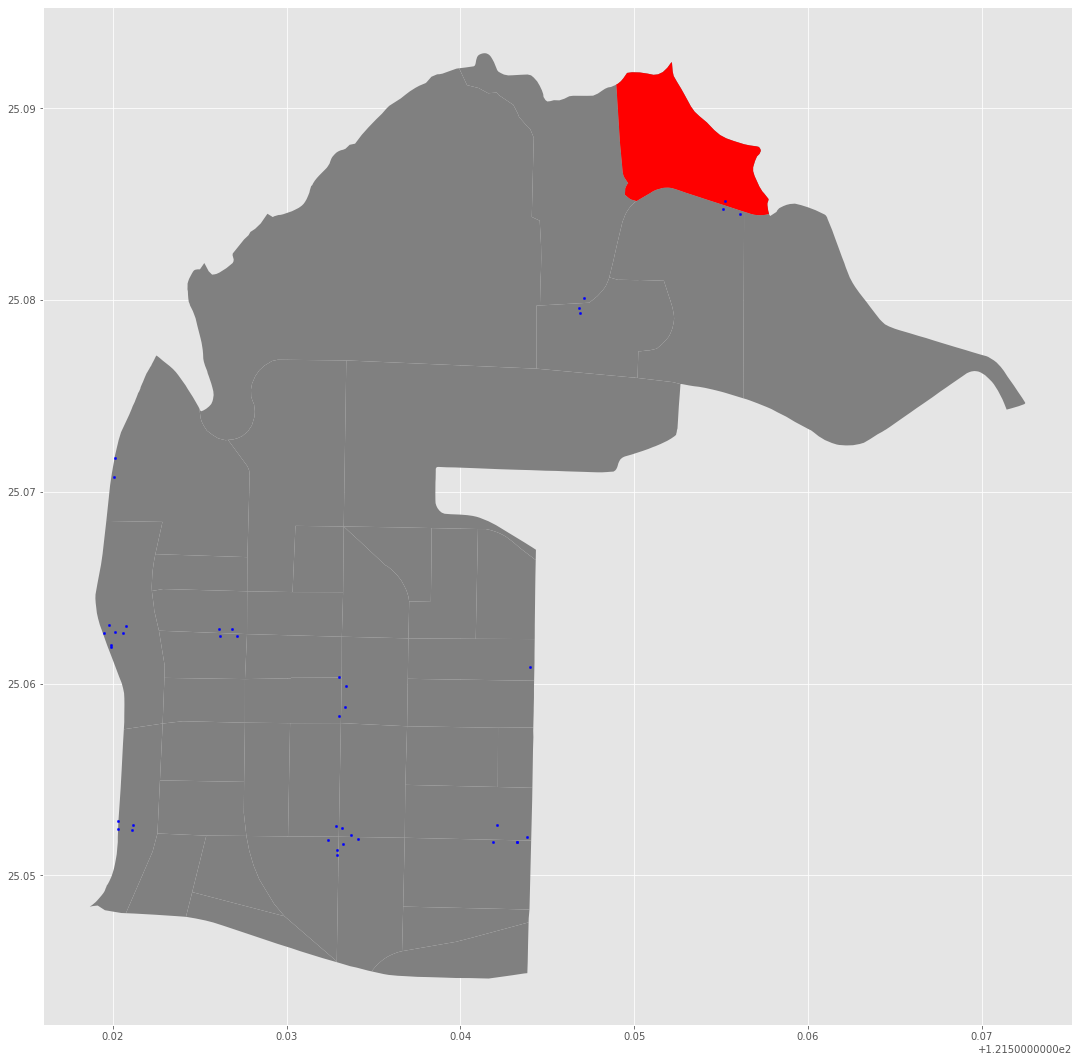

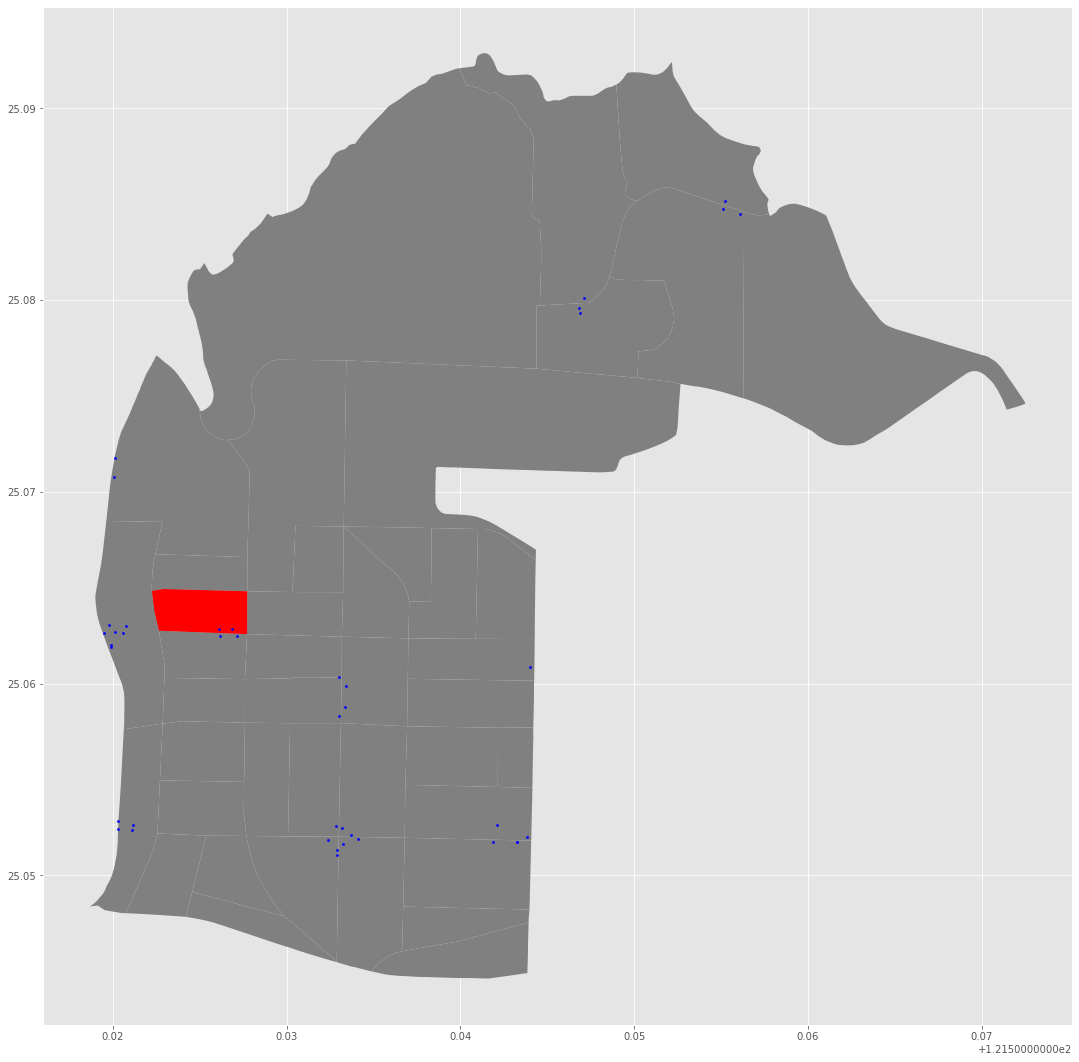

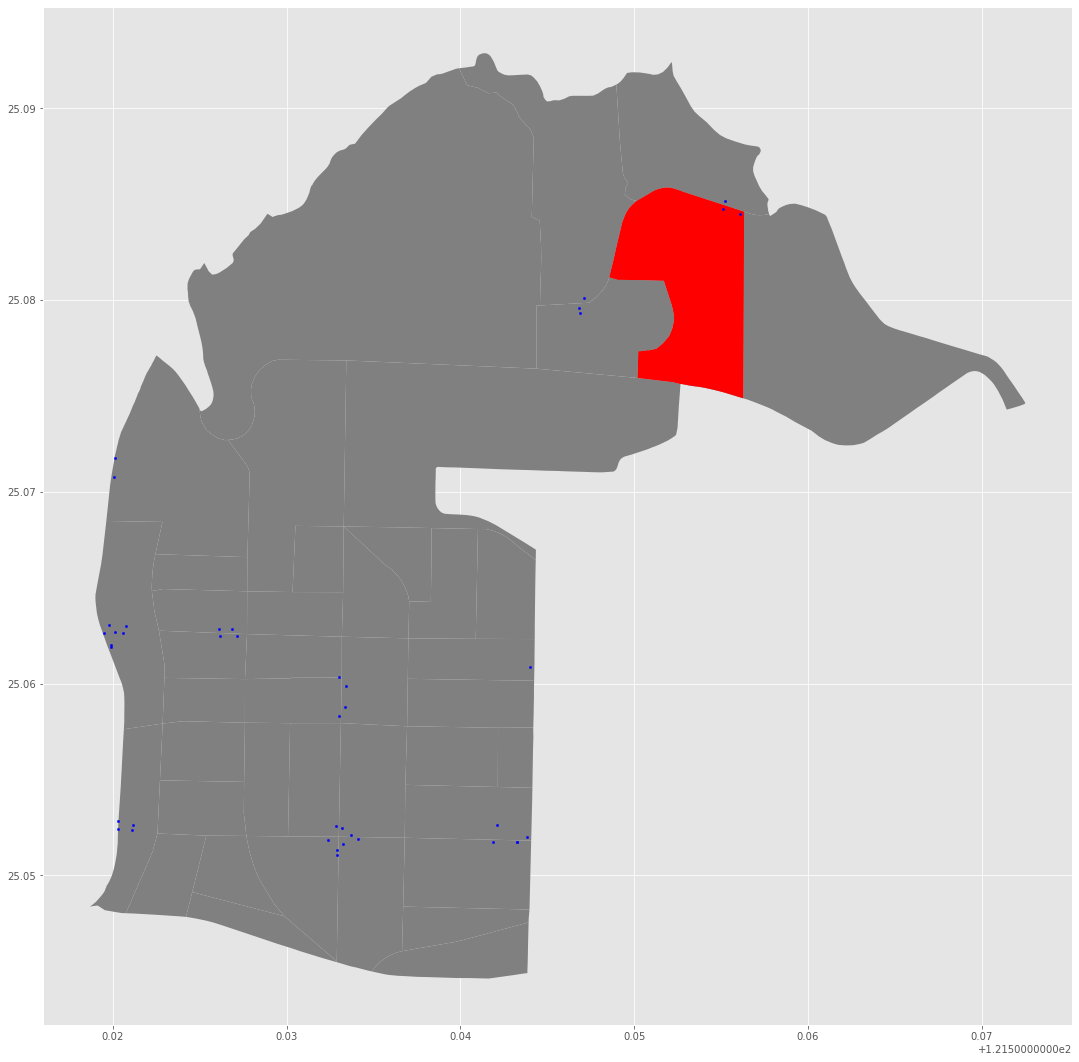

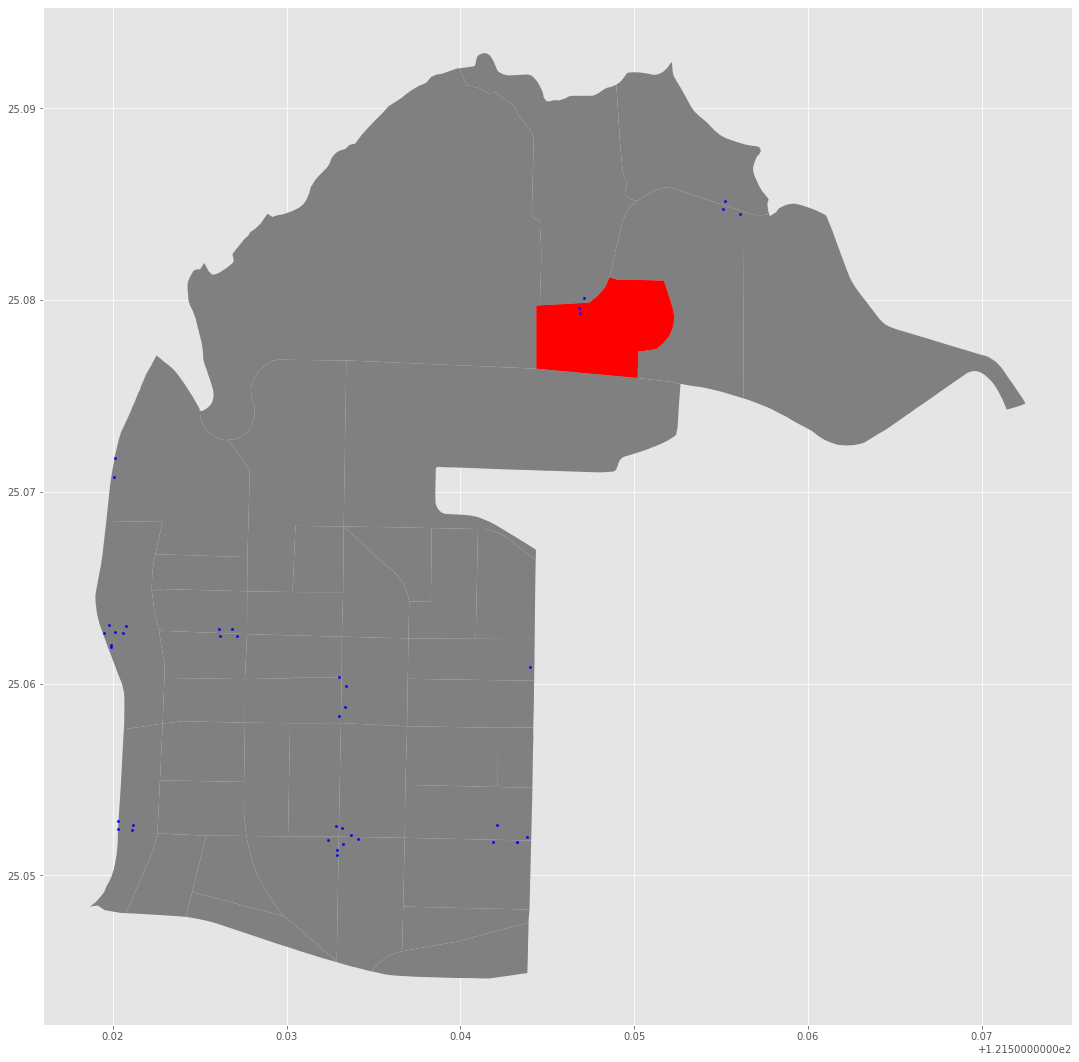

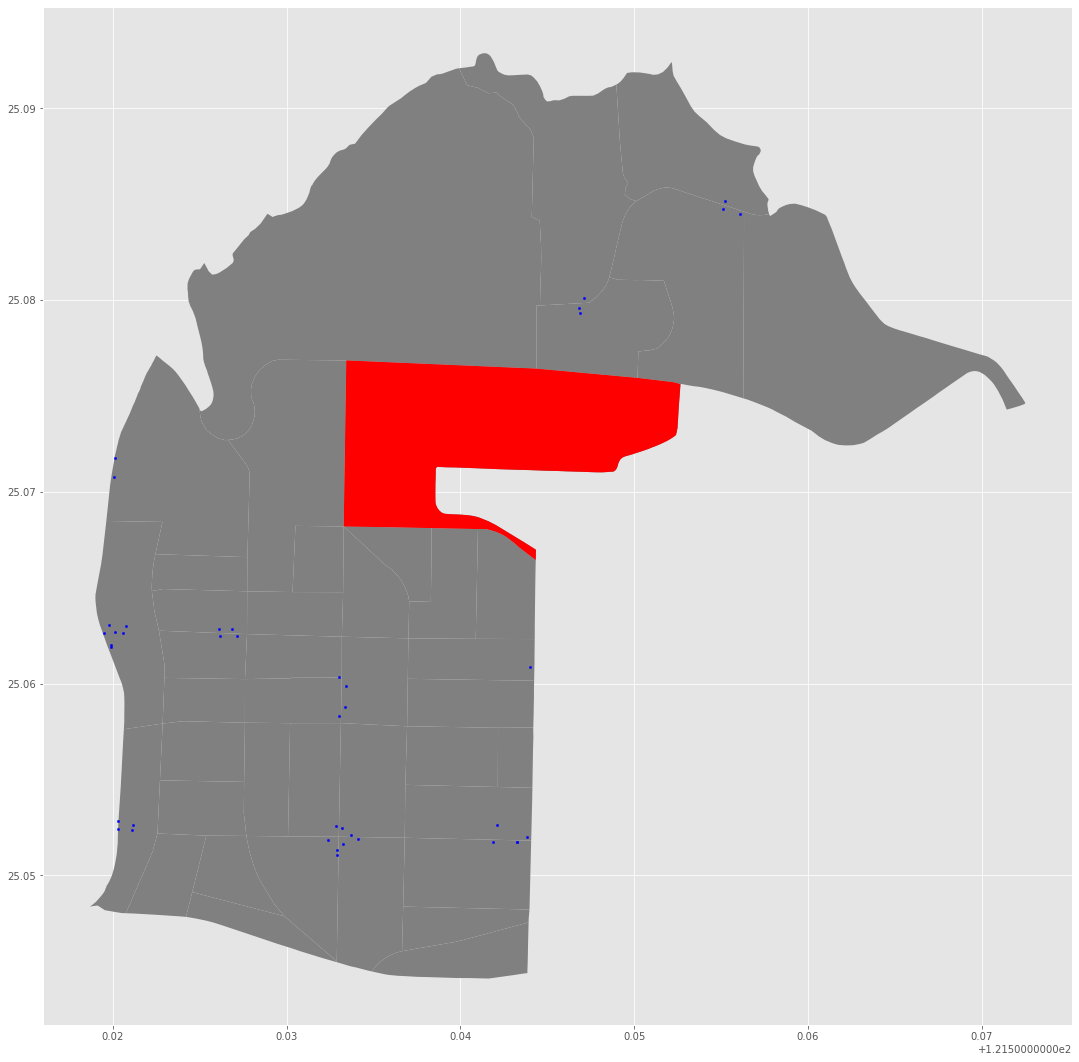

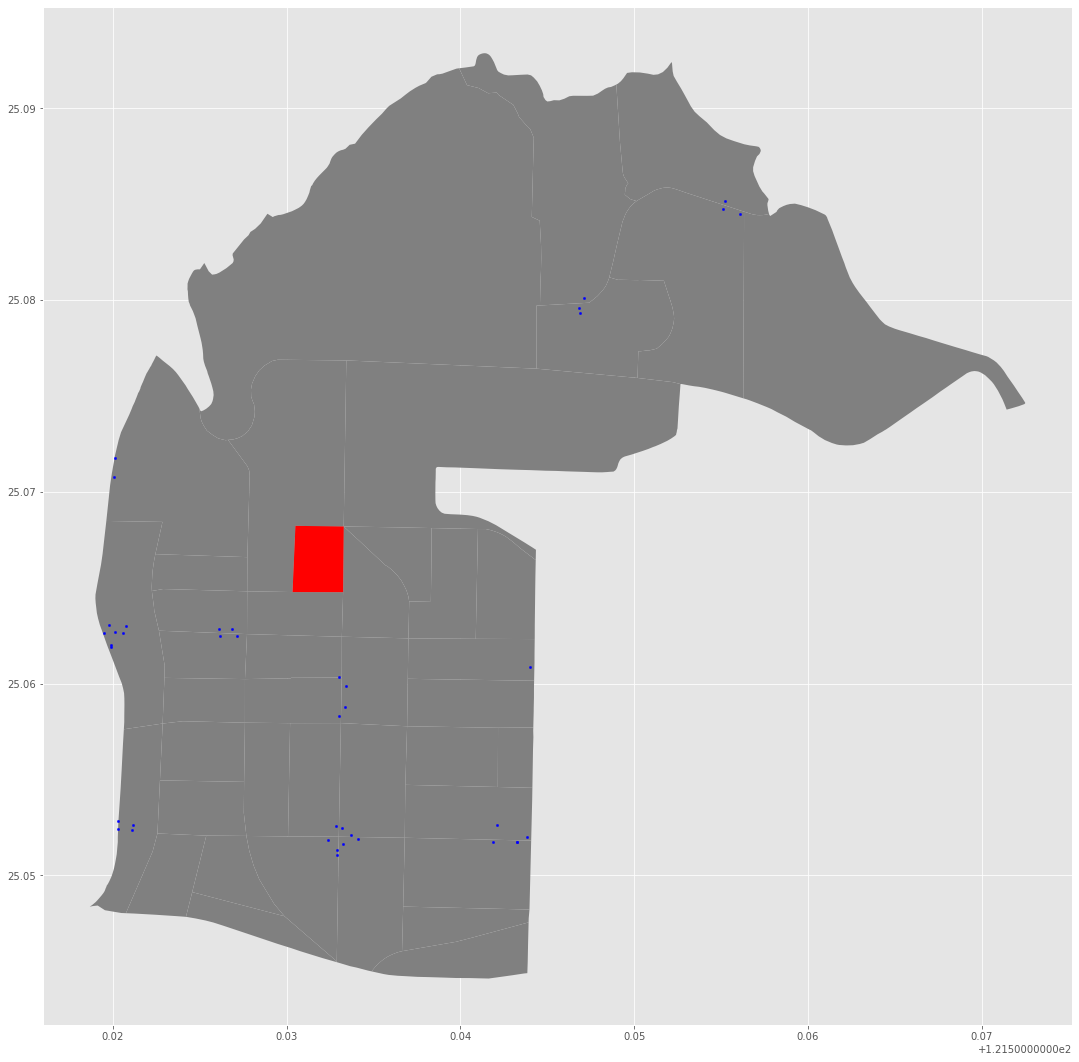

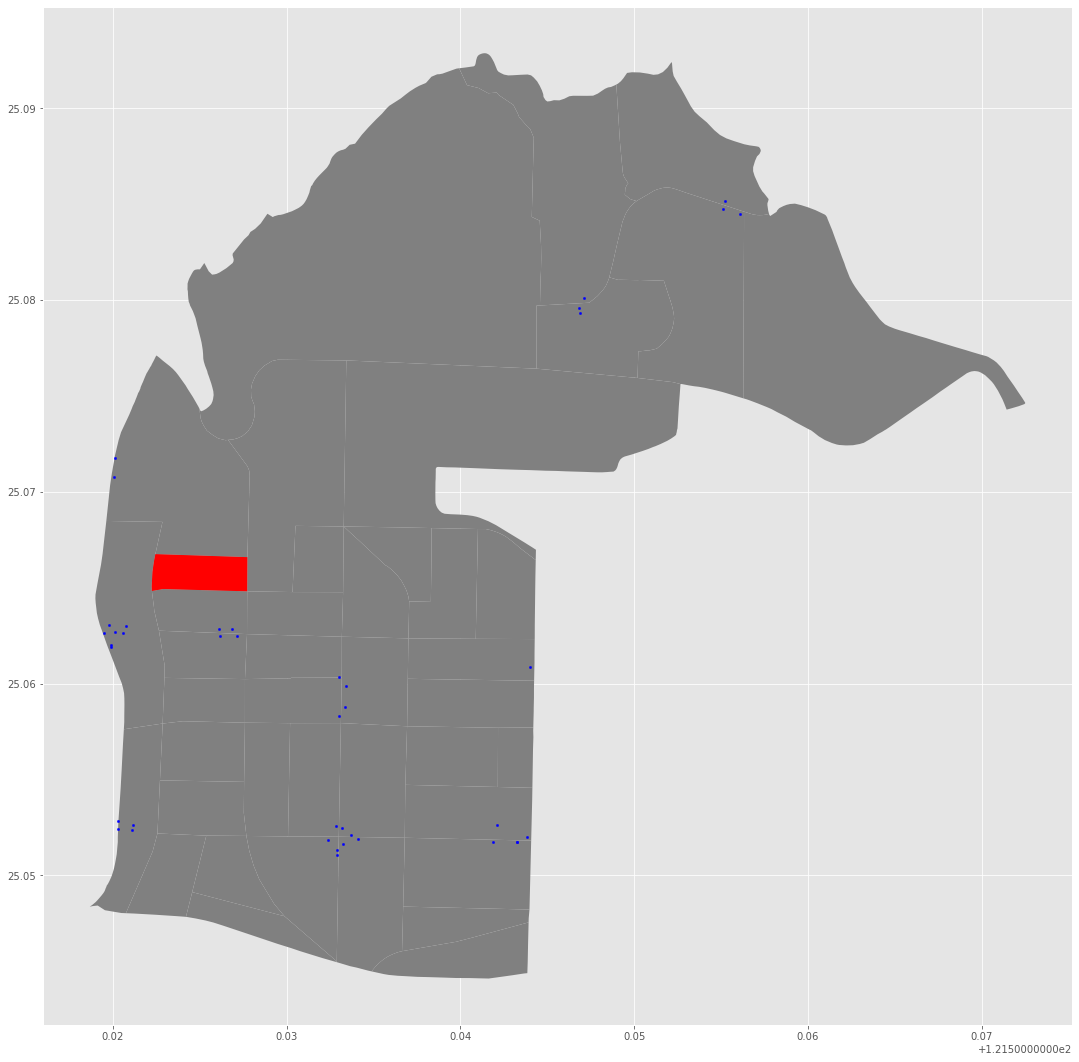

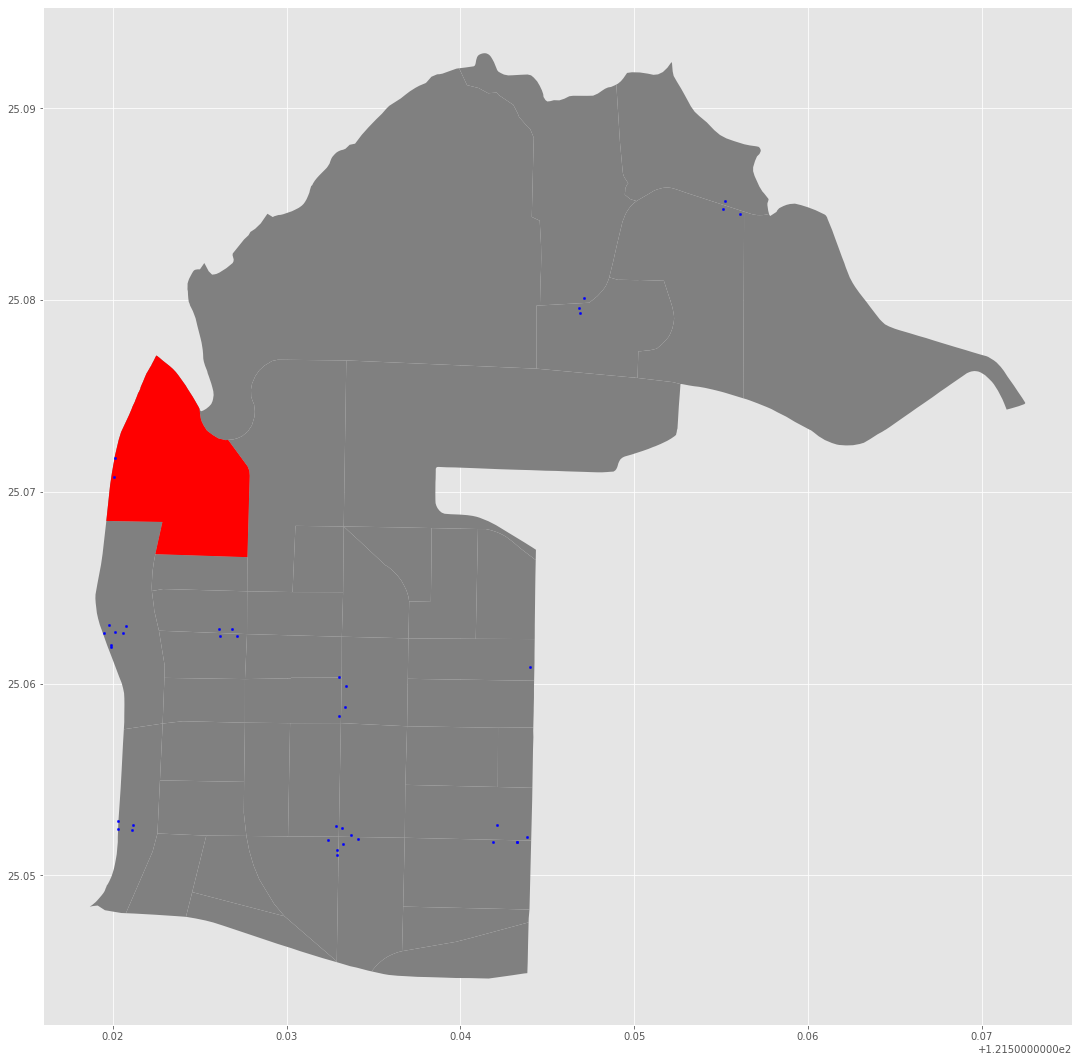

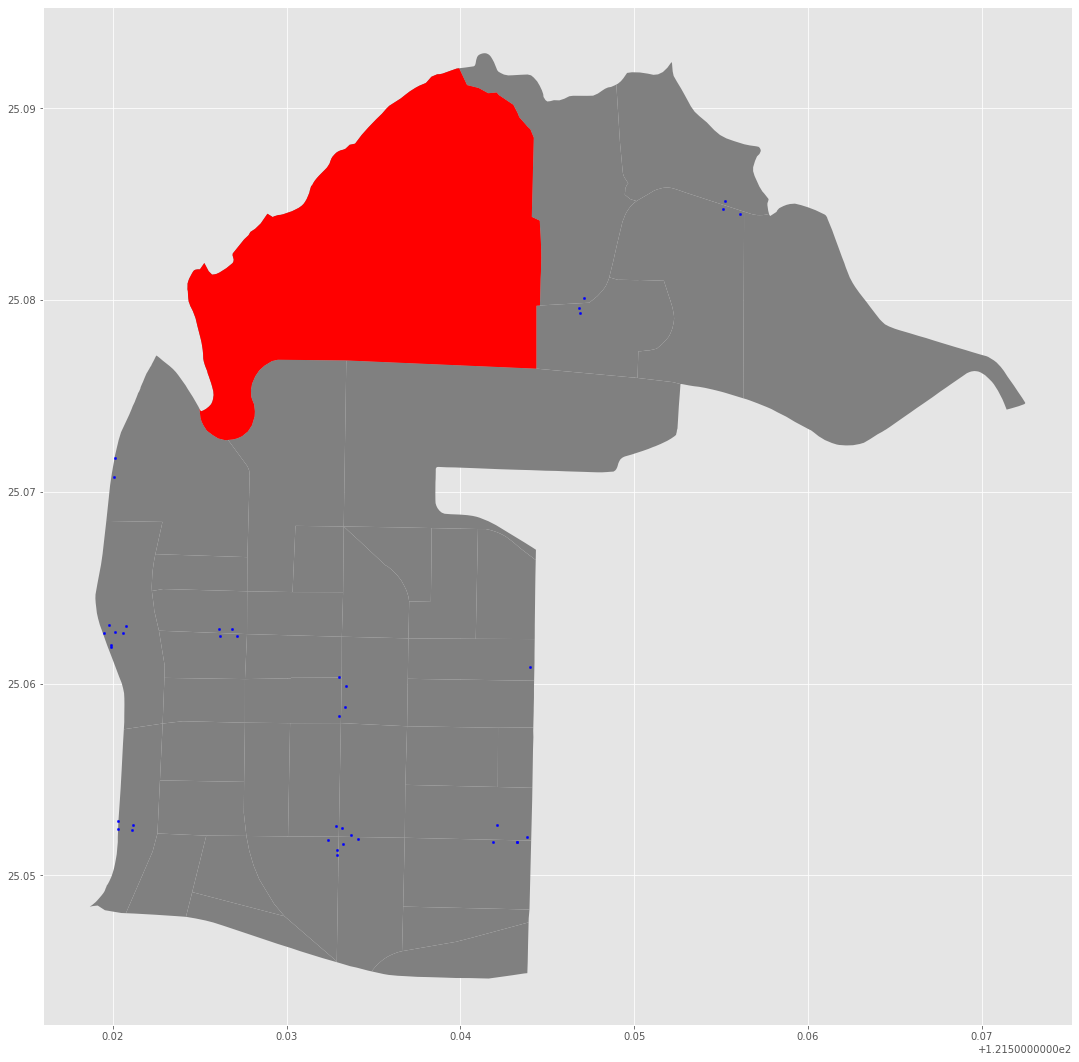

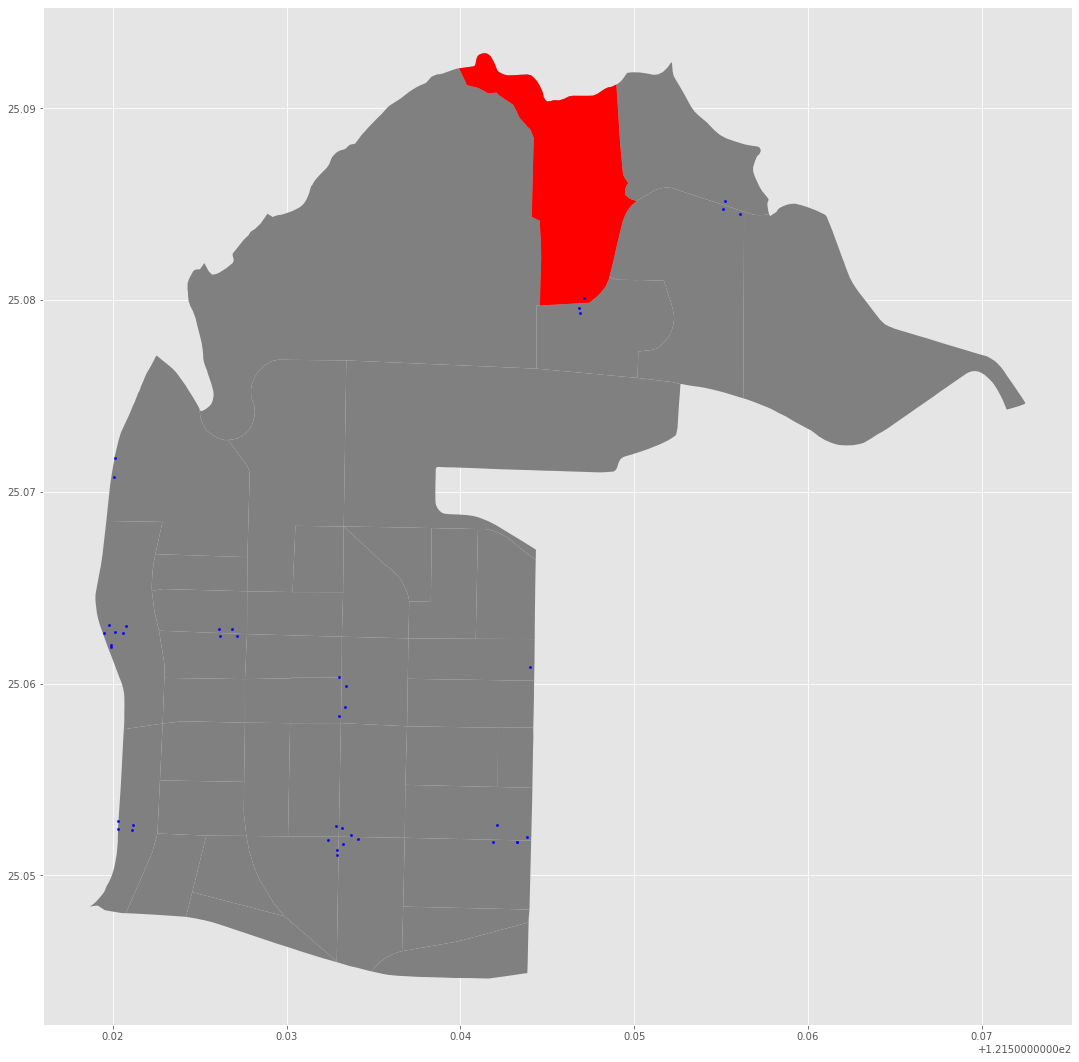

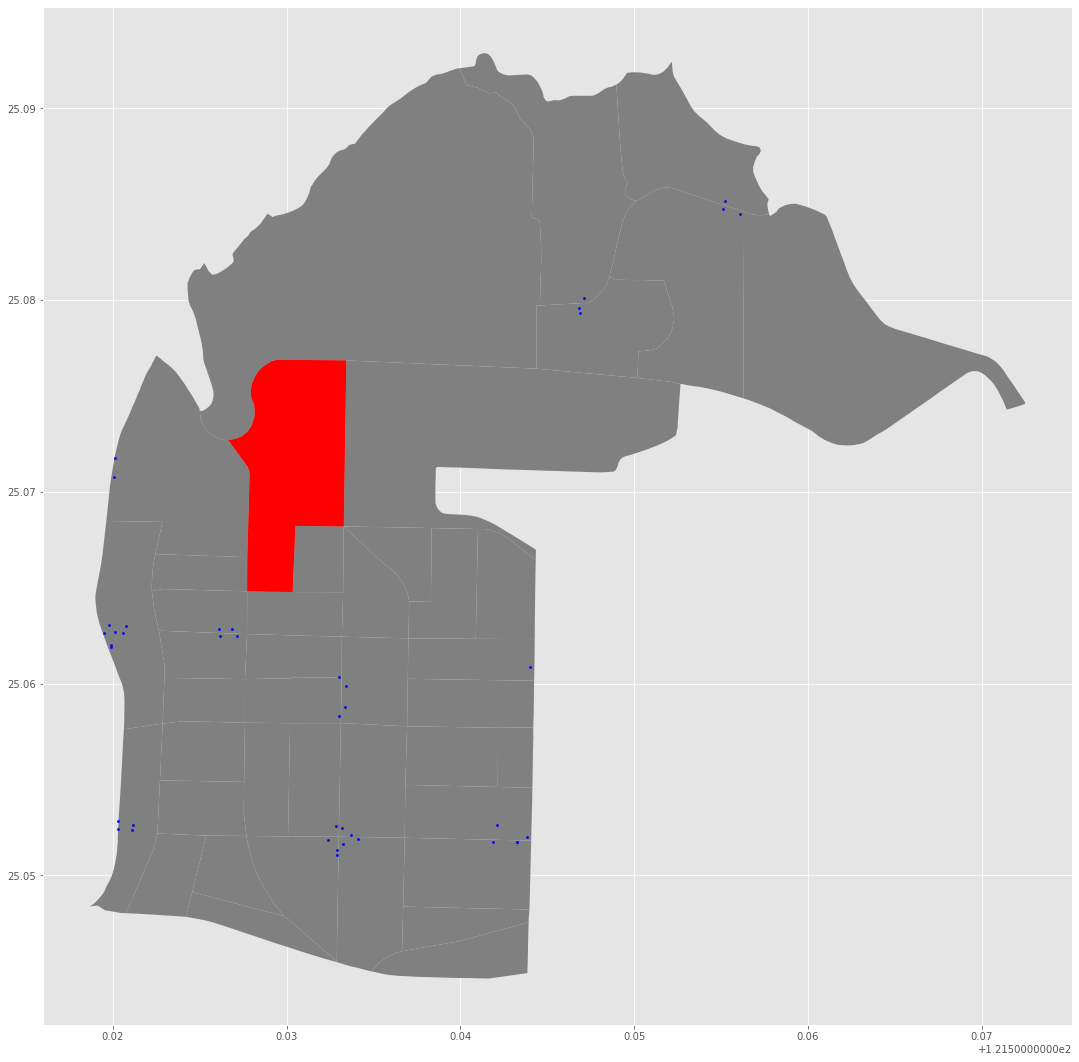

In [20]:
c = 0
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 15)

for villages in village_list:
    subcatch = zhongshan_gpd.loc[zhongshan_gpd["VILLNAME"] == villages]

    subcatch.reset_index(drop=True, inplace=True)
    
    pip_mask = mrt_select_data.within(subcatch.loc[0, 'geometry'])
    
    pip_data = mrt_select_data.loc[pip_mask]
    
    print(c, pip_data)
    
    n = pip_data.to_file(f"{villages}_mrt.shp",encoding='utf-8')
    
    c += 1

    fig, ax = plt.subplots()

    zhongshan_gpd.plot(ax=ax, facecolor='gray')

    subcatch.plot(ax=ax, facecolor='red')

    mrt_select_data.plot(ax=ax, color='blue', markersize=5)

    plt.tight_layout()

In [21]:
for villages in village_list:
    n = gpd.GeoDataFrame.from_file(f"{villages}_mrt.shp",encoding='utf-8')
    n.insert(loc=1, column="area", value = villages)
    n.to_csv(f"{villages}_mrt.csv", encoding="utf-8",  index=False)
    right = pd.read_csv(f"{villages}_mrt.csv")

C:\Users\Frank\anaconda3\lib\site-packages\fiona\collection.py:208: FeatureWarning: Empty field name at index 0
  self._schema = self.session.get_schema()
C:\Users\Frank\anaconda3\lib\site-packages\geopandas\geodataframe.py:630: UserWarning: Empty field name at index 0
  for feature in features_lst:
C:\Users\Frank\anaconda3\lib\site-packages\fiona\collection.py:208: FeatureWarning: Empty field name at index 0
  self._schema = self.session.get_schema()
C:\Users\Frank\anaconda3\lib\site-packages\fiona\collection.py:208: FeatureWarning: Empty field name at index 0
  self._schema = self.session.get_schema()
C:\Users\Frank\anaconda3\lib\site-packages\fiona\collection.py:208: FeatureWarning: Empty field name at index 0
  self._schema = self.session.get_schema()
C:\Users\Frank\anaconda3\lib\site-packages\fiona\collection.py:208: FeatureWarning: Empty field name at index 0
  self._schema = self.session.get_schema()
C:\Users\Frank\anaconda3\lib\site-packages\fiona\collection.py:208: FeatureWarn

In [22]:
mrt_1 = pd.read_csv("民安里_mrt.csv")
mrt_1

Unnamed: 0 area  enter numb   Longitude  Latitude_x enter name  \
0         NaN  民安里           1  121.520303   25.052414     中山站出口1   
1         NaN  民安里           2  121.521063   25.052382     中山站出口2   
2         NaN  民安里           3  121.521154   25.052611     中山站出口3   

                       geometry  
0  POINT (121.520303 25.052414)  
1  POINT (121.521063 25.052382)  
2  POINT (121.521154 25.052611)

In [23]:
mrt_2 = pd.read_csv("集英里_mrt.csv")
mrt_2

Unnamed: 0 area  enter numb   Longitude  Latitude_x enter name  \
0         NaN  集英里           1  121.519454   25.062641   民權西路站出口1   
1         NaN  集英里           4  121.519867   25.061936   民權西路站出口4   
2         NaN  集英里           3  121.519888   25.061991   民權西路站出口3   
3         NaN  集英里           7  121.520092   25.062670   民權西路站出口7   
4         NaN  集英里           8  121.520602   25.062660   民權西路站出口8   
5         NaN  集英里           9  121.520744   25.063027   民權西路站出口9   
6         NaN  集英里          10  121.519791   25.063063  民權西路站出口10   

                       geometry  
0  POINT (121.519454 25.062641)  
1  POINT (121.519867 25.061936)  
2  POINT (121.519888 25.061991)  
3   POINT (121.520092 25.06267)  
4   POINT (121.520602 25.06266)  
5  POINT (121.520744 25.063027)  
6  POINT (121.519791 25.063063)

In [24]:
data = pd.concat([mrt_1, mrt_2])
data

Unnamed: 0 area  enter numb   Longitude  Latitude_x enter name  \
0         NaN  民安里           1  121.520303   25.052414     中山站出口1   
1         NaN  民安里           2  121.521063   25.052382     中山站出口2   
2         NaN  民安里           3  121.521154   25.052611     中山站出口3   
0         NaN  集英里           1  121.519454   25.062641   民權西路站出口1   
1         NaN  集英里           4  121.519867   25.061936   民權西路站出口4   
2         NaN  集英里           3  121.519888   25.061991   民權西路站出口3   
3         NaN  集英里           7  121.520092   25.062670   民權西路站出口7   
4         NaN  集英里           8  121.520602   25.062660   民權西路站出口8   
5         NaN  集英里           9  121.520744   25.063027   民權西路站出口9   
6         NaN  集英里          10  121.519791   25.063063  民權西路站出口10   

                       geometry  
0  POINT (121.520303 25.052414)  
1  POINT (121.521063 25.052382)  
2  POINT (121.521154 25.052611)  
0  POINT (121.519454 25.062641)  
1  POINT (121.519867 25.061936)  
2  POINT (121.519888 25.061991)  
3   POINT (121.520092 25.06267)  
4   POINT (121.520602 25.06266)  
5  POINT (121.520744 25.063027)  
6  POINT (121.519791 25.063063)

In [25]:
data = pd.concat([mrt_1, mrt_2])
data
run = True
c = 8
while run:
    try:
        mrt_3 = pd.read_csv(f"{village_list[c]}_mrt.csv")
        data = pd.concat([data, mrt_3], ignore_index=True)
        c += 1
    except:
        run = False
data

data.to_csv("tour.csv",index=False)

In [26]:
data = pd.read_csv("tour.csv")
data

Unnamed: 0 area  enter numb   Longitude  Latitude_x enter name  \
0          NaN  民安里           1  121.520303   25.052414     中山站出口1   
1          NaN  民安里           2  121.521063   25.052382     中山站出口2   
2          NaN  民安里           3  121.521154   25.052611     中山站出口3   
3          NaN  集英里           1  121.519454   25.062641   民權西路站出口1   
4          NaN  集英里           4  121.519867   25.061936   民權西路站出口4   
5          NaN  集英里           3  121.519888   25.061991   民權西路站出口3   
6          NaN  集英里           7  121.520092   25.062670   民權西路站出口7   
7          NaN  集英里           8  121.520602   25.062660   民權西路站出口8   
8          NaN  集英里           9  121.520744   25.063027   民權西路站出口9   
9          NaN  集英里          10  121.519791   25.063063  民權西路站出口10   
10         NaN  聚葉里           2  121.526148   25.062461   中山國小站出口2   
11         NaN  聚葉里           3  121.527114   25.062476   中山國小站出口3   
12         NaN  中吉里           8  121.532826   25.052570   松江南京站出口8   
13         NaN  興亞里           1  121.532388   25.051842   松江南京站出口1   
14         NaN  興亞里           2  121.532875   25.051342   松江南京站出口2   
15         NaN  興亞里           3  121.532870   25.051085   松江南京站出口3   
16         NaN  力行里           2  121.541863   25.051748   南京復興站出口2   
17         NaN  力行里           3  121.543237   25.051719   南京復興站出口4   
18         NaN  力行里           4  121.543237   25.051719   南京復興站出口4   
19         NaN  中央里           6  121.533727   25.052095   松江南京站出口6   
20         NaN  中央里           7  121.533195   25.052470   松江南京站出口7   
21         NaN  朱園里           4  121.533240   25.051624   松江南京站出口4   
22         NaN  朱園里           5  121.534081   25.051882   松江南京站出口5   
23         NaN  松江里           2  121.533342   25.058792    行天宮站出口2   
24         NaN  松江里           3  121.533393   25.059868    行天宮站出口3   
25         NaN  江寧里           0  121.544031   25.060889    中山國中站出口   
26         NaN  新生里           4  121.532991   25.060365    行天宮站出口4   
27         NaN  中庄里           1  121.533004   25.058316    行天宮站出口1   
28         NaN  復華里           1  121.542121   25.052625   南京復興站出口1   
29         NaN  復華里           8  121.543819   25.052018   南京復興站出口8   
30         NaN  北安里           1  121.555226   25.085174    劍南路站出口1   
31         NaN  恆安里           1  121.526095   25.062840   中山國小站出口1   
32         NaN  恆安里           4  121.526835   25.062835   中山國小站出口4   
33         NaN  成功里           2  121.555097   25.084754    劍南路站出口2   
34         NaN  成功里           3  121.556098   25.084484    劍南路站出口3   
35         NaN  永安里           2  121.546823   25.079584     大直站出口2   
36         NaN  永安里           3  121.546901   25.079310     大直站出口3   
37         NaN  圓山里           1  121.520033   25.070785     圓山站出口1   
38         NaN  圓山里           2  121.520108   25.071776     圓山站出口2   
39         NaN  大直里           1  121.547104   25.080118     大直站出口1   

                        geometry  
0   POINT (121.520303 25.052414)  
1   POINT (121.521063 25.052382)  
2   POINT (121.521154 25.052611)  
3   POINT (121.519454 25.062641)  
4   POINT (121.519867 25.061936)  
5   POINT (121.519888 25.061991)  
6    POINT (121.520092 25.06267)  
7    POINT (121.520602 25.06266)  
8   POINT (121.520744 25.063027)  
9   POINT (121.519791 25.063063)  
10  POINT (121.526148 25.062461)  
11  POINT (121.527114 25.062476)  
12   POINT (121.532826 25.05257)  
13  POINT (121.532388 25.051842)  
14  POINT (121.532875 25.051342)  
15   POINT (121.53287 25.051085)  
16  POINT (121.541863 25.051748)  
17  POINT (121.543237 25.051719)  
18  POINT (121.543237 25.051719)  
19  POINT (121.533727 25.052095)  
20   POINT (121.533195 25.05247)  
21   POINT (121.53324 25.051624)  
22  POINT (121.534081 25.051882)  
23  POINT (121.533342 25.058792)  
24  POINT (121.533393 25.059868)  
25  POINT (121.544031 25.060889)  
26  POINT (121.532991 25.060365)  
27  POINT (121.533004 25.058316)  
28  POINT (121.542121 25.052625)  
29  POINT (121.543819 25.052018)  
30  POINT (121.555226 25.085174)  
31   POINT (1

In [27]:
data.rename(columns={"Latitude_x":"Latitude"})
data =  data.drop(["Unnamed: 0", "enter numb"], axis=1)
data

area   Longitude  Latitude_x enter name                      geometry
0   民安里  121.520303   25.052414     中山站出口1  POINT (121.520303 25.052414)
1   民安里  121.521063   25.052382     中山站出口2  POINT (121.521063 25.052382)
2   民安里  121.521154   25.052611     中山站出口3  POINT (121.521154 25.052611)
3   集英里  121.519454   25.062641   民權西路站出口1  POINT (121.519454 25.062641)
4   集英里  121.519867   25.061936   民權西路站出口4  POINT (121.519867 25.061936)
5   集英里  121.519888   25.061991   民權西路站出口3  POINT (121.519888 25.061991)
6   集英里  121.520092   25.062670   民權西路站出口7   POINT (121.520092 25.06267)
7   集英里  121.520602   25.062660   民權西路站出口8   POINT (121.520602 25.06266)
8   集英里  121.520744   25.063027   民權西路站出口9  POINT (121.520744 25.063027)
9   集英里  121.519791   25.063063  民權西路站出口10  POINT (121.519791 25.063063)
10  聚葉里  121.526148   25.062461   中山國小站出口2  POINT (121.526148 25.062461)
11  聚葉里  121.527114   25.062476   中山國小站出口3  POINT (121.527114 25.062476)
12  中吉里  121.532826   25.052570   松江南京站出口8   POINT (121.532826 25.05257)
13  興亞里  121.532388   25.051842   松江南京站出口1  POINT (121.532388 25.051842)
14  興亞里  121.532875   25.051342   松江南京站出口2  POINT (121.532875 25.051342)
15  興亞里  121.532870   25.051085   松江南京站出口3   POINT (121.53287 25.051085)
16  力行里  121.541863   25.051748   南京復興站出口2  POINT (121.541863 25.051748)
17  力行里  121.543237   25.051719   南京復興站出口4  POINT (121.543237 25.051719)
18  力行里  121.543237   25.051719   南京復興站出口4  POINT (121.543237 25.051719)
19  中央里  121.533727   25.052095   松江南京站出口6  POINT (121.533727 25.052095)
20  中央里  121.533195   25.052470   松江南京站出口7   POINT (121.533195 25.05247)
21  朱園里  121.533240   25.051624   松江南京站出口4   POINT (121.53324 25.051624)
22  朱園里  121.534081   25.051882   松江南京站出口5  POINT (121.534081 25.051882)
23  松江里  121.533342   25.058792    行天宮站出口2  POINT (121.533342 25.058792)
24  松江里  121.533393   25.059868    行天宮站出口3  POINT (121.533393 25.059868)
25  江寧里  121.544031   25.060889    中山國中站出口  POINT (121.544031 25.060889)
26  新生里  121.532991   25.060365    行天宮站出口4  POINT (121.532991 25.060365)
27  中庄里  121.533004   25.058316    行天宮站出口1  POINT (121.533004 25.058316)
28  復華里  121.542121   25.052625   南京復興站出口1  POINT (121.542121 25.052625)
29  復華里  121.543819   25.052018   南京復興站出口8  POINT (121.543819 25.052018)
30  北安里  121.555226   25.085174    劍南路站出口1  POINT (121.555226 25.085174)
31  恆安里  121.526095   25.062840   中山國小站出口1   POINT (121.526095 25.06284)
32  恆安里  121.526835   25.062835   中山國小站出口4  POINT (121.526835 25.062835)
33  成功里  121.555097   25.084754    劍南路站出口2  POINT (121.555097 25.084754)
34  成功里  121.556098   25.084484    劍南路站出口3  POINT (121.556098 25.084484)
35  永安里  121.546823   25.079584     大直站出口2  POINT (121.546823 25.079584)
36  永安里  121.546901   25.079310     大直站出口3   POINT (121.546901 25.07931)
37  圓山里  121.520033   25.070785     圓山站出口1  POINT (121.520033 25.070785)
38  圓山里  121.520108   25.071776     圓山站出口2  POINT (121.520108 25.071776)
39  大直里  121.547104   25.080118     大直站出口1  POINT (121.547104 25.080118)

In [28]:
count_list = []
mrt_count =  data.groupby("area").count()
mrt_count

mrt_count.reset_index(inplace=True)
for i in mrt_count["enter name"]:
    count_list.append(i)
mrt_count = mrt_count.drop(["Latitude_x", "enter name", "geometry"], axis=1)
mrt_count = mrt_count.rename(columns={"Longitude":"MRT", "area":"village"})
mrt_count

village  MRT
0      中吉里    1
1      中央里    2
2      中庄里    1
3      力行里    3
4      北安里    1
5      圓山里    2
6      大直里    1
7      復華里    2
8      恆安里    2
9      成功里    2
10     新生里    1
11     朱園里    2
12     松江里    2
13     民安里    3
14     永安里    2
15     江寧里    1
16     聚葉里    2
17     興亞里    3
18     集英里    7

In [29]:
tour_df

village
1      民安里
2      康樂里
3      中山里
4      聚盛里
5      正守里
6      正義里
7      正得里
8      集英里
9      聚葉里
10     中吉里
11     中原里
12     興亞里
13     埤頭里
14     朱崙里
15     力行里
16     中央里
17     朱馥里
18     龍洲里
19     朱園里
20     新福里
21     松江里
22     行孝里
23     下埤里
24     江寧里
25     江山里
26     新生里
27     中庄里
28     行政里
29     行仁里
30     復華里
31     金泰里
32     北安里
33     恆安里
34     成功里
35     永安里
36     大佳里
37     新喜里
38     晴光里
39     圓山里
40     劍潭里
41     大直里
42     新庄里

In [30]:
mrt_count.reset_index(inplace=True)
count_data = pd.merge(tour_df, mrt_count, on="village", how="left")
count_data = count_data.drop(["index"],axis=1)
count_data

village  MRT
0      民安里  3.0
1      康樂里  NaN
2      中山里  NaN
3      聚盛里  NaN
4      正守里  NaN
5      正義里  NaN
6      正得里  NaN
7      集英里  7.0
8      聚葉里  2.0
9      中吉里  1.0
10     中原里  NaN
11     興亞里  3.0
12     埤頭里  NaN
13     朱崙里  NaN
14     力行里  3.0
15     中央里  2.0
16     朱馥里  NaN
17     龍洲里  NaN
18     朱園里  2.0
19     新福里  NaN
20     松江里  2.0
21     行孝里  NaN
22     下埤里  NaN
23     江寧里  1.0
24     江山里  NaN
25     新生里  1.0
26     中庄里  1.0
27     行政里  NaN
28     行仁里  NaN
29     復華里  2.0
30     金泰里  NaN
31     北安里  1.0
32     恆安里  2.0
33     成功里  2.0
34     永安里  2.0
35     大佳里  NaN
36     新喜里  NaN
37     晴光里  NaN
38     圓山里  2.0
39     劍潭里  NaN
40     大直里  1.0
41     新庄里  NaN

In [31]:
school_df = pd.read_csv("school.csv", encoding="utf-8")
school_df

address       name   Latitude   Longitude
0       台北市中山區民權東路一段69號     中山國民小學  25.063640  121.526964
1          台北市中山區吉林路15號     長安國民小學  25.049816  121.530187
2          台北市中山區龍江路62號     中正國民小學  25.050467  121.540065
3         台北市中山區濱江街107號     大佳國民小學  25.073373  121.536018
4          台北市中山區五常街16號     五常國民小學  25.064139  121.542202
5         台北市中山區長春路116號     吉林國民小學  25.054731  121.529575
6         台北市中山區長春路165號     長春國民小學  25.055889  121.533834
7           台北市中山區大直街2號     大直國民小學  25.080543  121.546238
8     台北市中山區樂群二路266巷99號     濱江國民小學  25.077766  121.561685
9        台北市中山區安東街16巷2號     懷生國民小學  25.045269  121.541703
10   台北市中山區明水路397巷19弄1號     永安國民小學  25.079447  121.549756
11       台北市中山區林森北路511號     新興國民中學  25.061799  121.525983
12      台北市中山區松江路70巷11號     長安國民中學  25.049393  121.531854
13     台北市中山區復興北路430巷1號     五常國民中學  25.063480  121.543251
14     台北市松山區復興北路361巷7號     中山國民中學  25.060672  121.545530
15        台北市中山區明水路325號     北安國民中學  25.077781  121.541675
16       台北市中山區樂群二路262號   濱江實驗國民中學  25.079550  121.560750
17     台北市中山區長安東路二段141號   中山女子高級中學  25.048488  121.537462
18        台北市中山區長春路167號   市立大同高級中學  25.056171  121.535759
19      台北市中山區中山北路三段40號   私立大同高級中學  25.066684  121.521076
20        台北市中山區北安路420號     大直高級中學  25.078585  121.543400
21         台北市中山區大直街70號       實踐大學  25.083739  121.546091
22    台北市中山區中山北路三段40號1樓       大同大學  25.066684  121.521076
23      台北市中山區民生東路三段67號       台北大學  25.058409  121.542105
24        台北市中山區松江路367號  聯合醫院中山門診部  25.064386  121.533655
25      台北市中山區中山北路二段92號     馬偕紀念醫院  25.058846  121.522398
26  台北市中山區民權東路二段92巷2-1號       泰安醫院  25.061468  121.531555
27       台北市中山區林森北路530號   聯合醫院林森院區  25.063522  121.525438
28   台北市中山區中山北路三段181-1號      台北故事館  25.073132  121.524610
29     台北市中山區中山北路三段181號     台北市美術館  25.072570  121.524845
30          台北市中山區玉門街1號         花博  25.070384  121.520541
31    台北市中山區建國北路一段96號B1      袖珍博物館  25.050422  121.536058
32     台北市中山區民權東路二段109號        行天宮  25.062703  121.533512
33        台北市中山區濱江街180巷        飛機巷  25.070217  121.538482
34            台北市中山區遼寧街       遼寧夜市  25.052495  121.542042
35            台北市中山區雙城街       雙城夜市  25.065831  121.524304

In [32]:
lat_lon_school = "school.gpkg"
lat_lon_school = gpd.read_file(lat_lon_school, driver='GPKG')
lat_lon_school

address       name   Latitude   Longitude  \
0       台北市中山區民權東路一段69號     中山國民小學  25.063640  121.526964   
1          台北市中山區吉林路15號     長安國民小學  25.049816  121.530187   
2          台北市中山區龍江路62號     中正國民小學  25.050467  121.540065   
3         台北市中山區濱江街107號     大佳國民小學  25.073373  121.536018   
4          台北市中山區五常街16號     五常國民小學  25.064139  121.542202   
5         台北市中山區長春路116號     吉林國民小學  25.054731  121.529575   
6         台北市中山區長春路165號     長春國民小學  25.055889  121.533834   
7           台北市中山區大直街2號     大直國民小學  25.080543  121.546238   
8     台北市中山區樂群二路266巷99號     濱江國民小學  25.077766  121.561685   
9        台北市中山區安東街16巷2號     懷生國民小學  25.045269  121.541703   
10   台北市中山區明水路397巷19弄1號     永安國民小學  25.079447  121.549756   
11       台北市中山區林森北路511號     新興國民中學  25.061799  121.525983   
12      台北市中山區松江路70巷11號     長安國民中學  25.049393  121.531854   
13     台北市中山區復興北路430巷1號     五常國民中學  25.063480  121.543251   
14     台北市松山區復興北路361巷7號     中山國民中學  25.060672  121.545530   
15        台北市中山區明水路325號     北安國民中學  25.077781  121.541675   
16       台北市中山區樂群二路262號   濱江實驗國民中學  25.079550  121.560750   
17     台北市中山區長安東路二段141號   中山女子高級中學  25.048488  121.537462   
18        台北市中山區長春路167號   市立大同高級中學  25.056171  121.535759   
19      台北市中山區中山北路三段40號   私立大同高級中學  25.066684  121.521076   
20        台北市中山區北安路420號     大直高級中學  25.078585  121.543400   
21         台北市中山區大直街70號       實踐大學  25.083739  121.546091   
22    台北市中山區中山北路三段40號1樓       大同大學  25.066684  121.521076   
23      台北市中山區民生東路三段67號       台北大學  25.058409  121.542105   
24        台北市中山區松江路367號  聯合醫院中山門診部  25.064386  121.533655   
25      台北市中山區中山北路二段92號     馬偕紀念醫院  25.058846  121.522398   
26  台北市中山區民權東路二段92巷2-1號       泰安醫院  25.061468  121.531555   
27       台北市中山區林森北路530號   聯合醫院林森院區  25.063522  121.525438   
28   台北市中山區中山北路三段181-1號      台北故事館  25.073132  121.524610   
29     台北市中山區中山北路三段181號     台北市美術館  25.072570  121.524845   
30          台北市中山區玉門街1號         花博  25.070384  121.520541   
31    台北市中山區建國北路一段96號B1      袖珍博物館  25.050422  121.536058   
32     台北市中山區民權東路二段109號        行天宮  25.062703  121.533512   
33        台北市中山區濱江街180巷        飛機巷  25.070217  121.538482   
34            台北市中山區遼寧街       遼寧夜市  25.052495  121.542042   
35            台北市中山區雙城街       雙城夜市  25.065831  121.524304   

                      geometry  
0   POINT (121.52696 25.06364)  
1   POINT (121.53019 25.04982)  
2   POINT (121.54007 25.05047)  
3   POINT (121.53602 25.07337)  
4   POINT (121.54220 25.06414)  
5   POINT (121.52958 25.05473)  
6   POINT (121.53383 25.05589)  
7   POINT (121.54624 25.08054)  
8   POINT (121.56168 25.07777)  
9   POINT (121.54170 25.04527)  
10  POINT (121.54976 25.07945)  
11  POINT (121.52598 25.06180)  
12  POINT (121.53185 25.04939)  
13  POINT (121.54325 25.06348)  
14  POINT (121.54553 25.06067)  
15  POINT (121.54168 25.07778)  
16  POINT (121.56075 25.07955)  
17  POINT (121.53746 25.04849)  
18  POINT (121.53576 25.05617)  
19  POINT (121.52108 25.06668)  
20  POINT (121.54340 25.07858)  
21  POINT (121.54609 25.08374)  
22  POINT (121.52108 25.06668)  
23  POINT (121.54210 25.05841)  
24  POINT (121.53366 25.06439)  
25  POINT (121.52240 25.05885)  
26  POINT (121.53156 25.06147)  
27  POINT (121.52544 25.06352)  
28  POINT (121.52461 25.07313)  
29  POINT (121.52484 25.07257)  
30  POINT (121.52054 25.07038)  
31  POINT (121.53606 25.05042)  
32  POINT (121.53351 25.06270)  
33  POINT (121.53848 25.07022)  
34  POINT (121.54204 25.05250)  
35  POINT (121.52430 25.06583)

0 Empty GeoDataFrame
Columns: [address, name, Latitude, Longitude, geometry]
Index: []
1 Empty GeoDataFrame
Columns: [address, name, Latitude, Longitude, geometry]
Index: []
2 Empty GeoDataFrame
Columns: [address, name, Latitude, Longitude, geometry]
Index: []


C:\Users\Frank\anaconda3\lib\site-packages\geopandas\io\file.py:545: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)
C:\Users\Frank\anaconda3\lib\site-packages\geopandas\io\file.py:545: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)
C:\Users\Frank\anaconda3\lib\site-packages\geopandas\io\file.py:545: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)


3 Empty GeoDataFrame
Columns: [address, name, Latitude, Longitude, geometry]
Index: []
4 Empty GeoDataFrame
Columns: [address, name, Latitude, Longitude, geometry]
Index: []
5 Empty GeoDataFrame
Columns: [address, name, Latitude, Longitude, geometry]
Index: []


C:\Users\Frank\anaconda3\lib\site-packages\geopandas\io\file.py:545: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)
C:\Users\Frank\anaconda3\lib\site-packages\geopandas\io\file.py:545: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)
C:\Users\Frank\anaconda3\lib\site-packages\geopandas\io\file.py:545: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)


6 Empty GeoDataFrame
Columns: [address, name, Latitude, Longitude, geometry]
Index: []
7               address      name   Latitude   Longitude  \
19    台北市中山區中山北路三段40號  私立大同高級中學  25.066684  121.521076   
22  台北市中山區中山北路三段40號1樓      大同大學  25.066684  121.521076   
25    台北市中山區中山北路二段92號    馬偕紀念醫院  25.058846  121.522398   

                      geometry  
19  POINT (121.52108 25.06668)  
22  POINT (121.52108 25.06668)  
25  POINT (121.52240 25.05885)  


C:\Users\Frank\anaconda3\lib\site-packages\geopandas\io\file.py:545: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)


8            address    name   Latitude   Longitude                    geometry
11  台北市中山區林森北路511號  新興國民中學  25.061799  121.525983  POINT (121.52598 25.06180)
9 Empty GeoDataFrame
Columns: [address, name, Latitude, Longitude, geometry]
Index: []
10          address    name   Latitude   Longitude                    geometry
5  台北市中山區長春路116號  吉林國民小學  25.054731  121.529575  POINT (121.52958 25.05473)


C:\Users\Frank\anaconda3\lib\site-packages\geopandas\io\file.py:545: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)


11             address    name   Latitude   Longitude                    geometry
1      台北市中山區吉林路15號  長安國民小學  25.049816  121.530187  POINT (121.53019 25.04982)
12  台北市中山區松江路70巷11號  長安國民中學  25.049393  121.531854  POINT (121.53185 25.04939)
12           address    name   Latitude   Longitude                    geometry
9  台北市中山區安東街16巷2號  懷生國民小學  25.045269  121.541703  POINT (121.54170 25.04527)
13 Empty GeoDataFrame
Columns: [address, name, Latitude, Longitude, geometry]
Index: []


C:\Users\Frank\anaconda3\lib\site-packages\geopandas\io\file.py:545: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)


14              address      name   Latitude   Longitude  \
2       台北市中山區龍江路62號    中正國民小學  25.050467  121.540065   
17  台北市中山區長安東路二段141號  中山女子高級中學  25.048488  121.537462   

                      geometry  
2   POINT (121.54007 25.05047)  
17  POINT (121.53746 25.04849)  
15           address      name   Latitude   Longitude                    geometry
6   台北市中山區長春路165號    長春國民小學  25.055889  121.533834  POINT (121.53383 25.05589)
18  台北市中山區長春路167號  市立大同高級中學  25.056171  121.535759  POINT (121.53576 25.05617)
16 Empty GeoDataFrame
Columns: [address, name, Latitude, Longitude, geometry]
Index: []


C:\Users\Frank\anaconda3\lib\site-packages\geopandas\io\file.py:545: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)
C:\Users\Frank\anaconda3\lib\site-packages\geopandas\io\file.py:545: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)


17 Empty GeoDataFrame
Columns: [address, name, Latitude, Longitude, geometry]
Index: []
18               address   name   Latitude   Longitude  \
31  台北市中山區建國北路一段96號B1  袖珍博物館  25.050422  121.536058   

                      geometry  
31  POINT (121.53606 25.05042)  
19 Empty GeoDataFrame
Columns: [address, name, Latitude, Longitude, geometry]
Index: []


C:\Users\Frank\anaconda3\lib\site-packages\geopandas\io\file.py:545: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)
C:\Users\Frank\anaconda3\lib\site-packages\geopandas\io\file.py:545: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)
C:\Users\Frank\AppData\Local\Temp\ipykernel_16072\2528280523.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
C:\Users\Frank\anaconda3\lib\site-packages\geopandas\io\file.py:545: UserWarning: You are attempting to write an empty DataFrame to file. 

20 Empty GeoDataFrame
Columns: [address, name, Latitude, Longitude, geometry]
Index: []
21 Empty GeoDataFrame
Columns: [address, name, Latitude, Longitude, geometry]
Index: []
22              address    name   Latitude   Longitude  \
4       台北市中山區五常街16號  五常國民小學  25.064139  121.542202   
13  台北市中山區復興北路430巷1號  五常國民中學  25.063480  121.543251   

                      geometry  
4   POINT (121.54220 25.06414)  
13  POINT (121.54325 25.06348)  
23 Empty GeoDataFrame
Columns: [address, name, Latitude, Longitude, geometry]
Index: []
24             address  name   Latitude   Longitude                    geometry
23  台北市中山區民生東路三段67號  台北大學  25.058409  121.542105  POINT (121.54210 25.05841)
25                 address  name   Latitude   Longitude  \
26  台北市中山區民權東路二段92巷2-1號  泰安醫院  25.061468  121.531555   

                      geometry  
26  POINT (121.53156 25.06147)  


C:\Users\Frank\anaconda3\lib\site-packages\geopandas\io\file.py:545: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)


26 Empty GeoDataFrame
Columns: [address, name, Latitude, Longitude, geometry]
Index: []
27              address       name   Latitude   Longitude  \
24     台北市中山區松江路367號  聯合醫院中山門診部  25.064386  121.533655   
32  台北市中山區民權東路二段109號        行天宮  25.062703  121.533512   

                      geometry  
24  POINT (121.53366 25.06439)  
32  POINT (121.53351 25.06270)  
28 Empty GeoDataFrame
Columns: [address, name, Latitude, Longitude, geometry]
Index: []


C:\Users\Frank\anaconda3\lib\site-packages\geopandas\io\file.py:545: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)
C:\Users\Frank\anaconda3\lib\site-packages\geopandas\io\file.py:545: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)


29       address  name   Latitude   Longitude                    geometry
34  台北市中山區遼寧街  遼寧夜市  25.052495  121.542042  POINT (121.54204 25.05250)
30               address      name   Latitude   Longitude  \
8   台北市中山區樂群二路266巷99號    濱江國民小學  25.077766  121.561685   
16     台北市中山區樂群二路262號  濱江實驗國民中學  25.079550  121.560750   

                      geometry  
8   POINT (121.56168 25.07777)  
16  POINT (121.56075 25.07955)  
31 Empty GeoDataFrame
Columns: [address, name, Latitude, Longitude, geometry]
Index: []
32             address      name   Latitude   Longitude  \
0   台北市中山區民權東路一段69號    中山國民小學  25.063640  121.526964   
27   台北市中山區林森北路530號  聯合醫院林森院區  25.063522  121.525438   

                      geometry  
0   POINT (121.52696 25.06364)  
27  POINT (121.52544 25.06352)  
33 Empty GeoDataFrame
Columns: [address, name, Latitude, Longitude, geometry]
Index: []


C:\Users\Frank\anaconda3\lib\site-packages\geopandas\io\file.py:545: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)
C:\Users\Frank\anaconda3\lib\site-packages\geopandas\io\file.py:545: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)


34                address    name   Latitude   Longitude  \
10  台北市中山區明水路397巷19弄1號  永安國民小學  25.079447  121.549756   

                      geometry  
10  POINT (121.54976 25.07945)  
35           address    name   Latitude   Longitude                    geometry
3   台北市中山區濱江街107號  大佳國民小學  25.073373  121.536018  POINT (121.53602 25.07337)
33  台北市中山區濱江街180巷     飛機巷  25.070217  121.538482  POINT (121.53848 25.07022)
36 Empty GeoDataFrame
Columns: [address, name, Latitude, Longitude, geometry]
Index: []


C:\Users\Frank\anaconda3\lib\site-packages\geopandas\io\file.py:545: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)


37       address  name   Latitude   Longitude                    geometry
35  台北市中山區雙城街  雙城夜市  25.065831  121.524304  POINT (121.52430 25.06583)
38                address    name   Latitude   Longitude  \
28  台北市中山區中山北路三段181-1號   台北故事館  25.073132  121.524610   
29    台北市中山區中山北路三段181號  台北市美術館  25.072570  121.524845   
30         台北市中山區玉門街1號      花博  25.070384  121.520541   

                      geometry  
28  POINT (121.52461 25.07313)  
29  POINT (121.52484 25.07257)  
30  POINT (121.52054 25.07038)  
39           address    name   Latitude   Longitude                    geometry
15  台北市中山區明水路325號  北安國民中學  25.077781  121.541675  POINT (121.54168 25.07778)
20  台北市中山區北安路420號  大直高級中學  25.078585  121.543400  POINT (121.54340 25.07858)
40          address    name   Latitude   Longitude                    geometry
7    台北市中山區大直街2號  大直國民小學  25.080543  121.546238  POINT (121.54624 25.08054)
21  台北市中山區大直街70號    實踐大學  25.083739  121.546091  POINT (121.54609 25.08374)
41 Empty GeoDataFrame
Colu

C:\Users\Frank\anaconda3\lib\site-packages\geopandas\io\file.py:545: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)


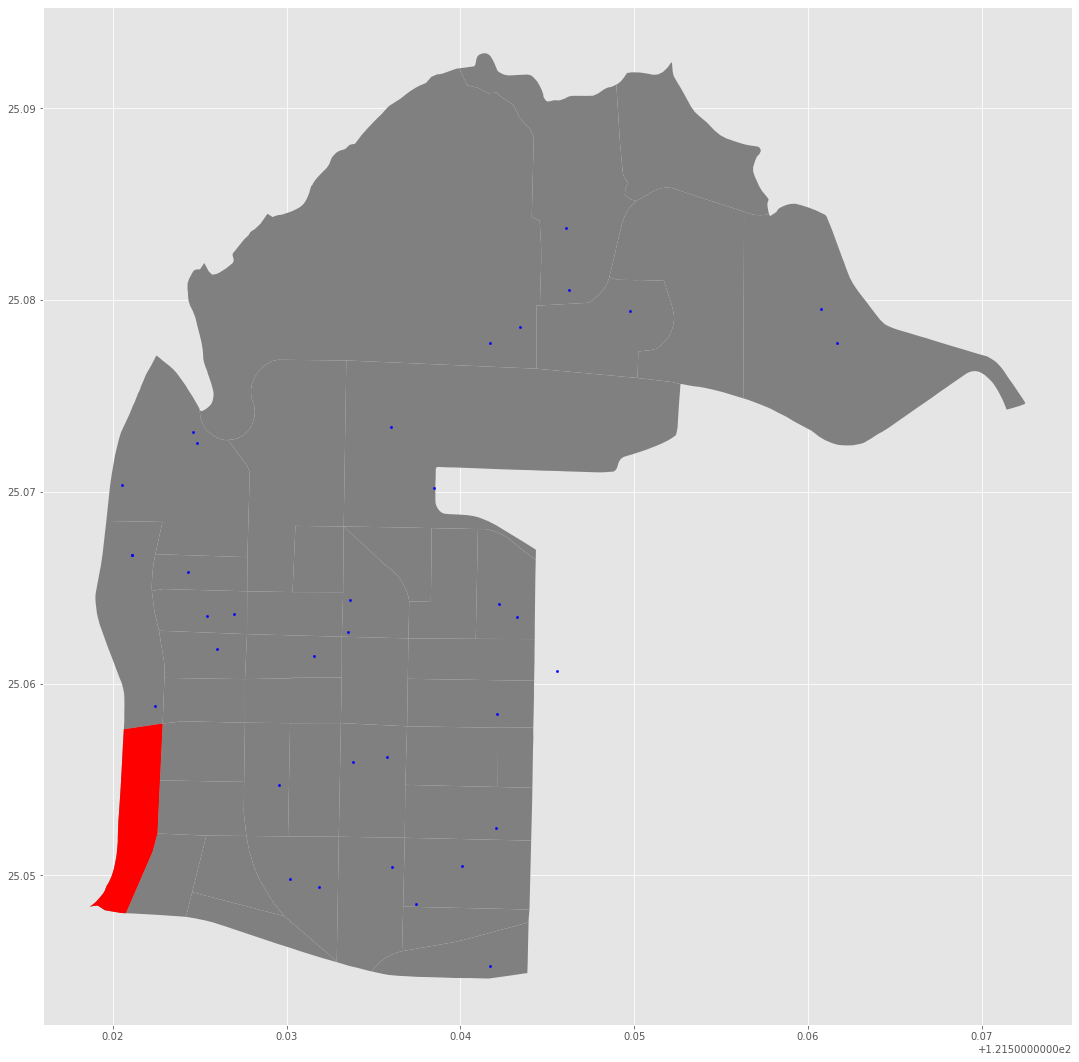

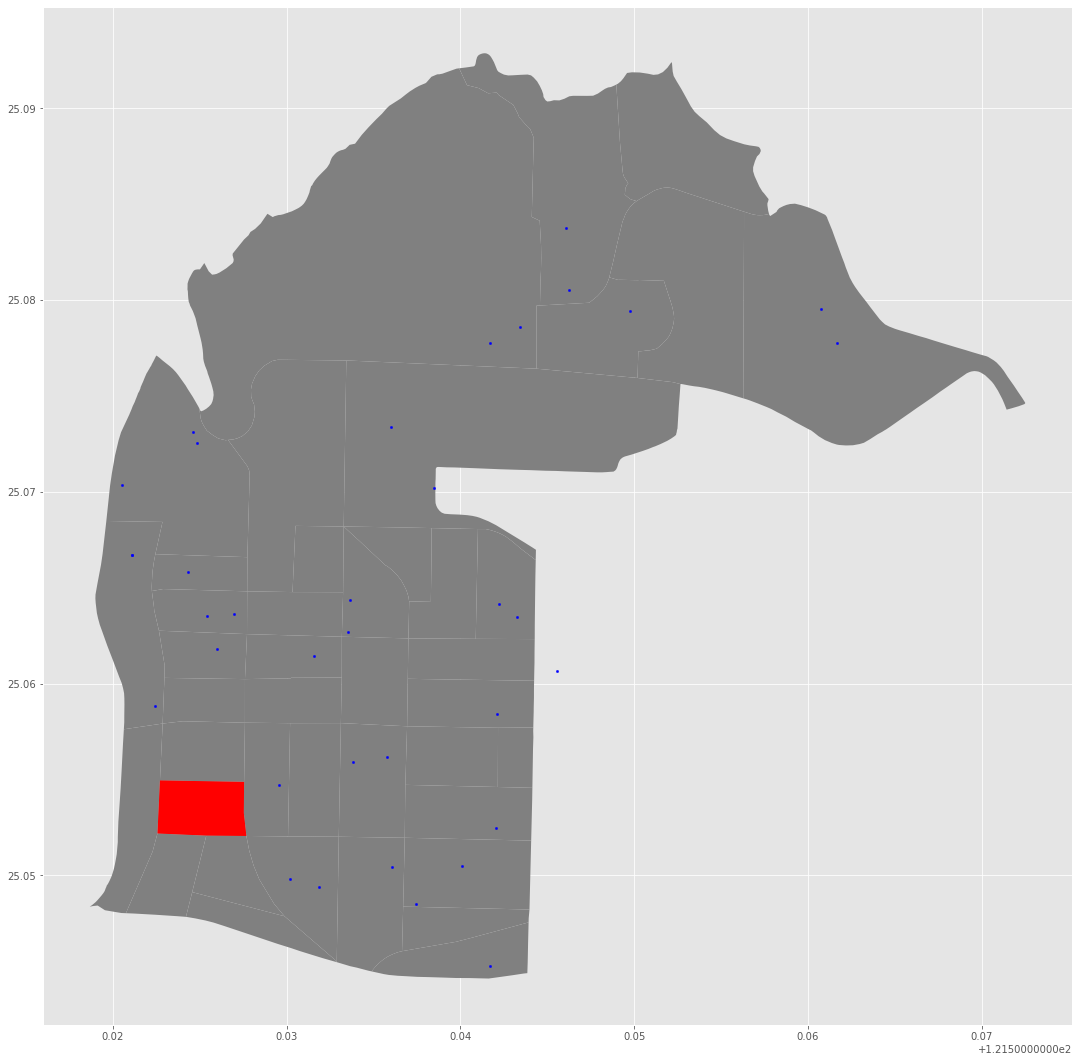

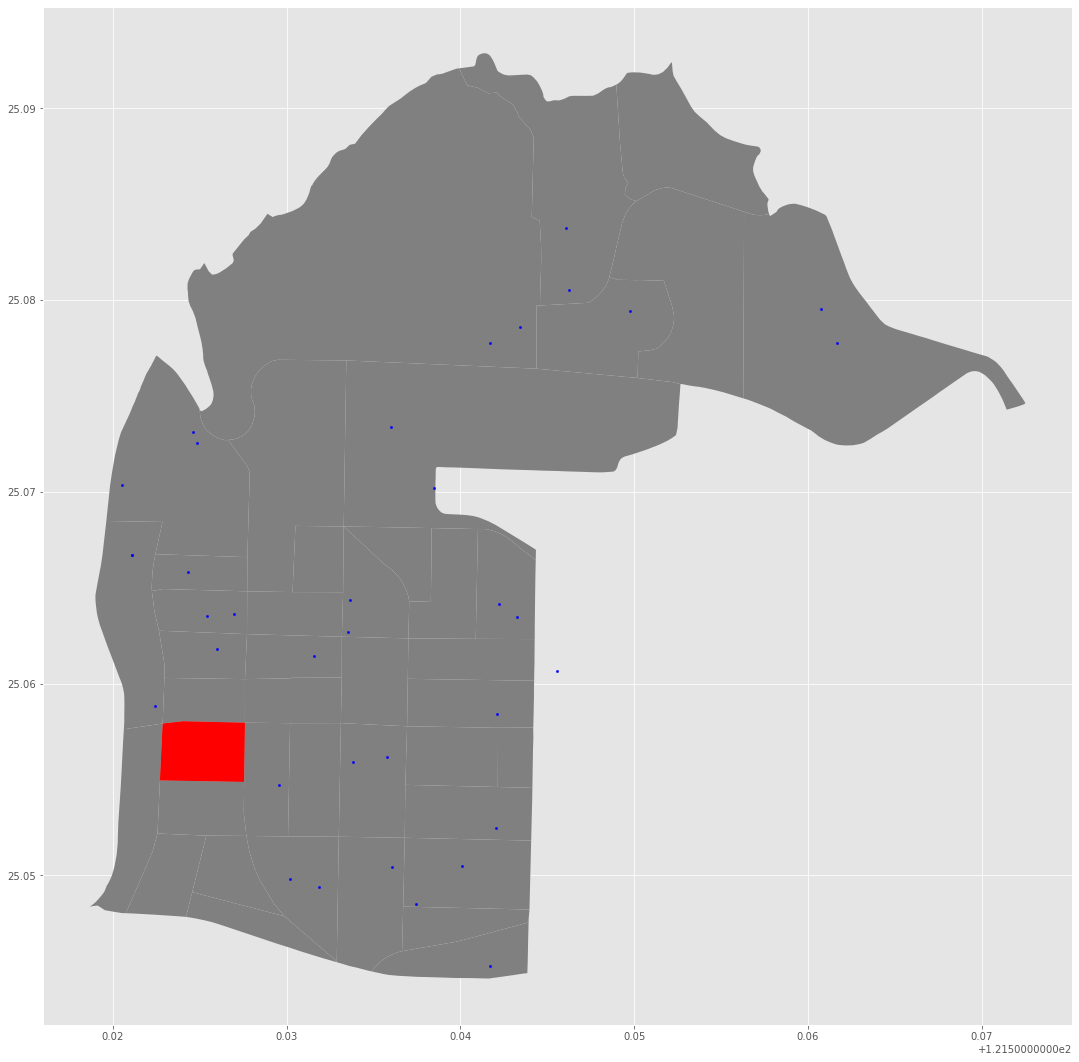

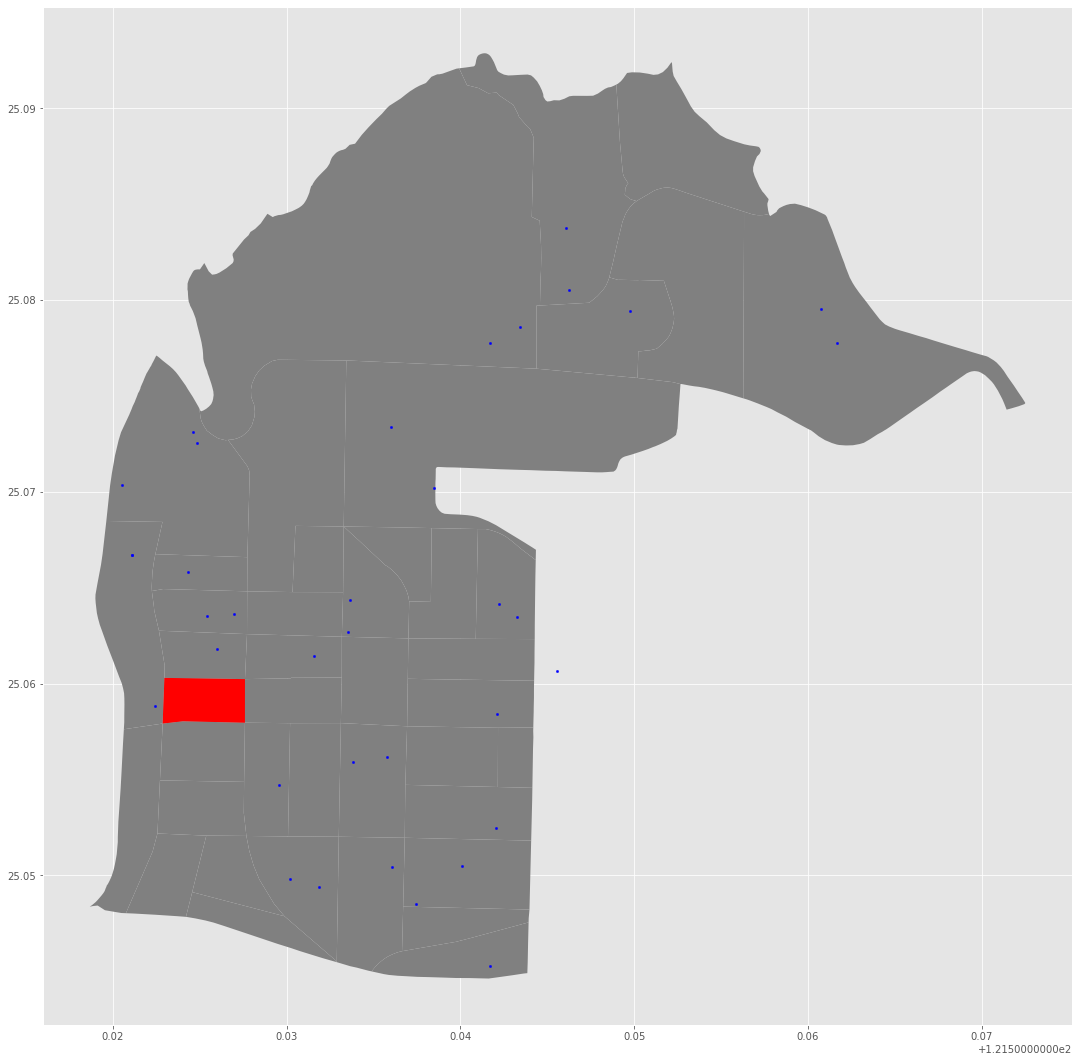

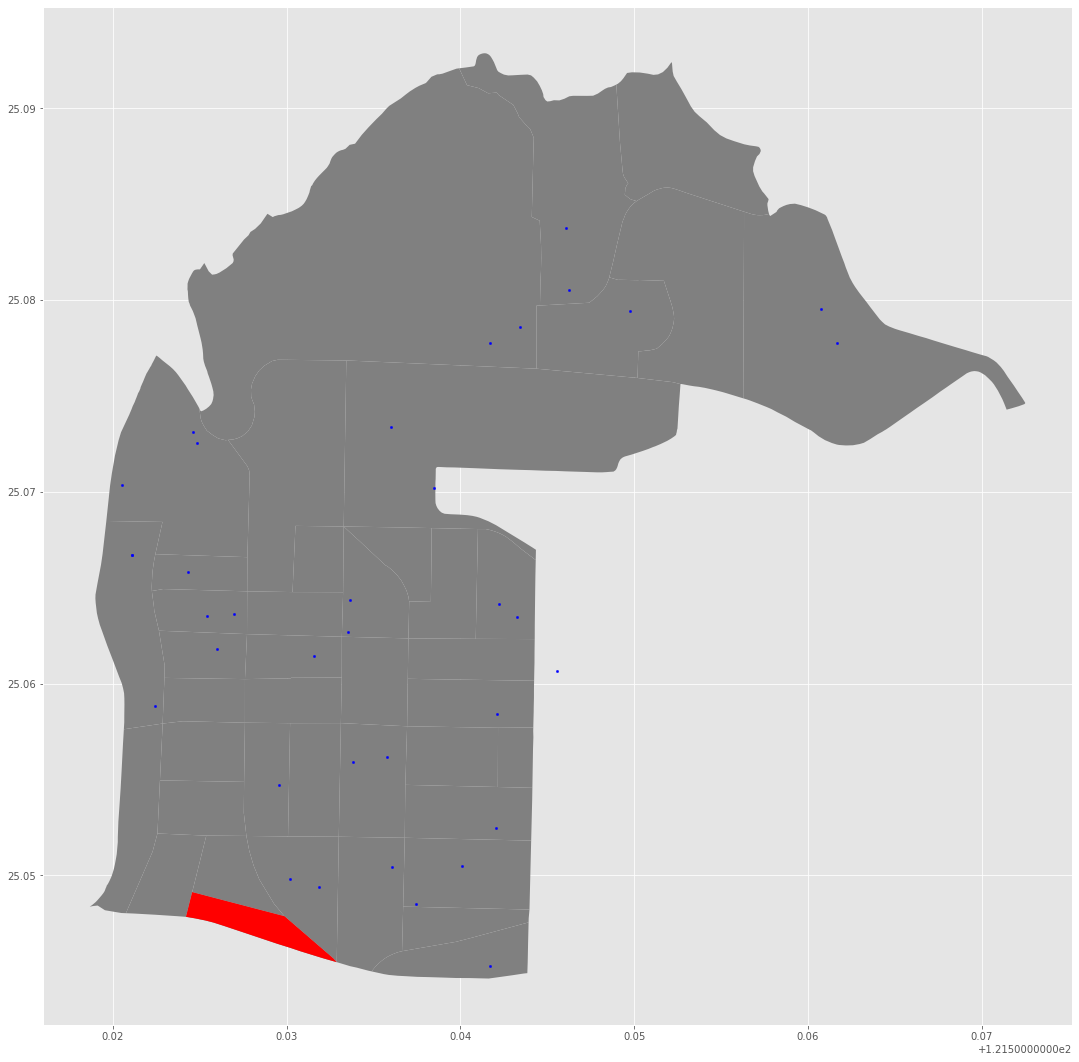

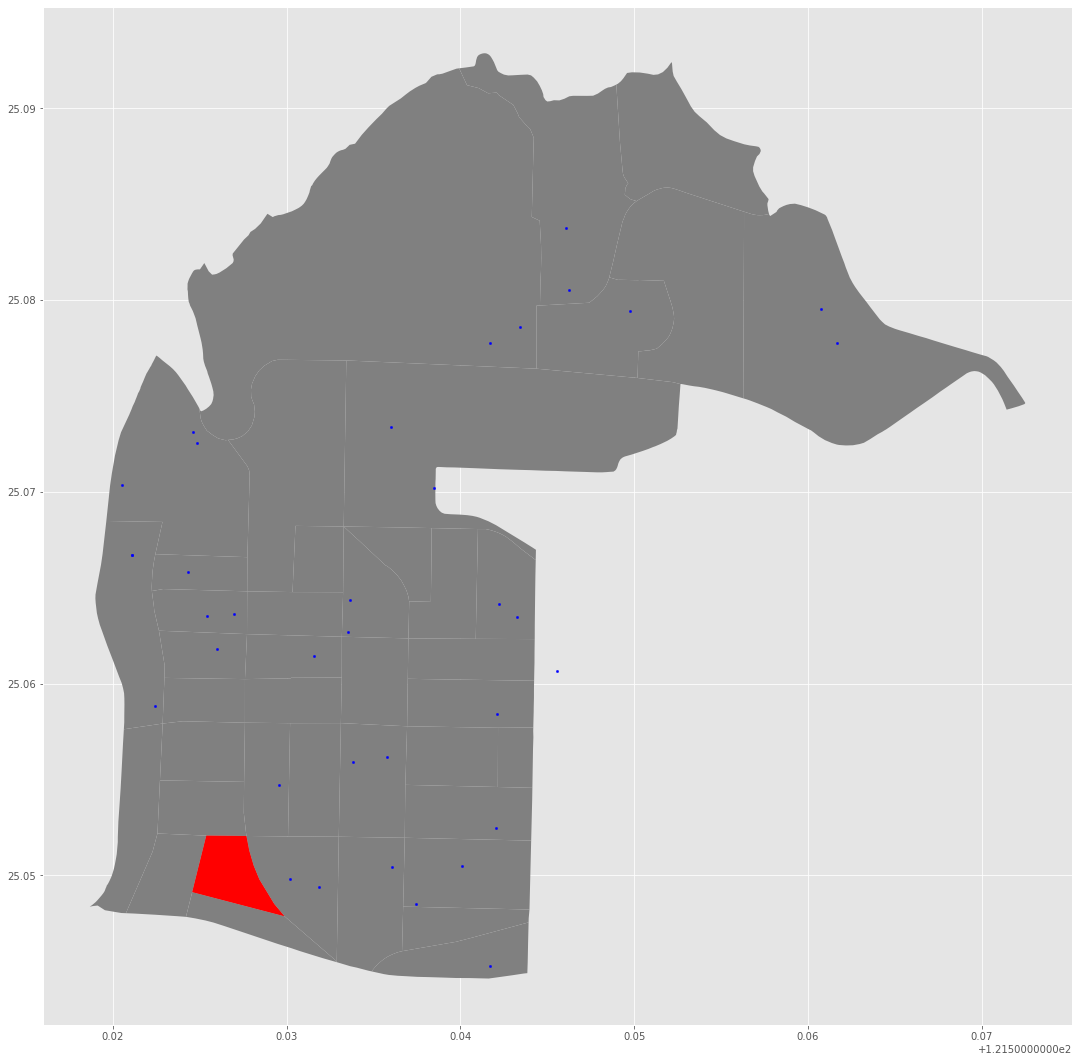

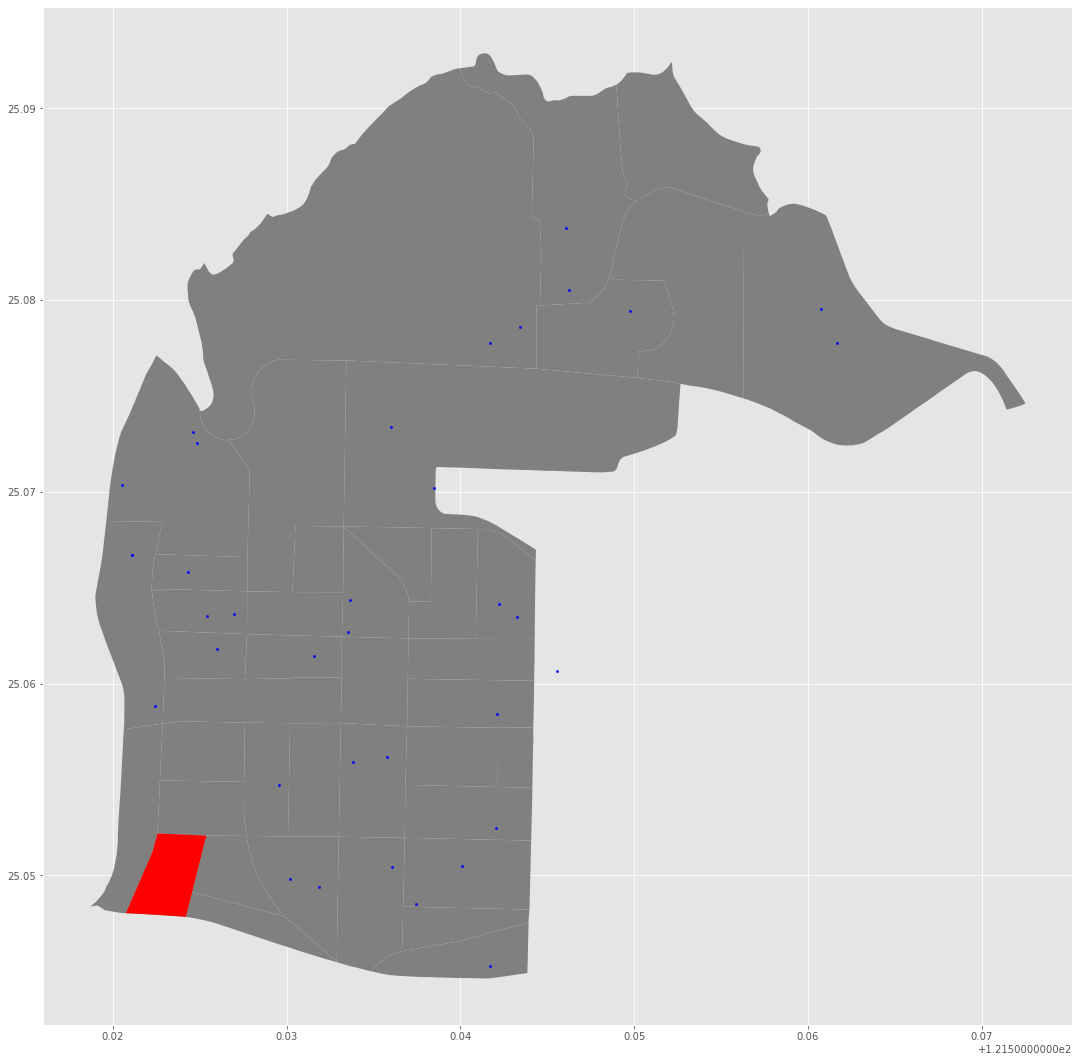

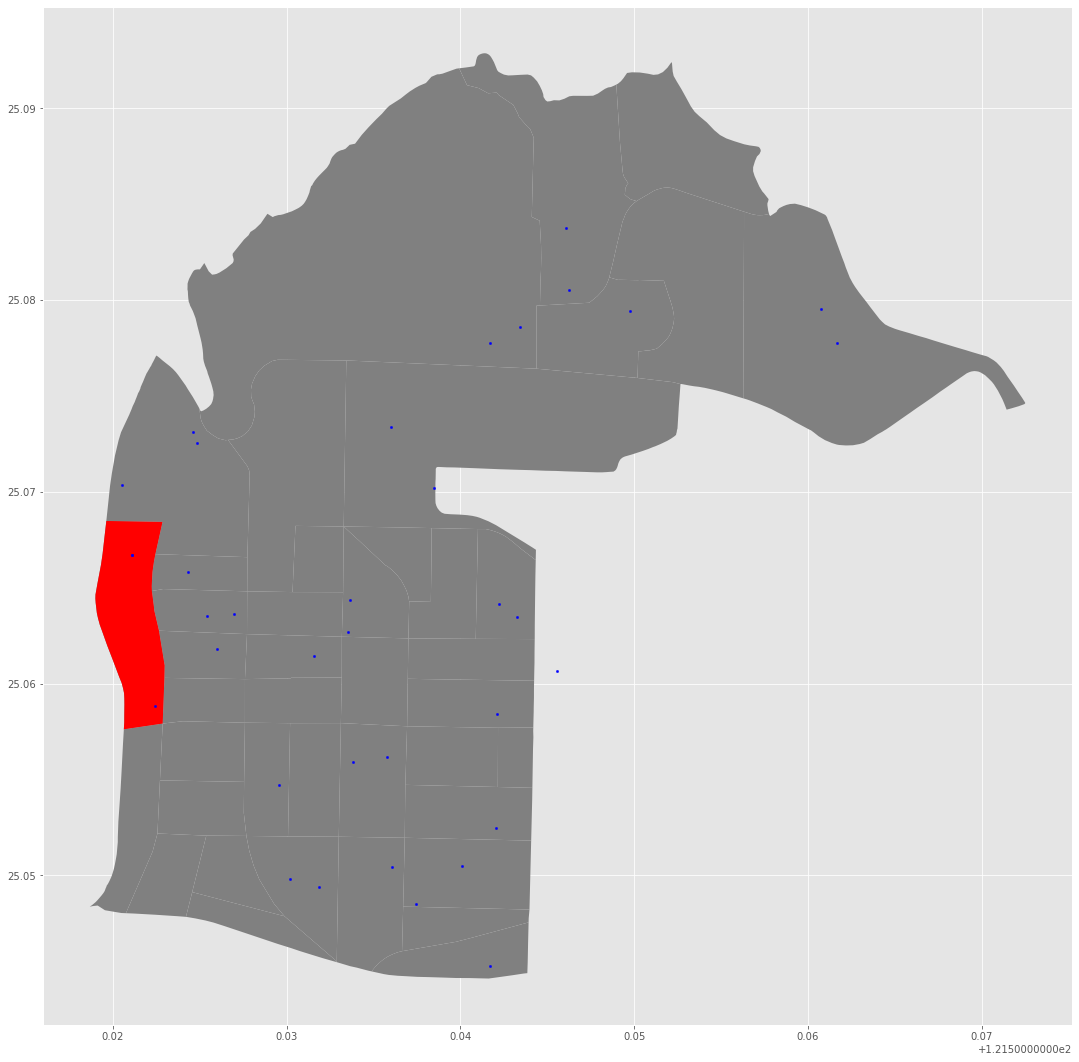

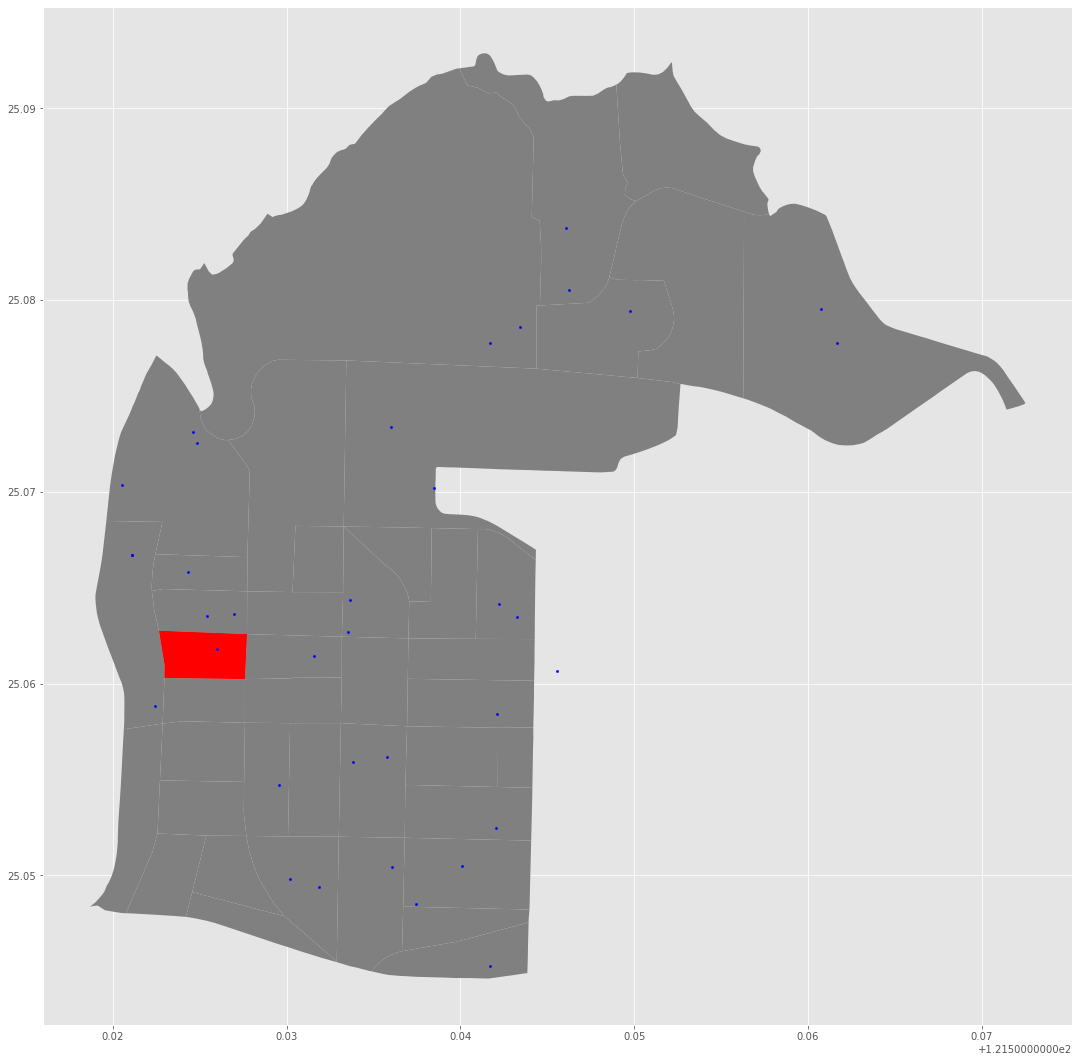

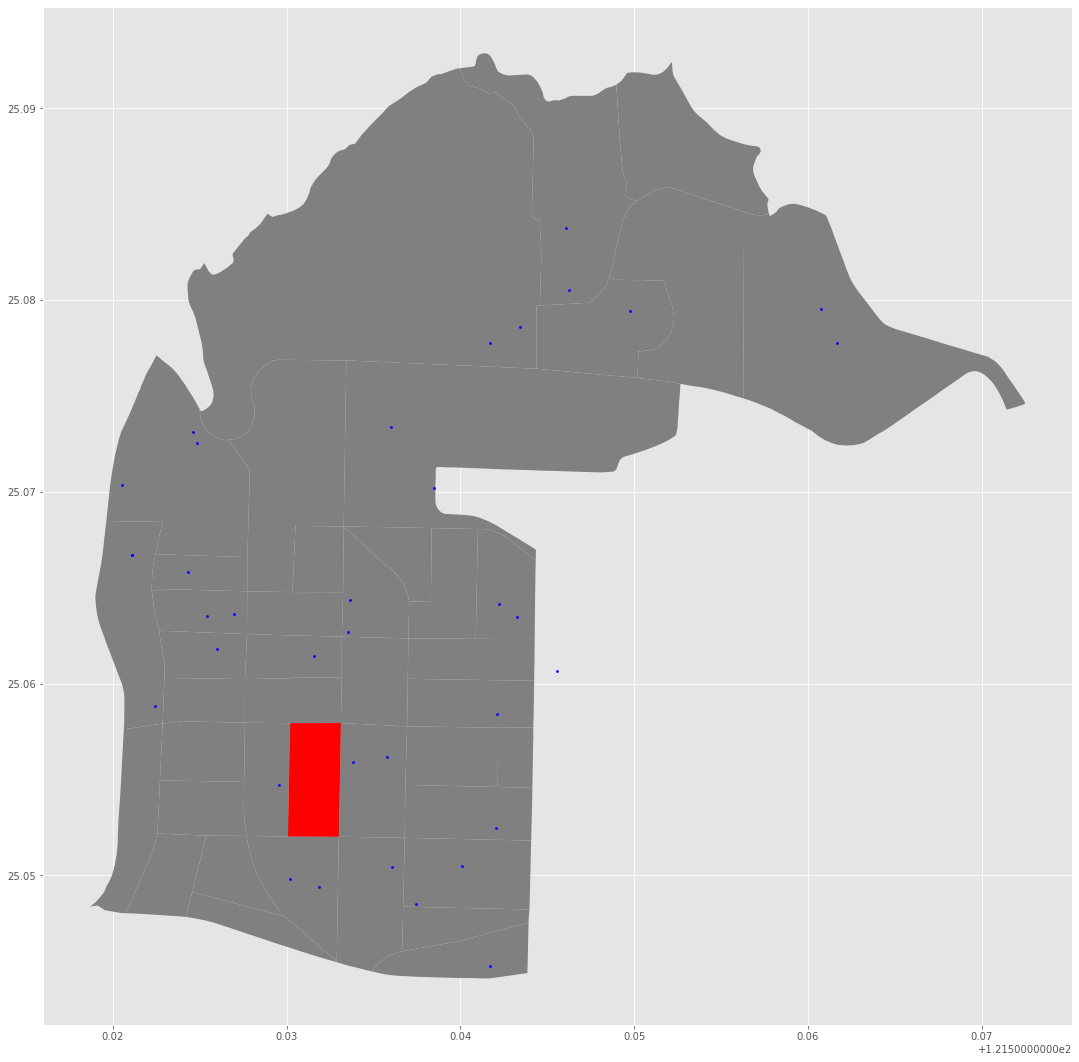

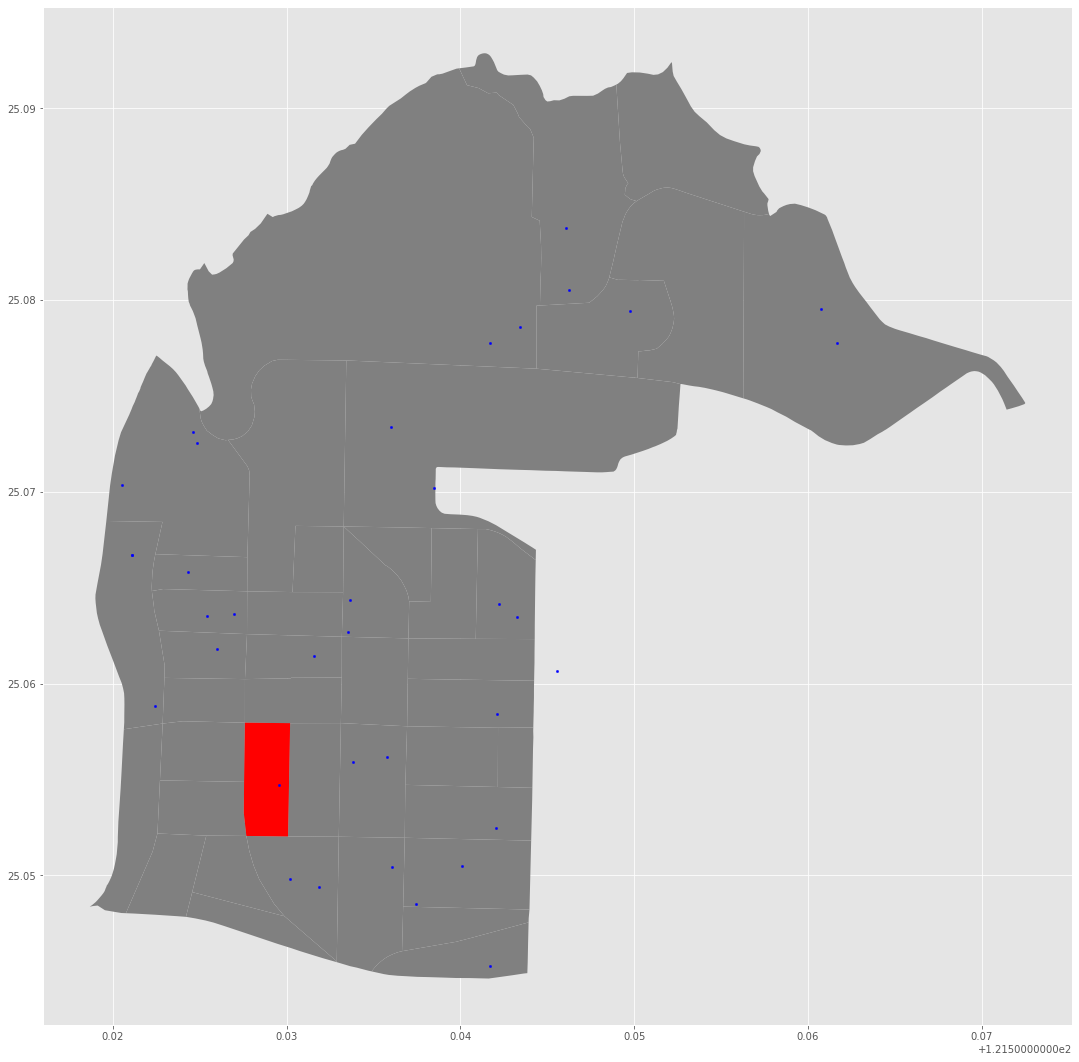

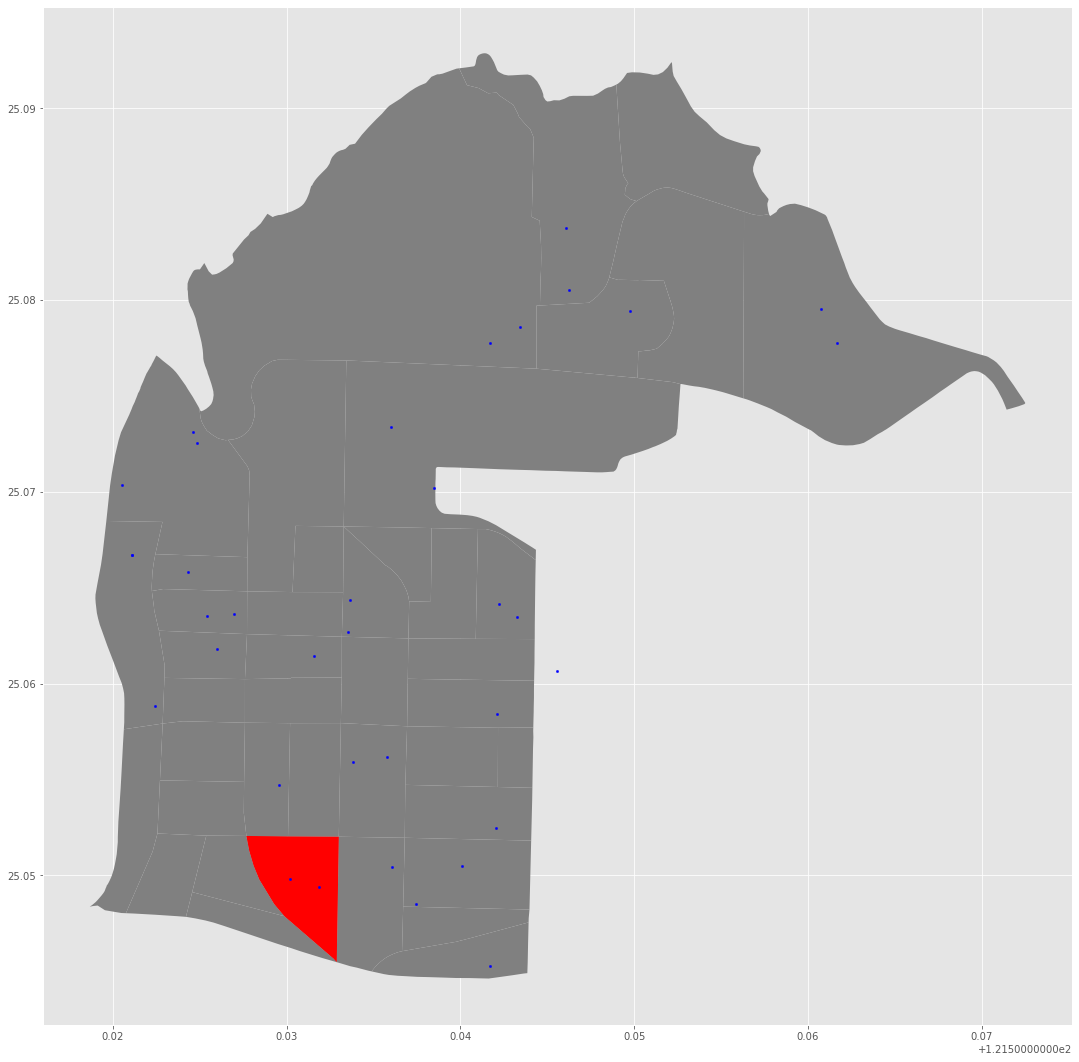

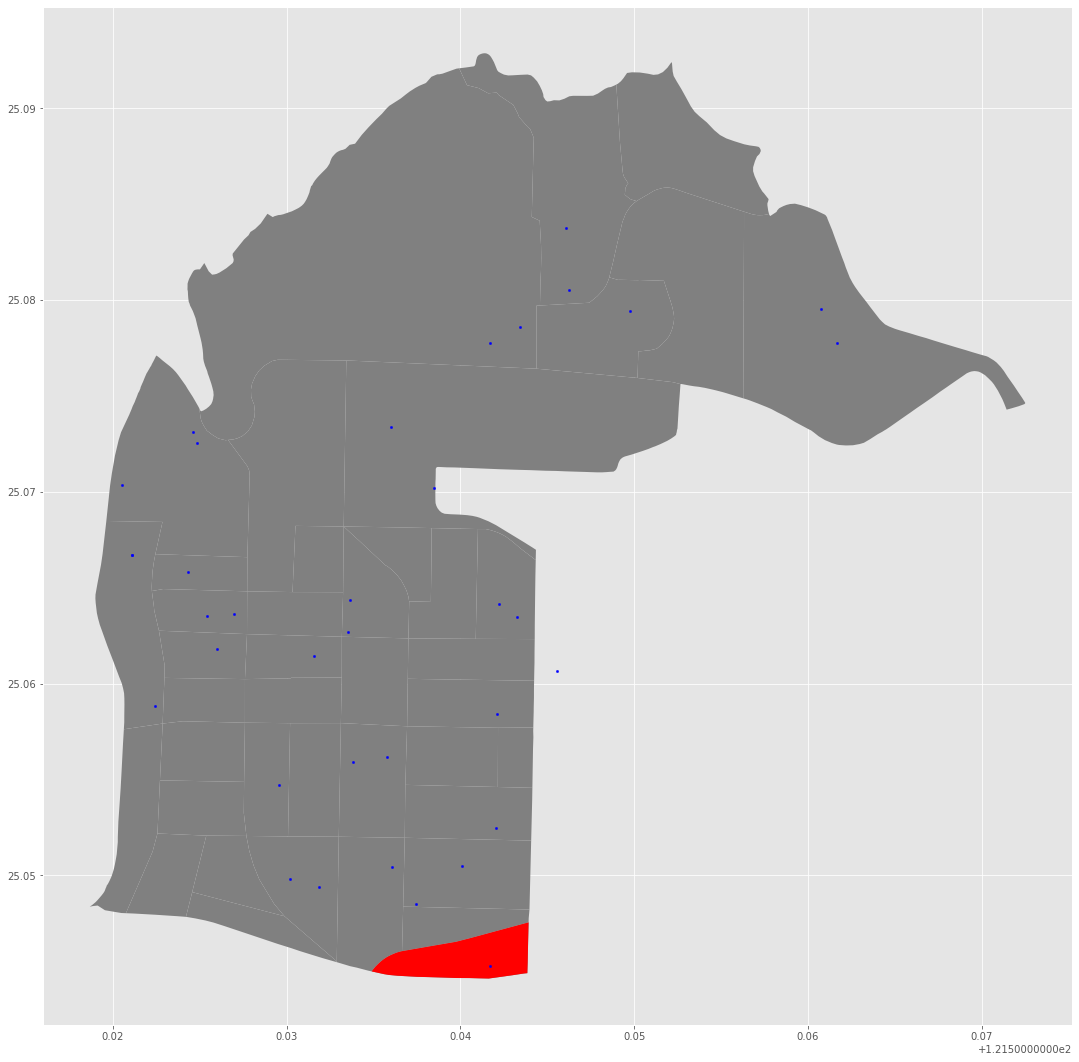

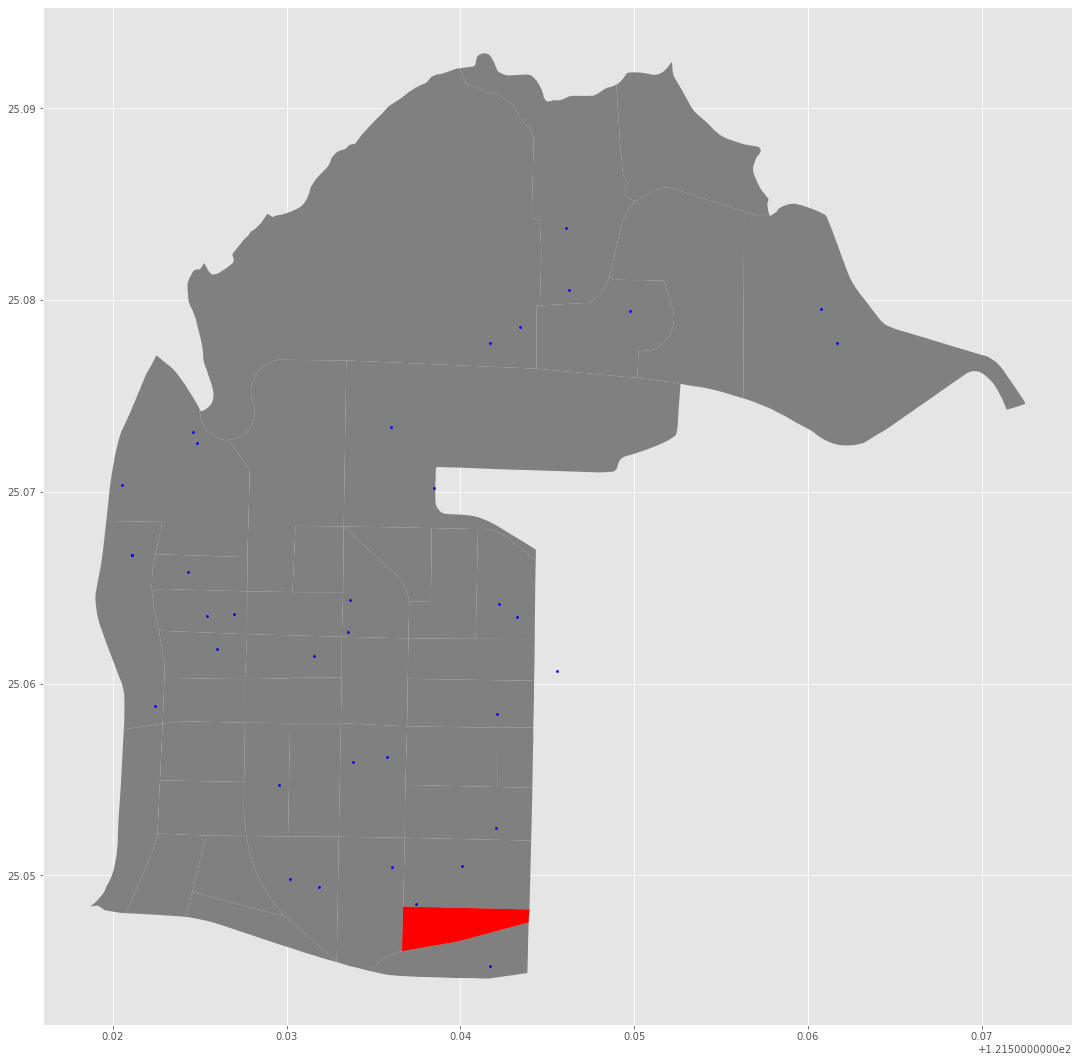

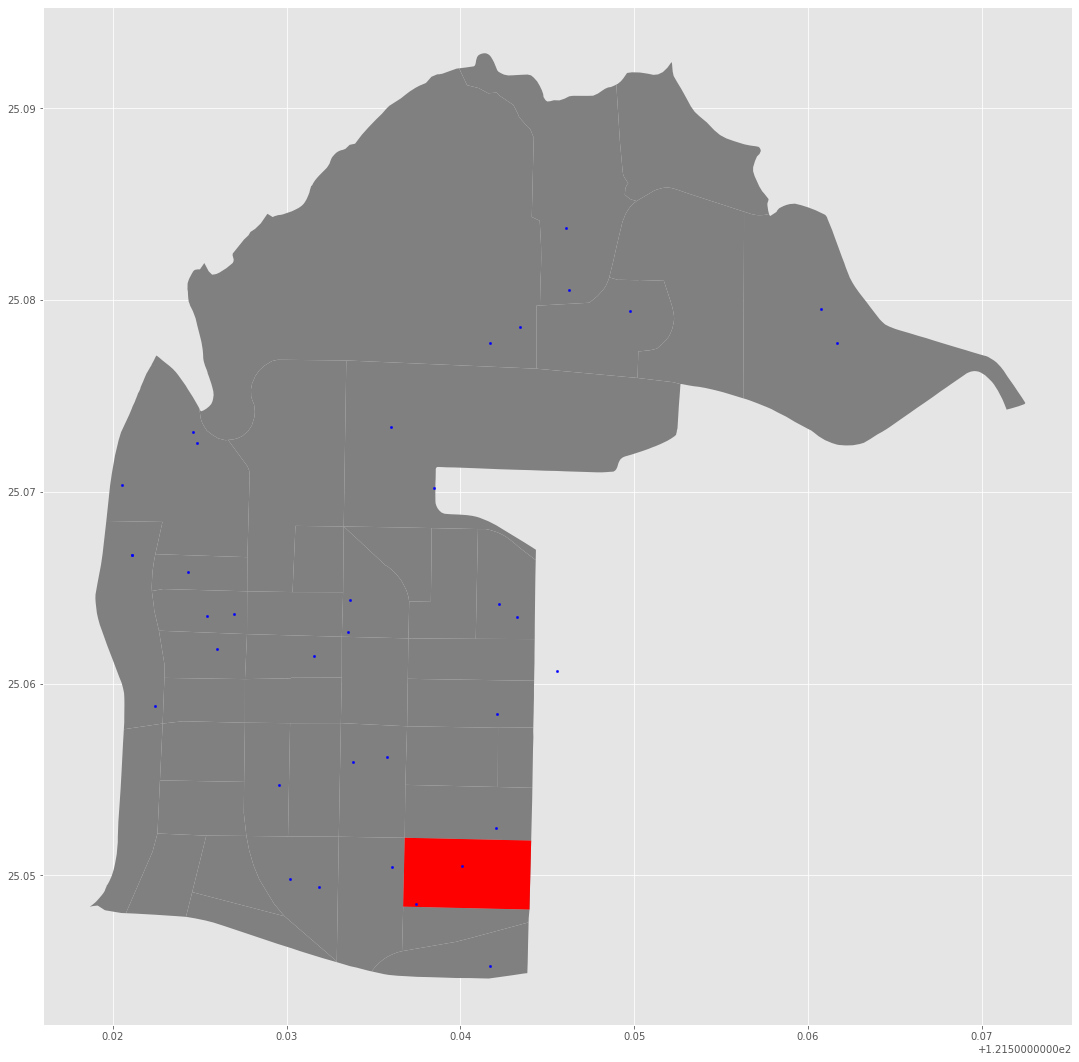

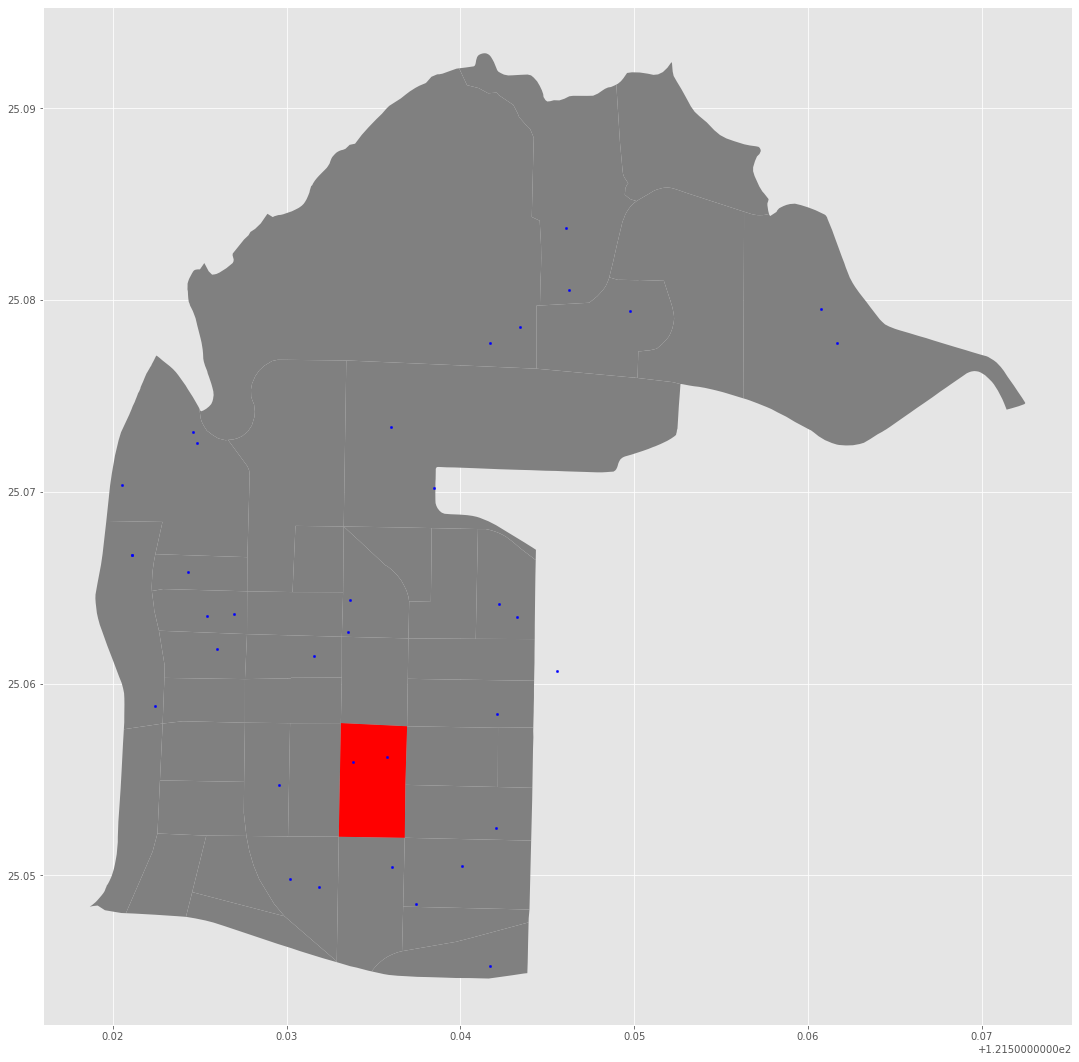

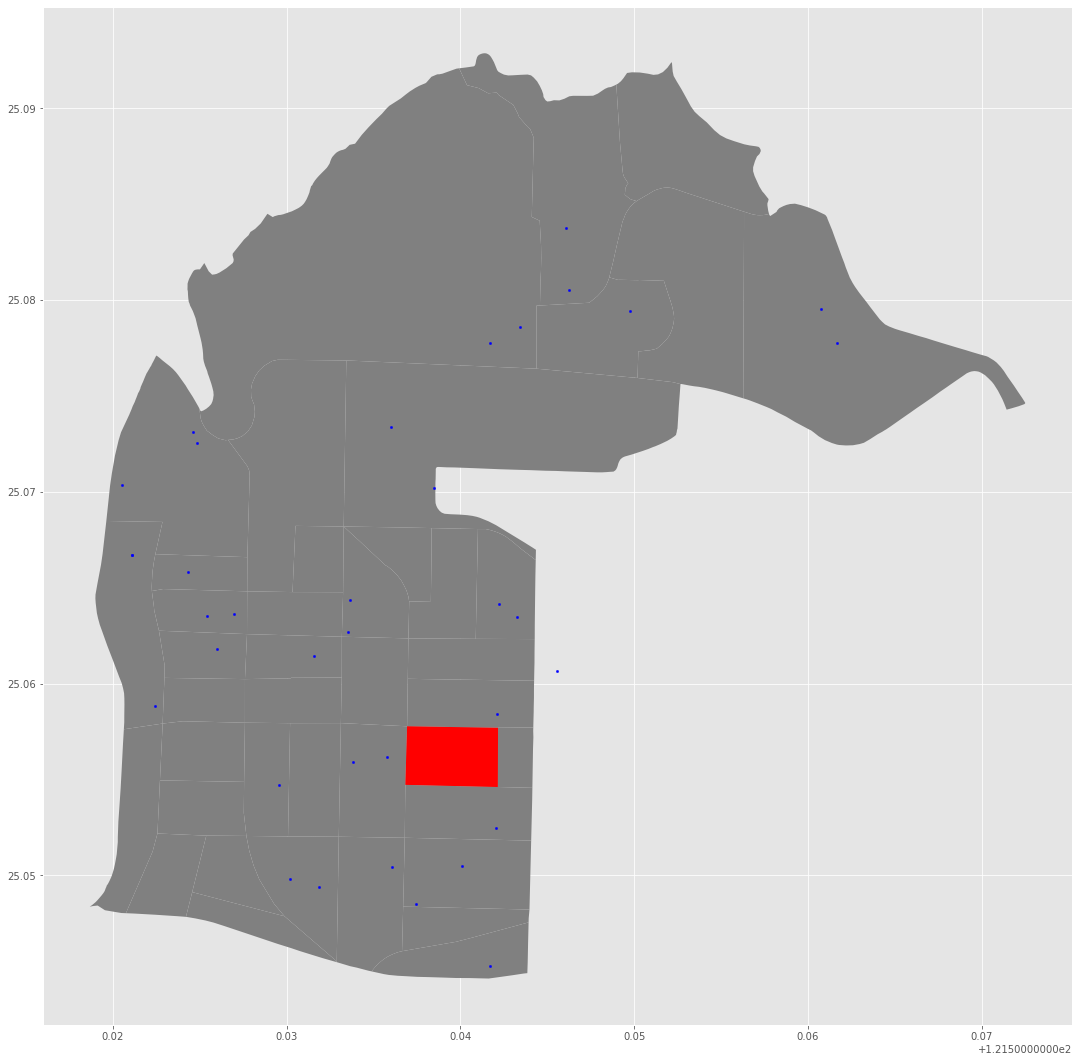

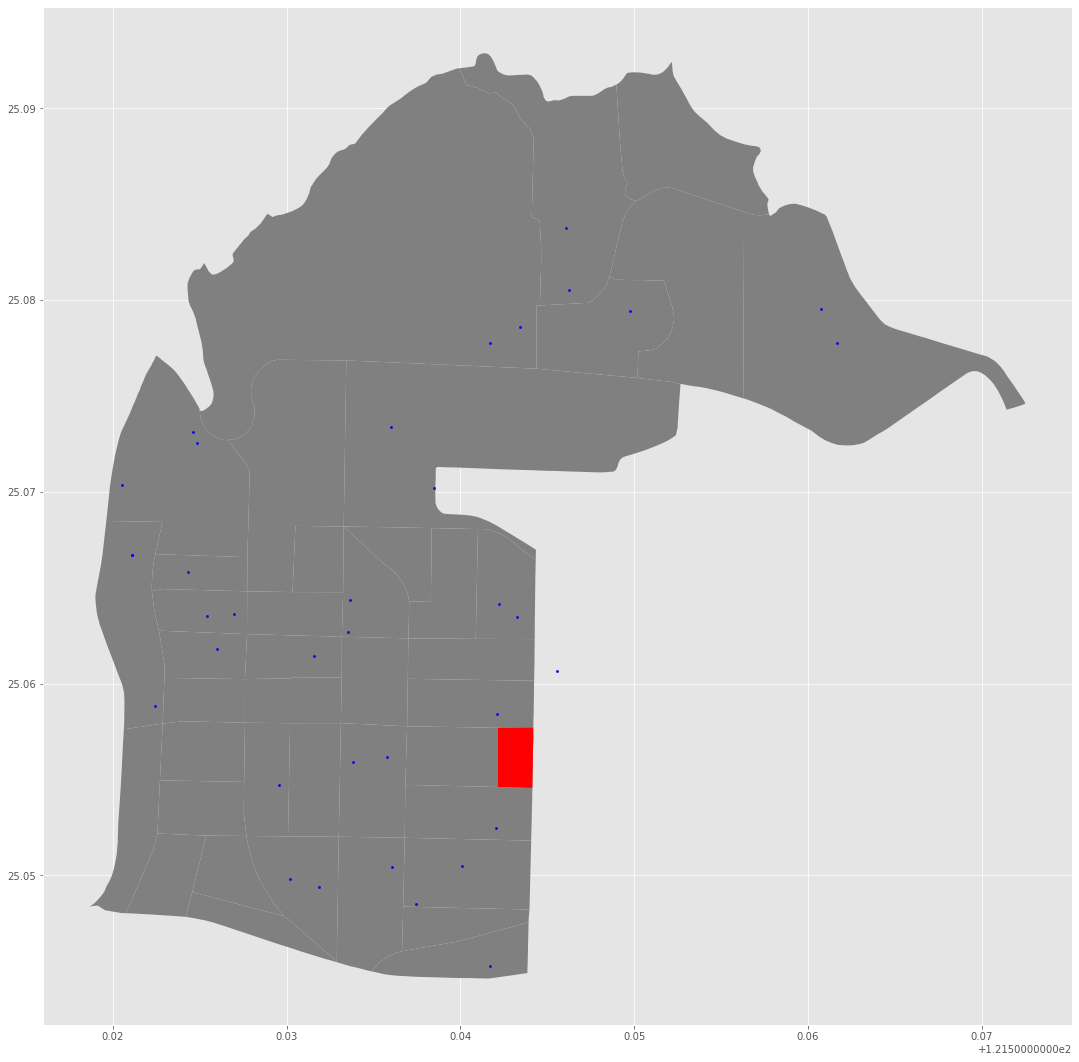

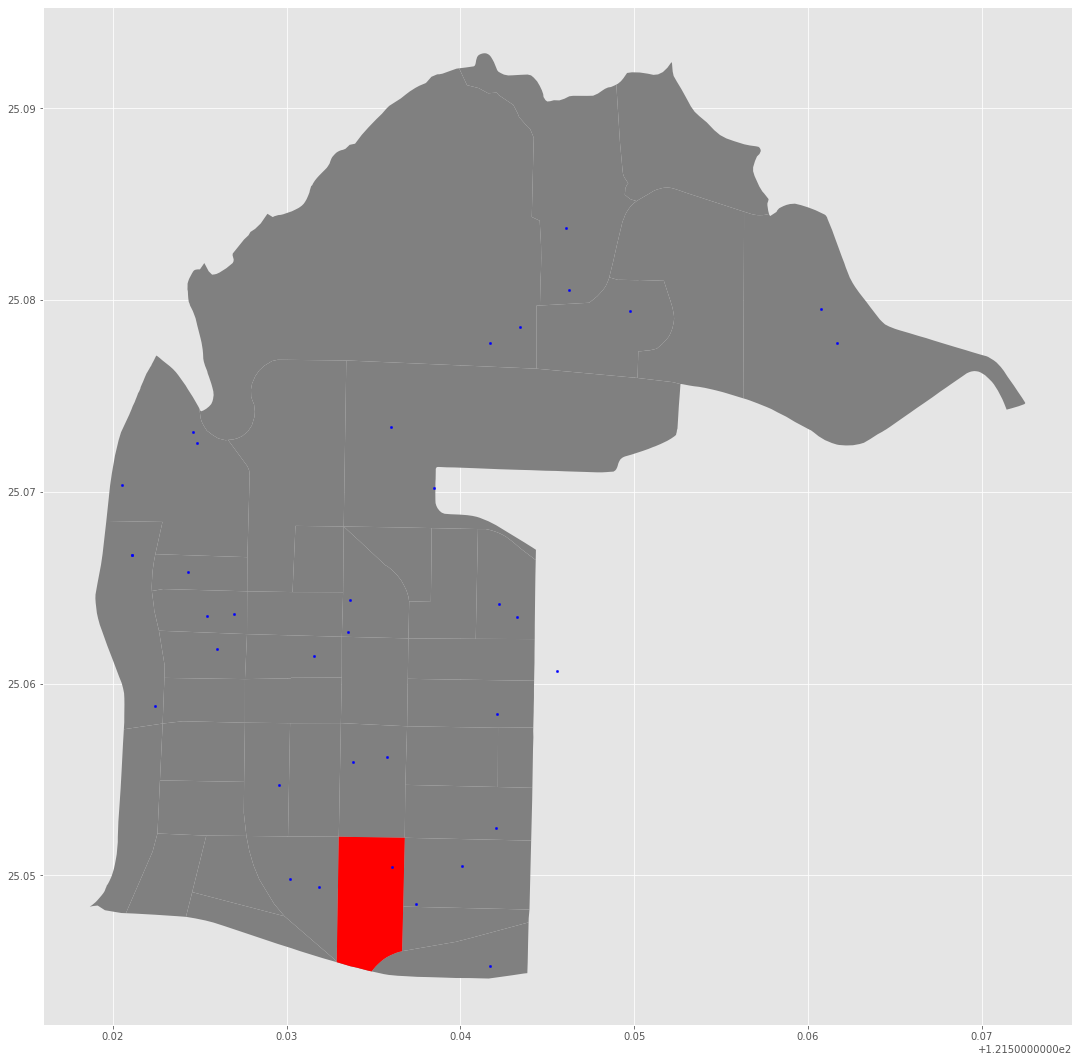

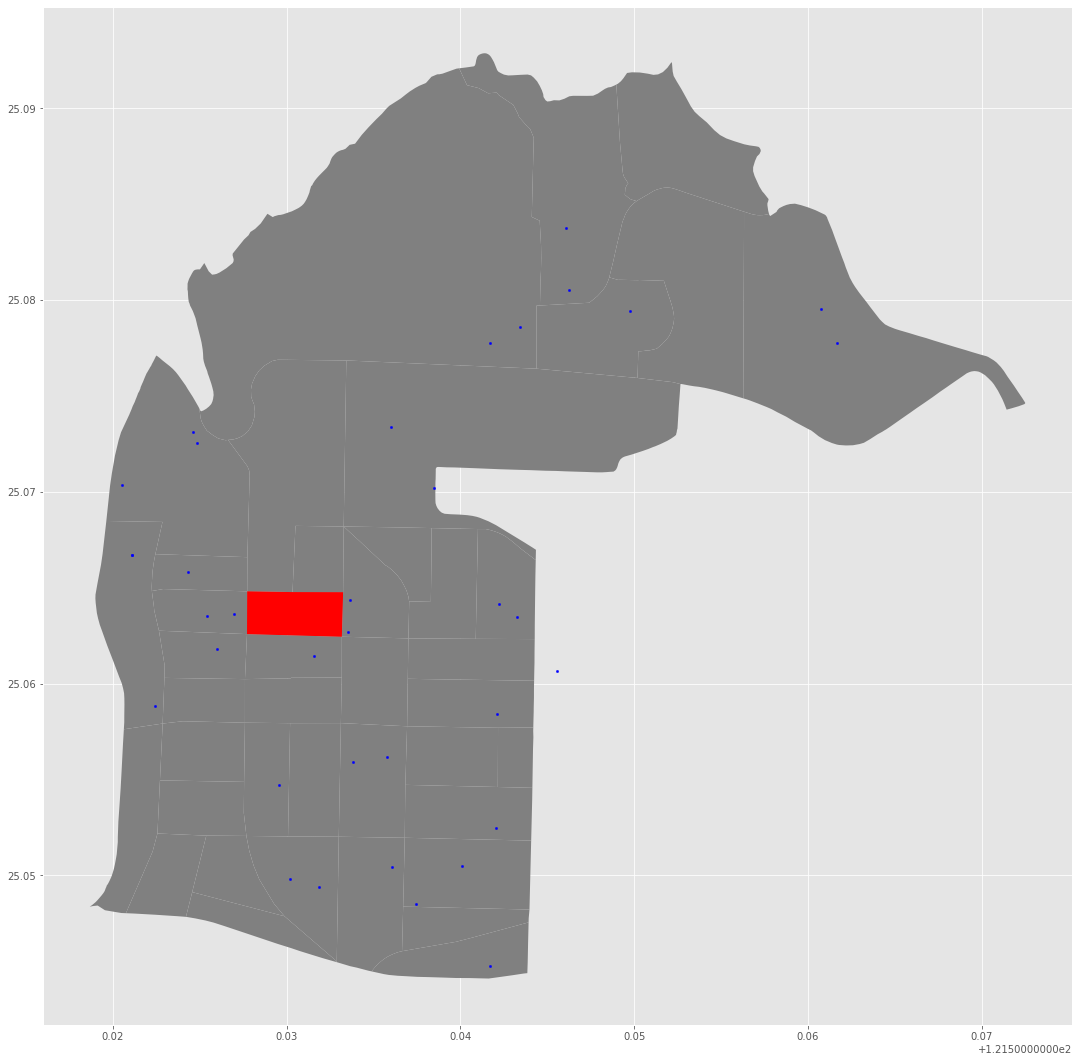

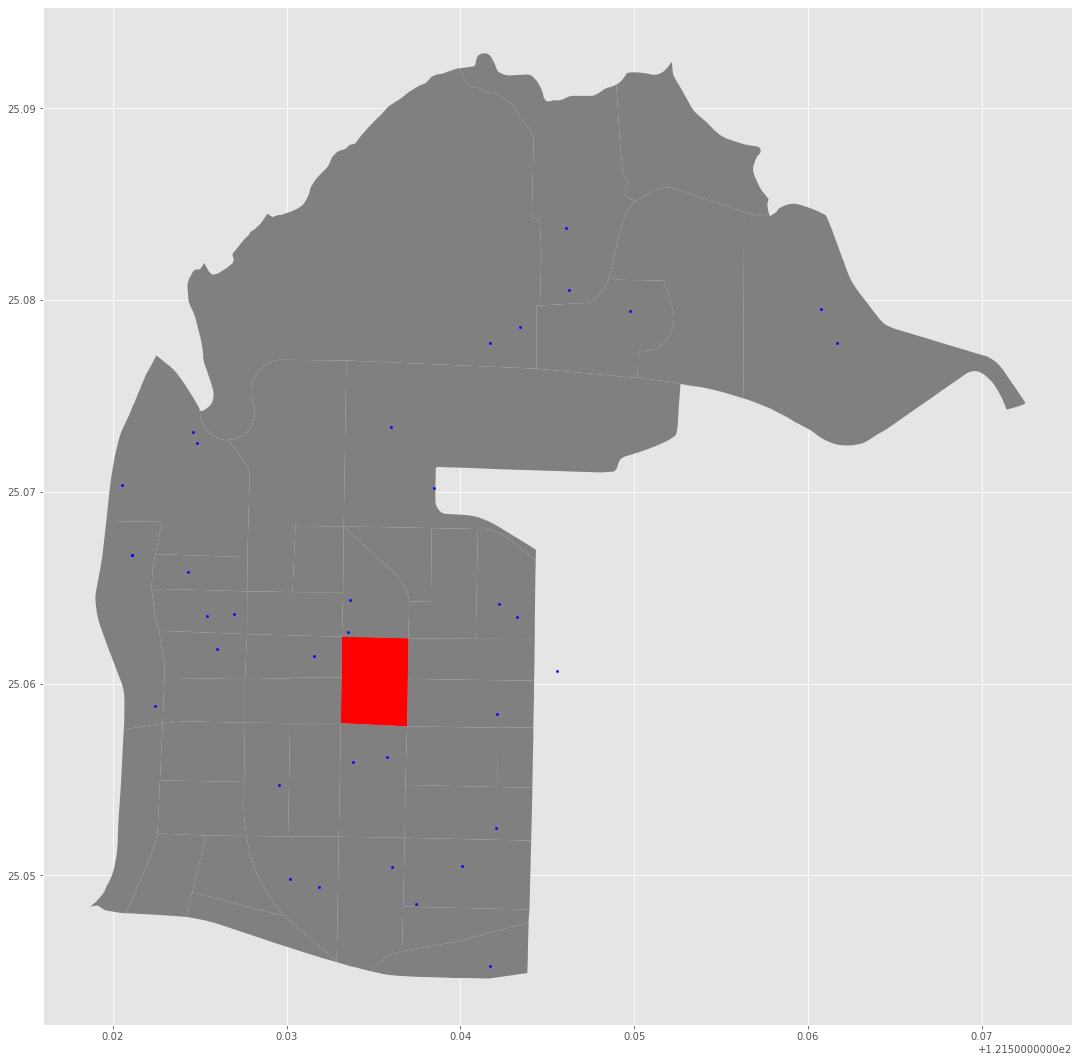

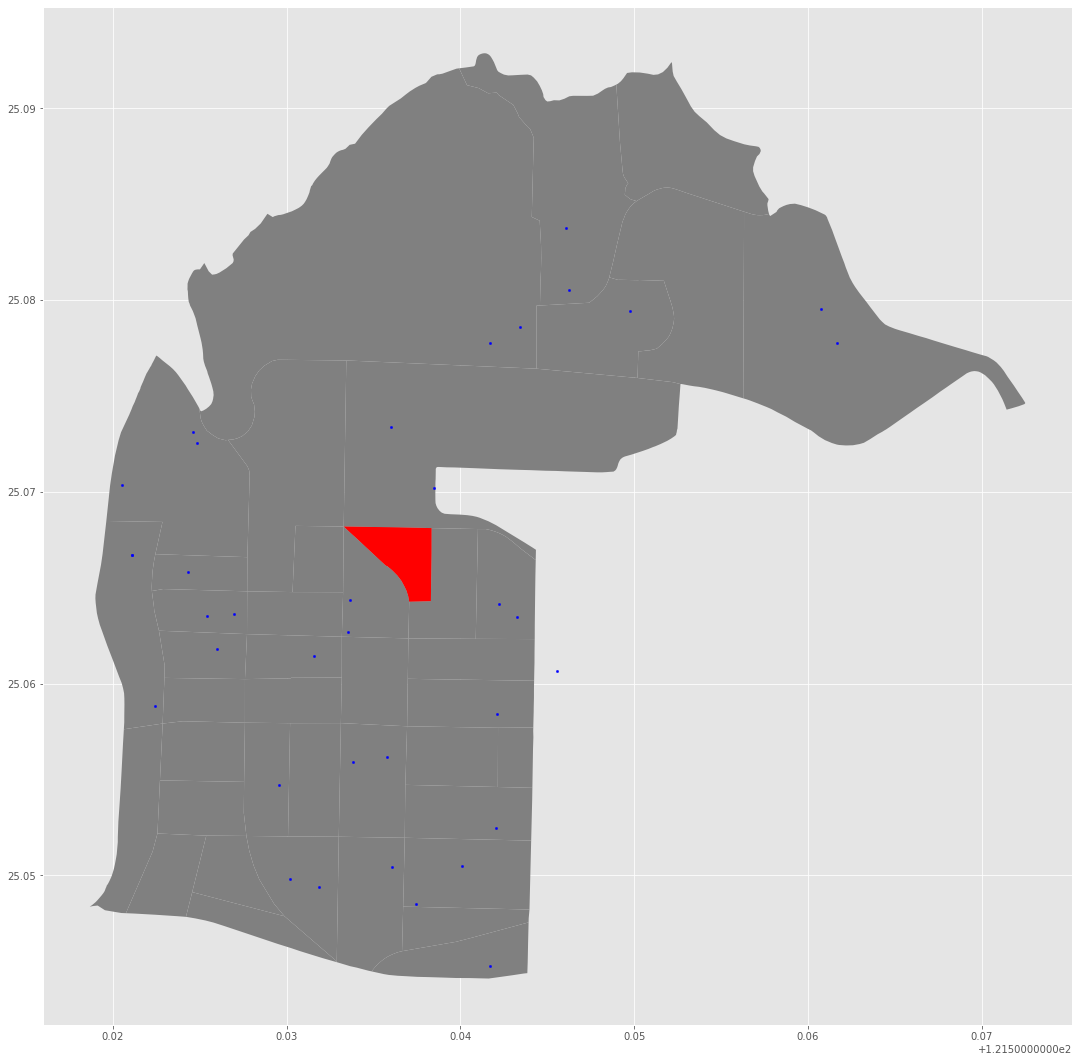

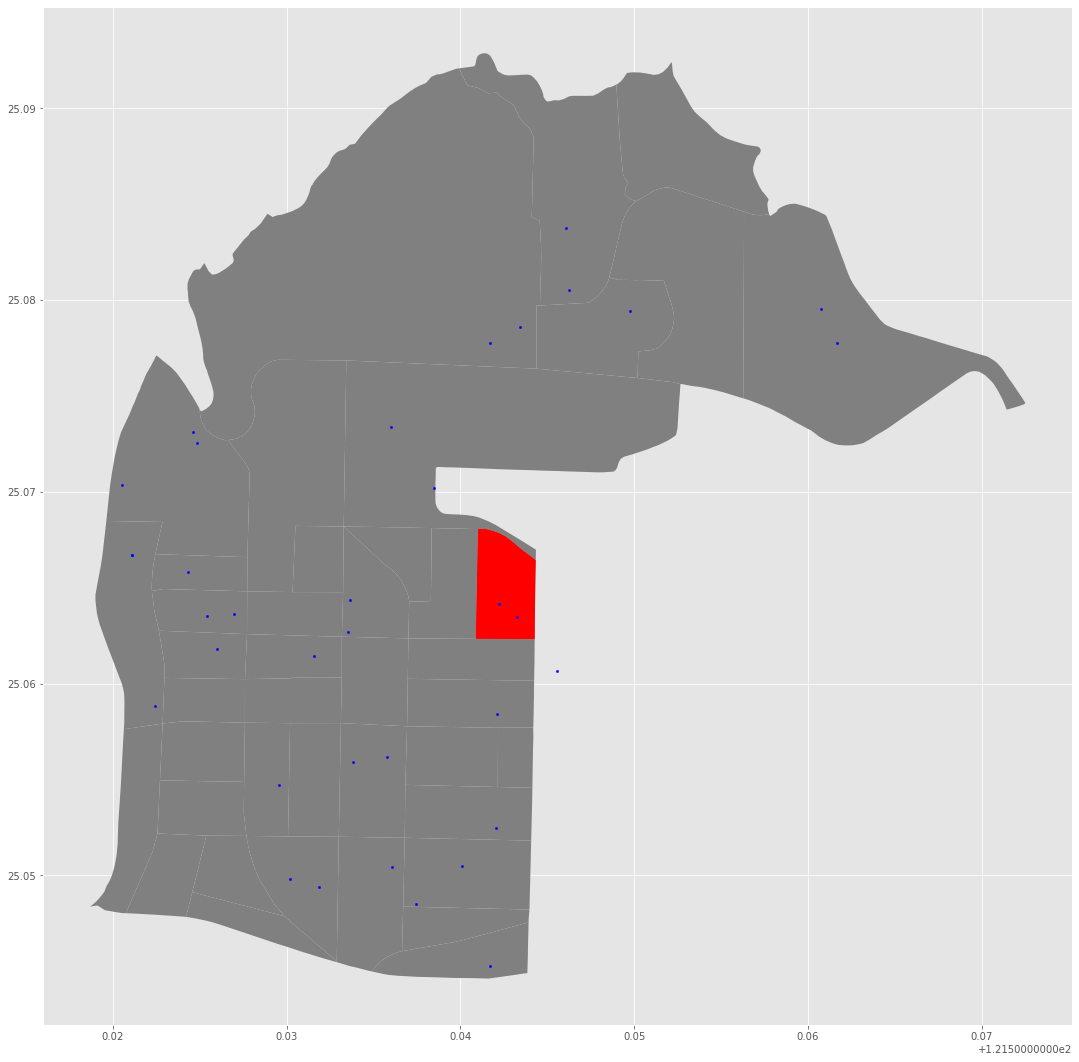

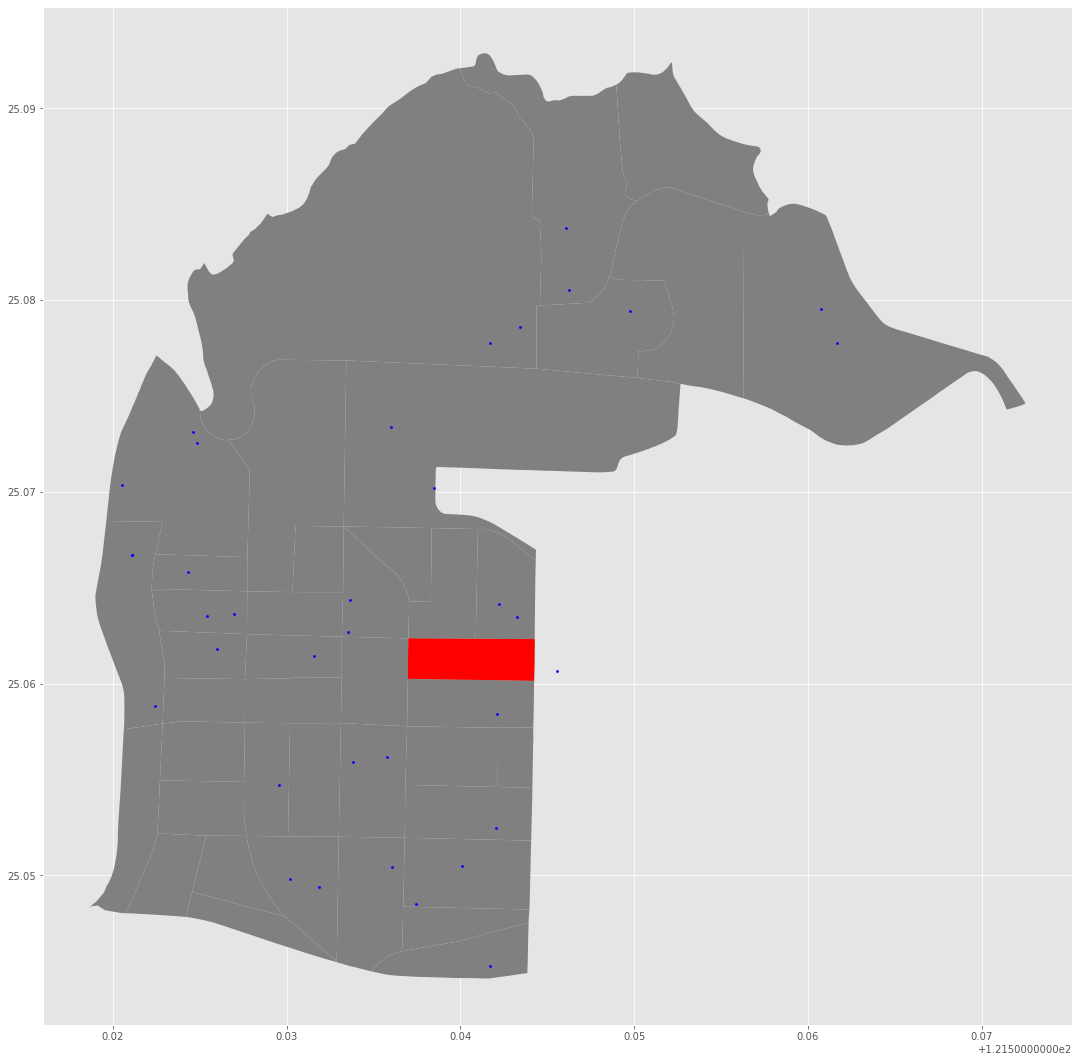

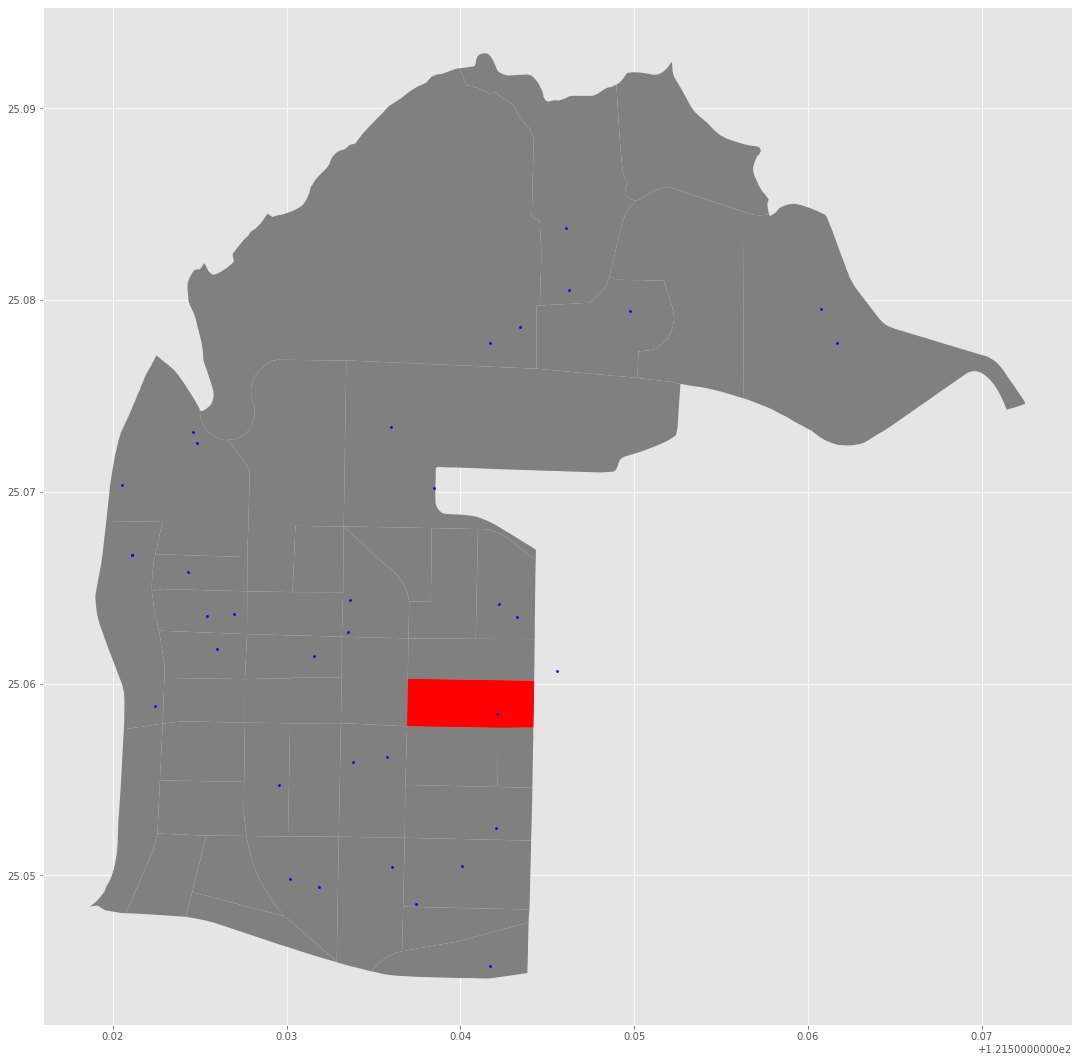

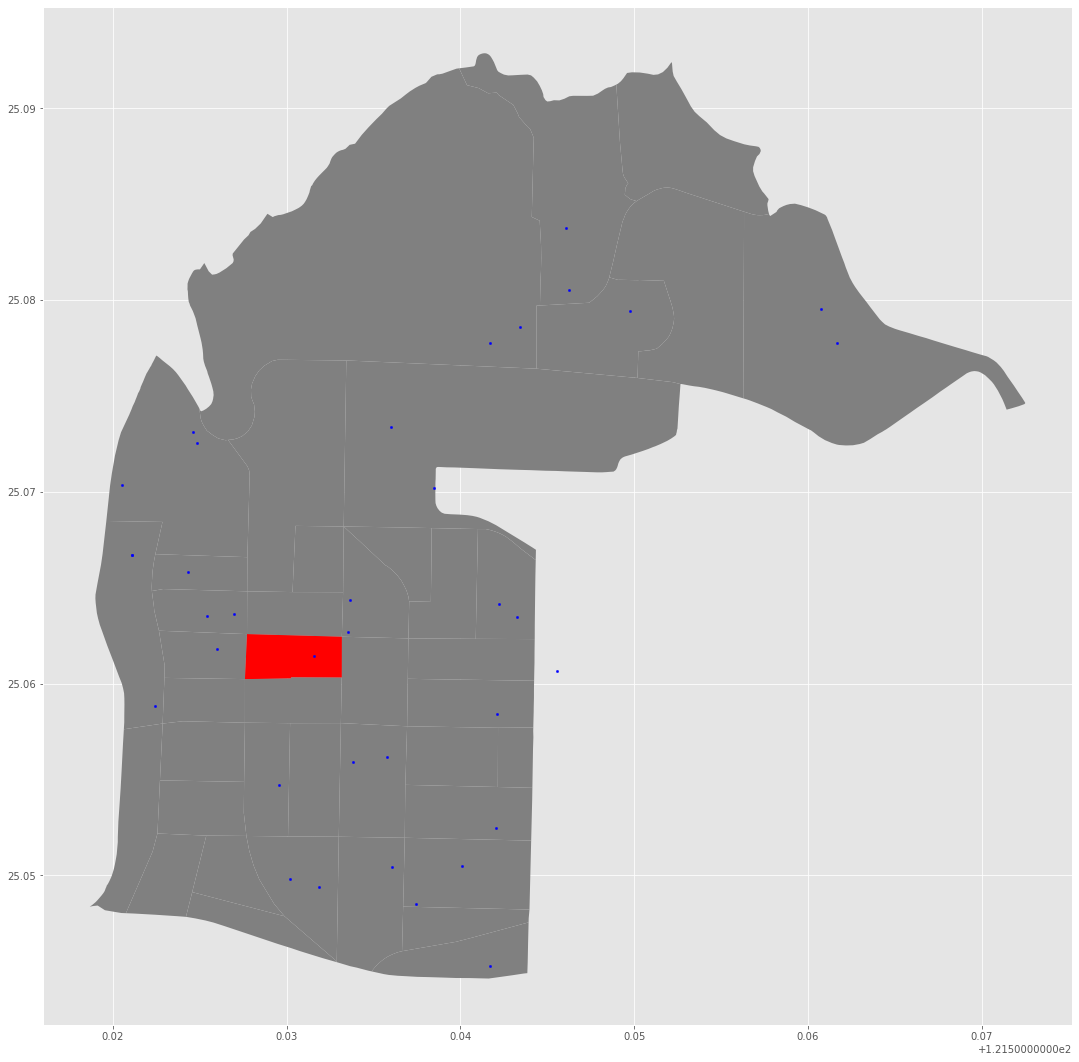

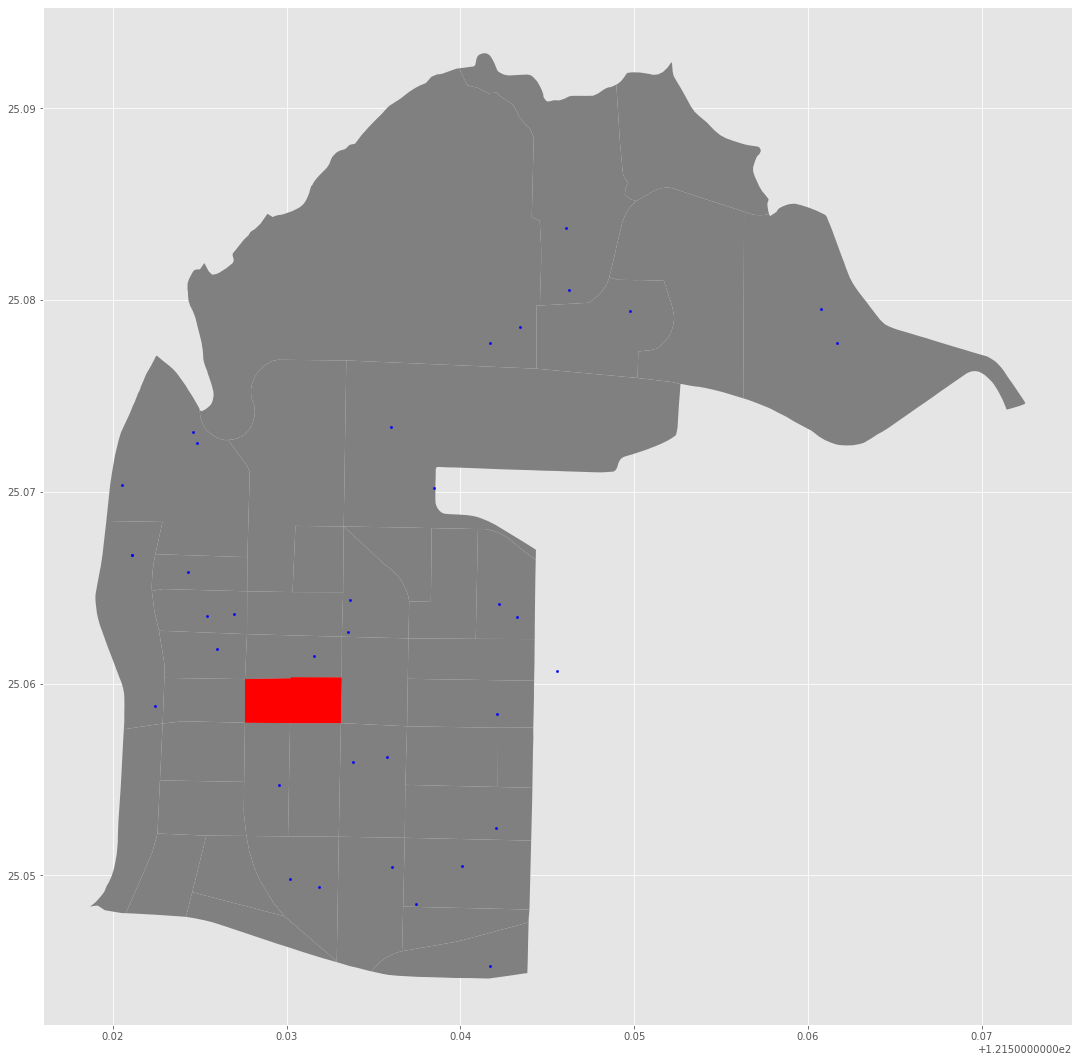

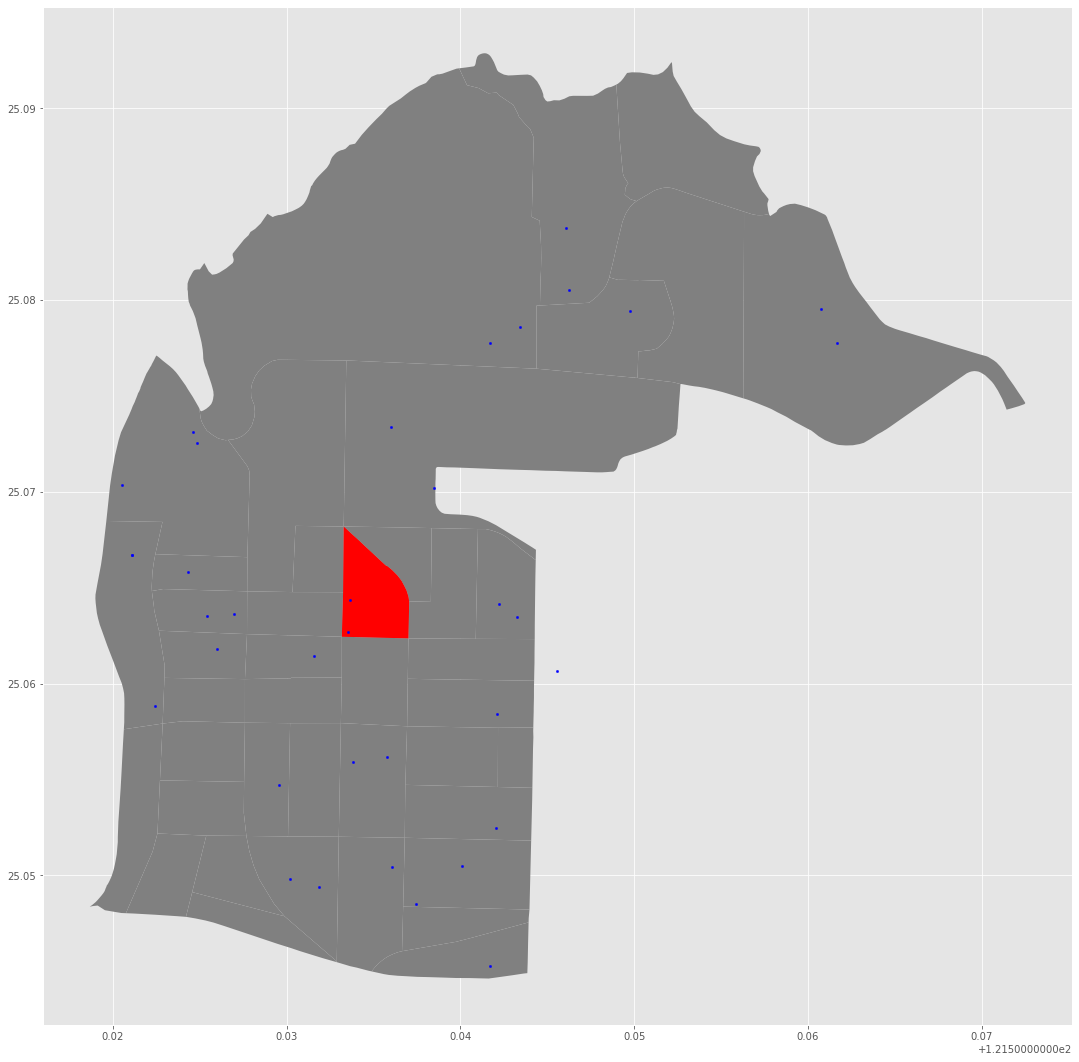

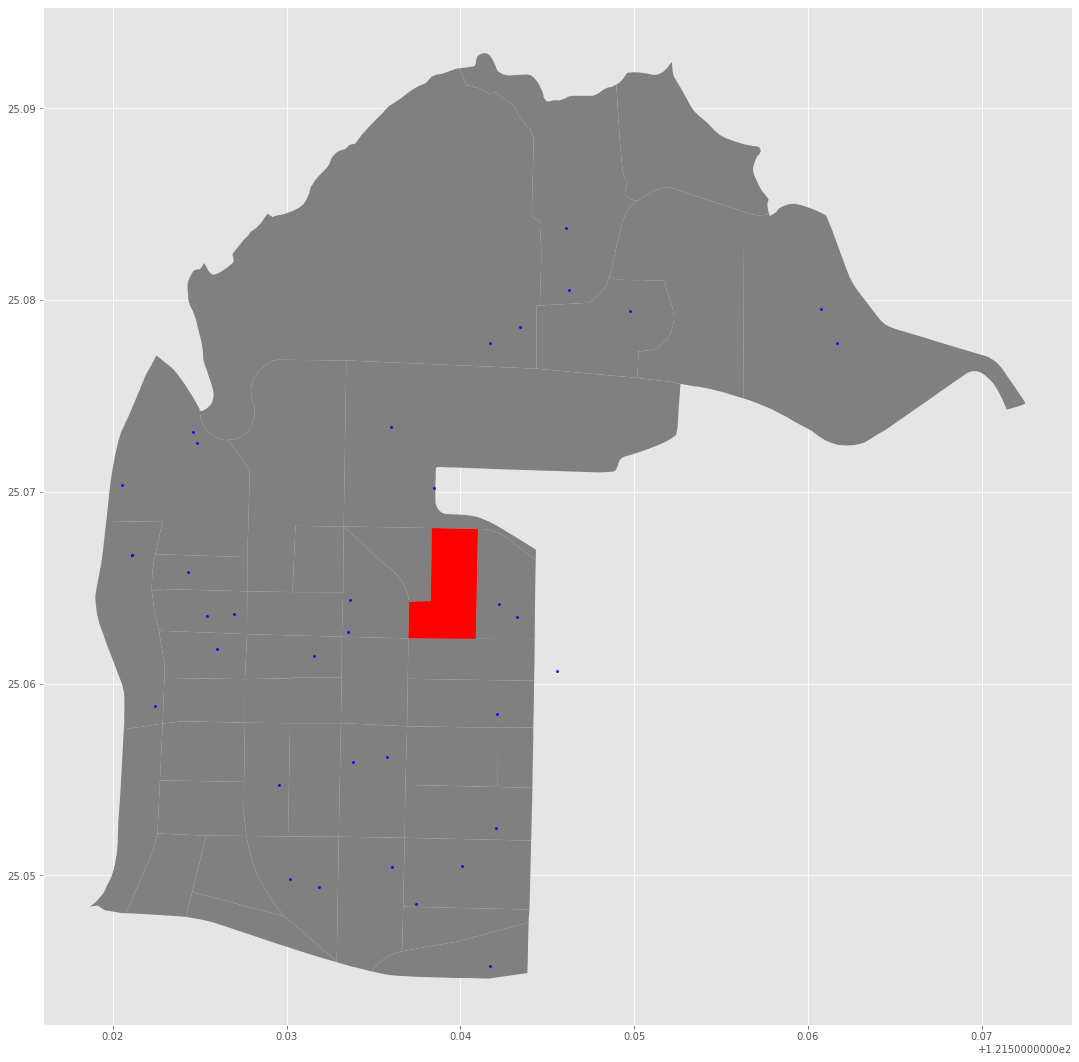

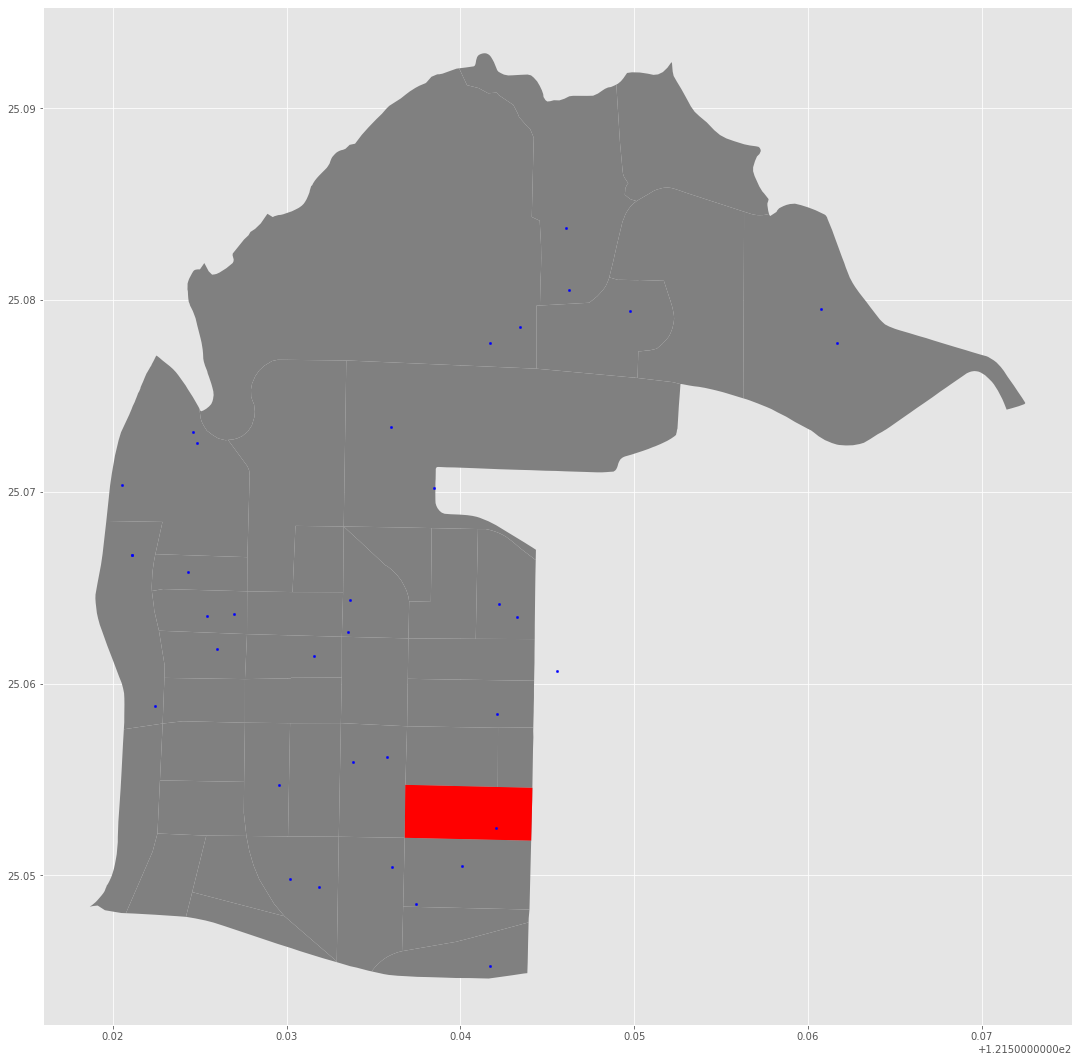

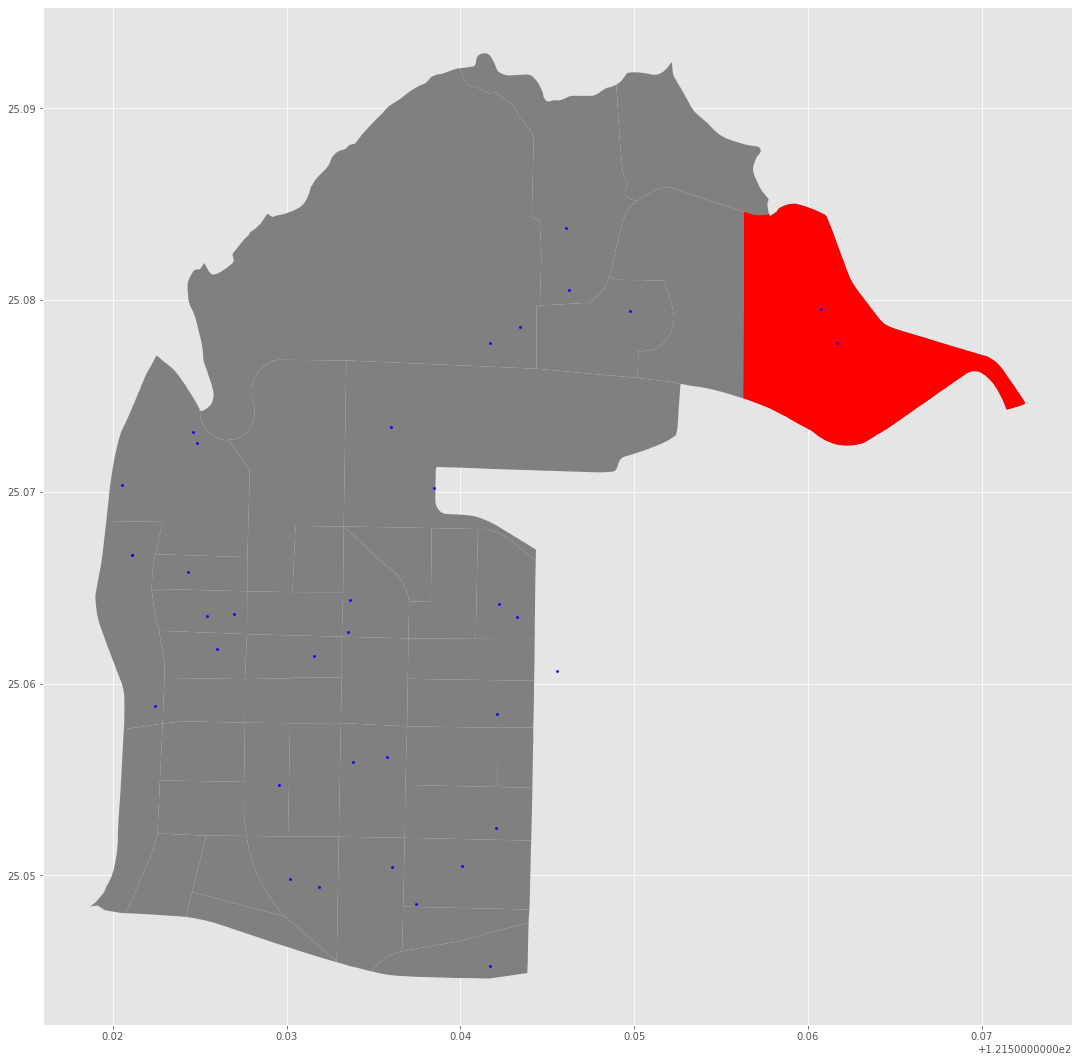

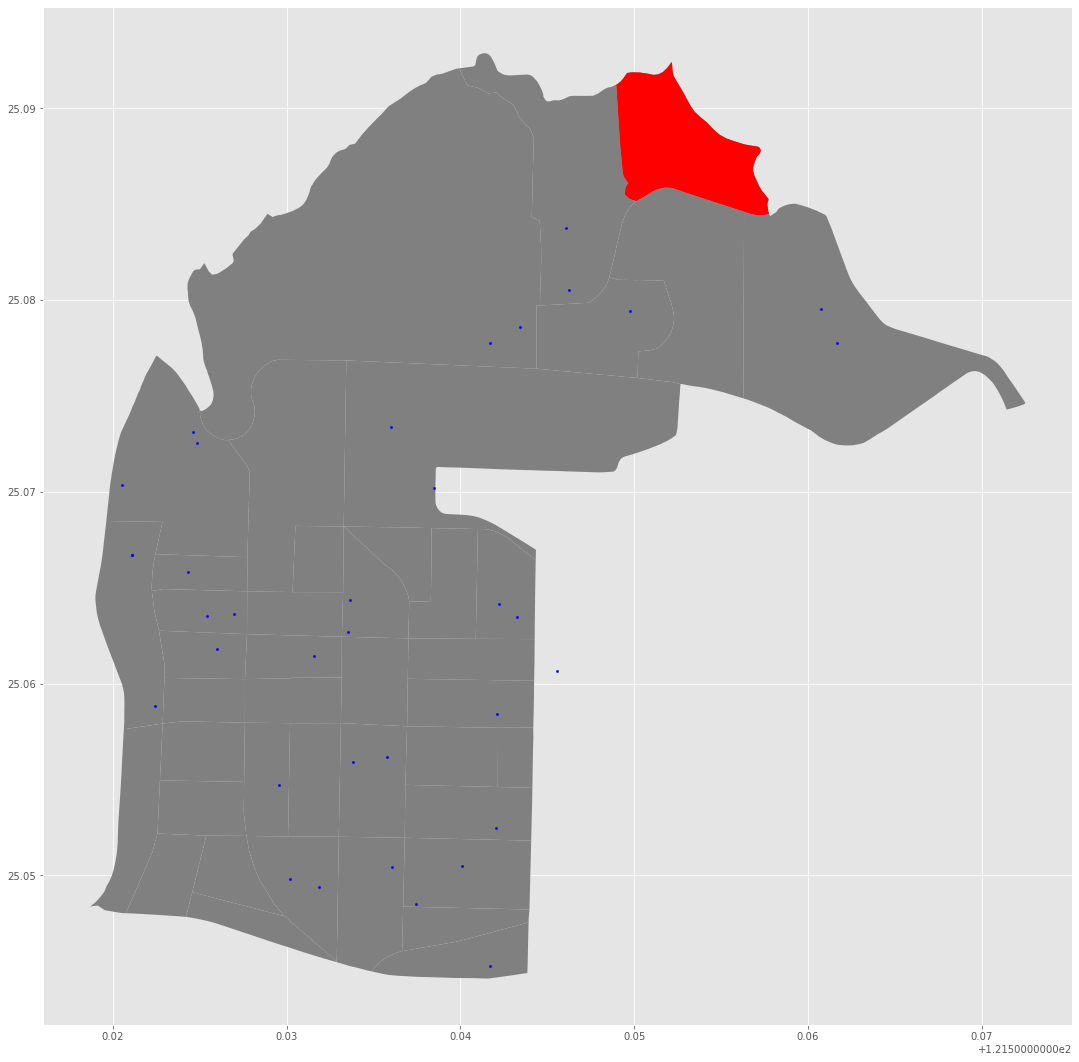

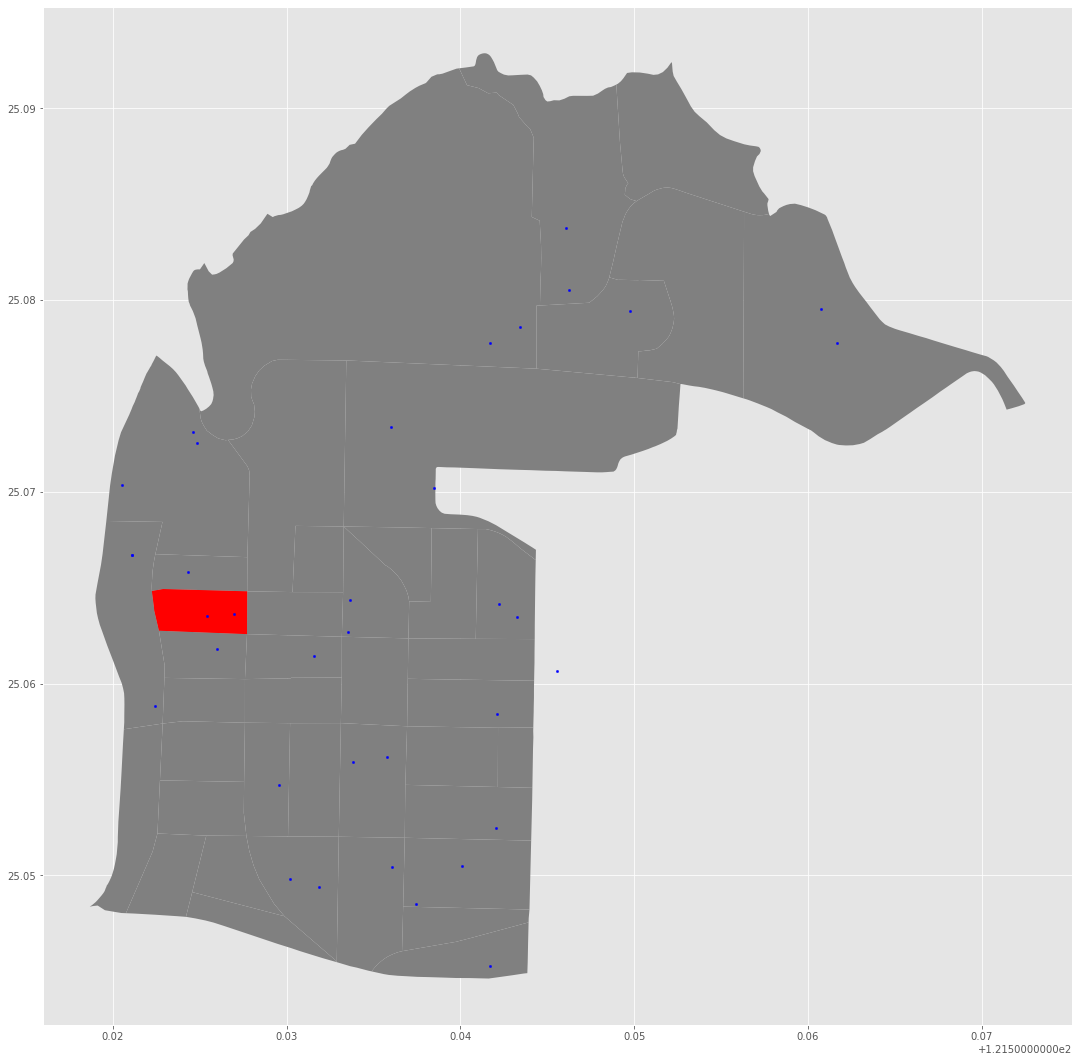

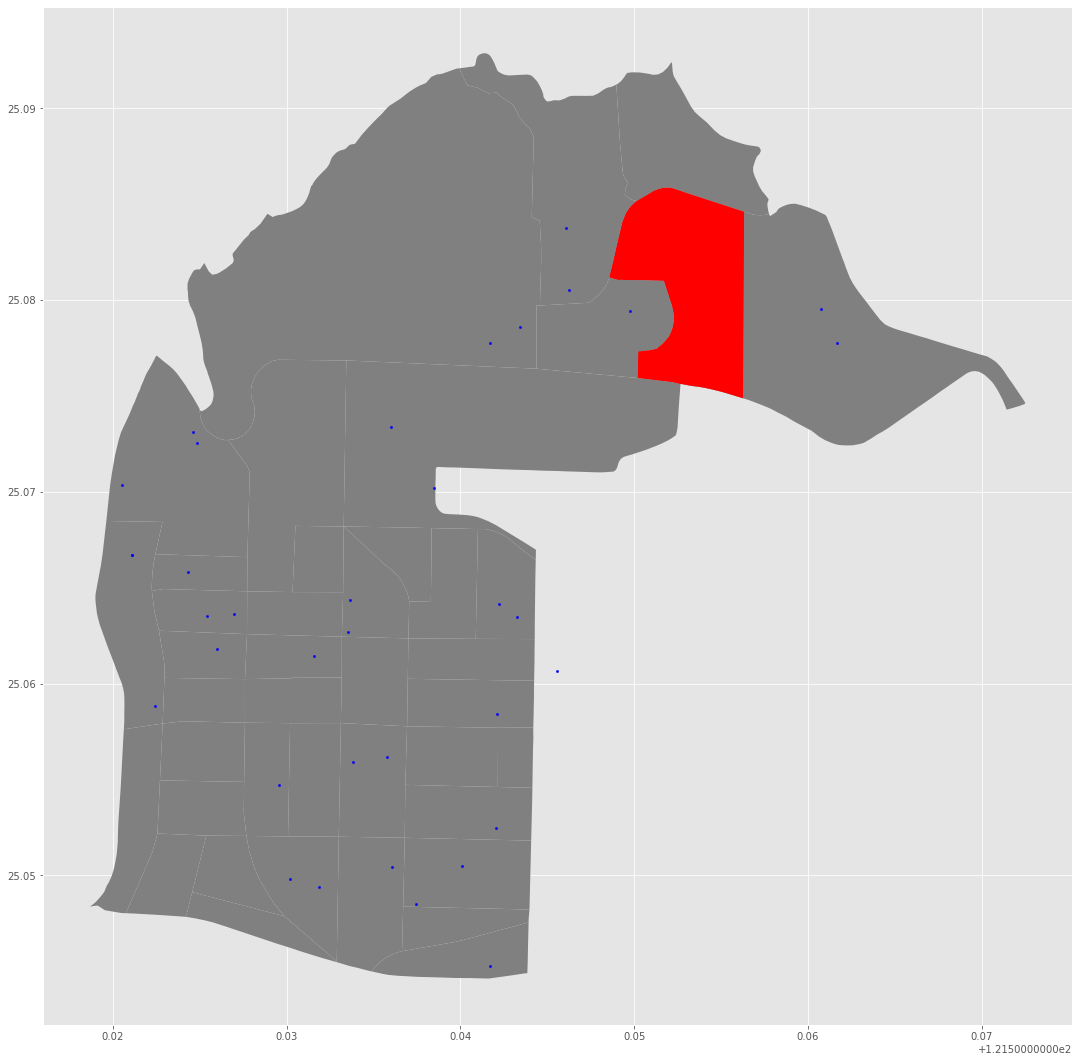

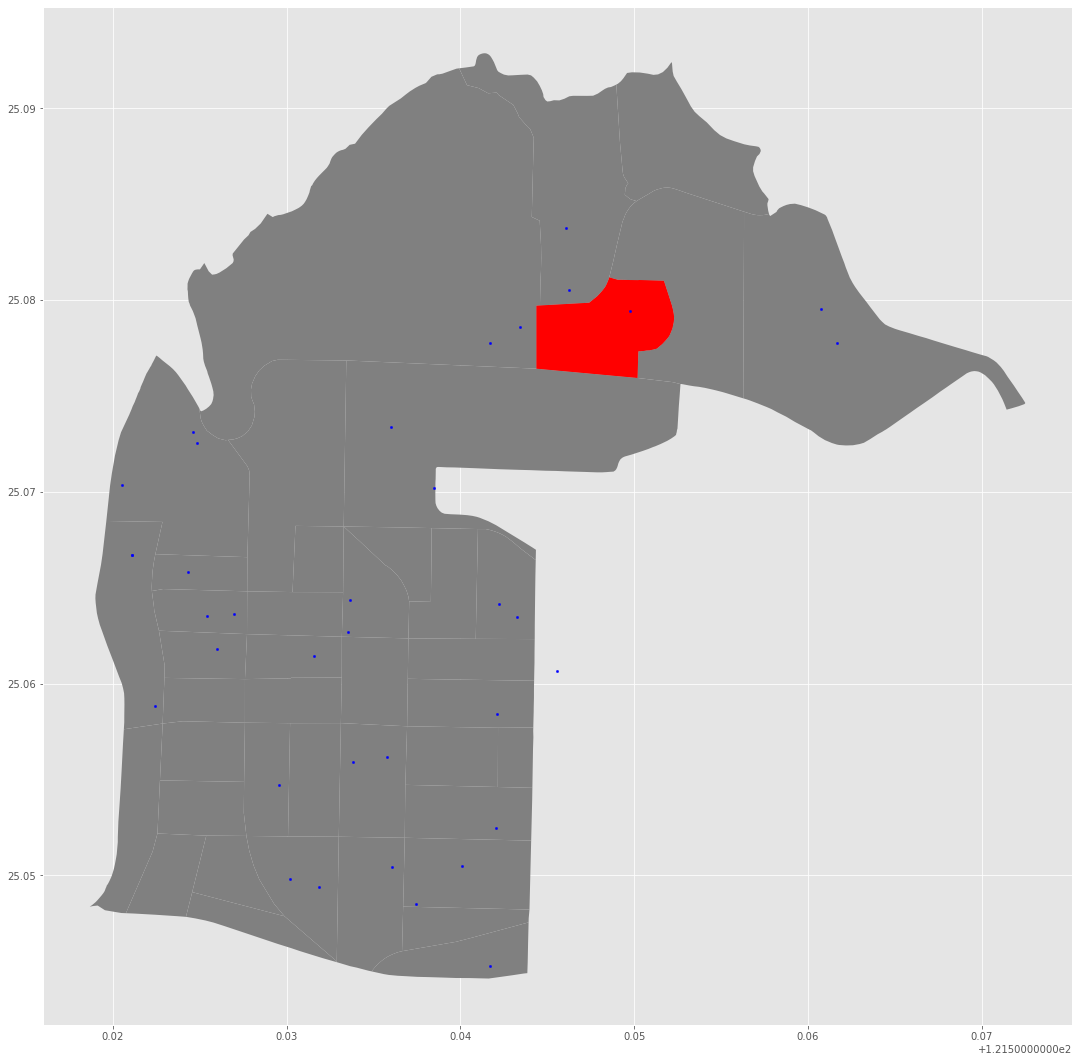

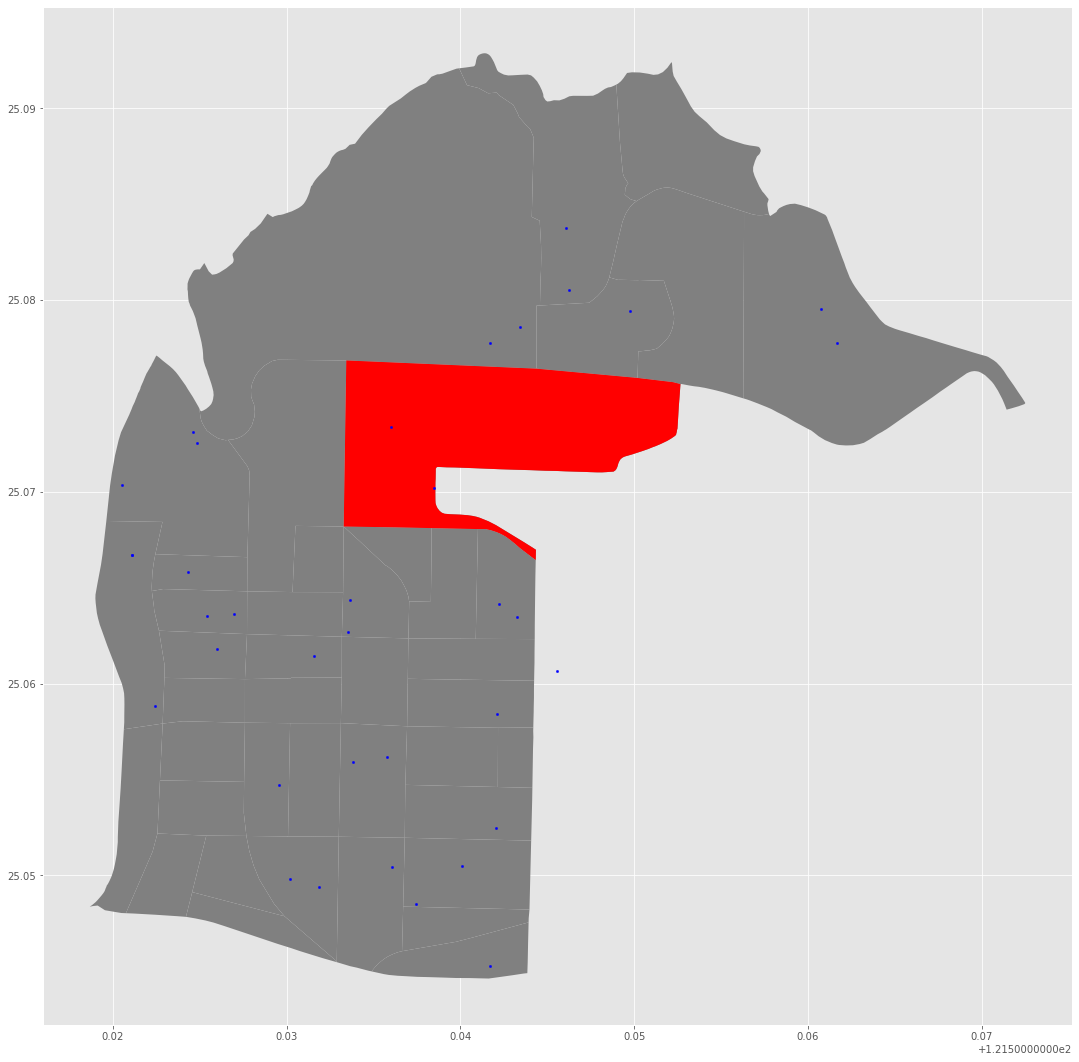

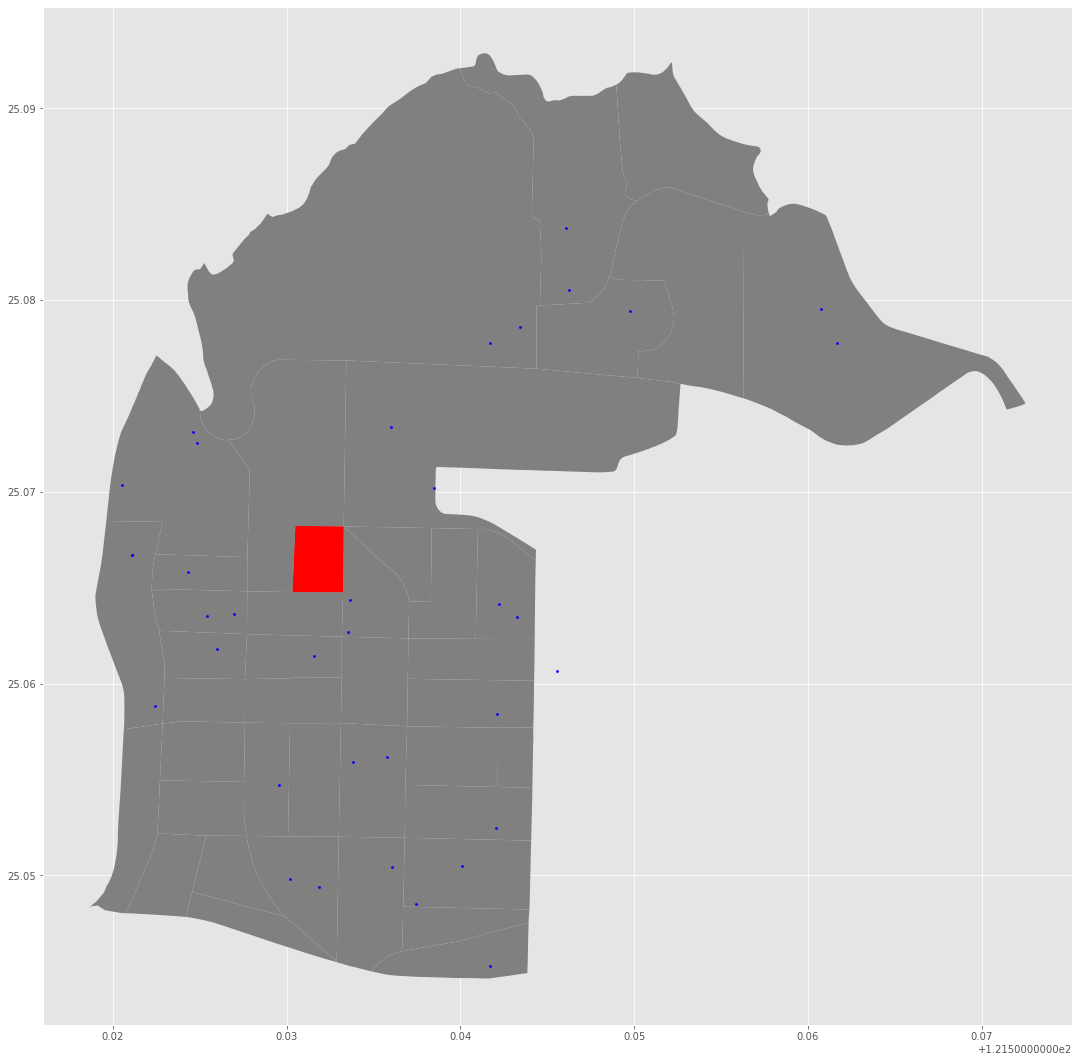

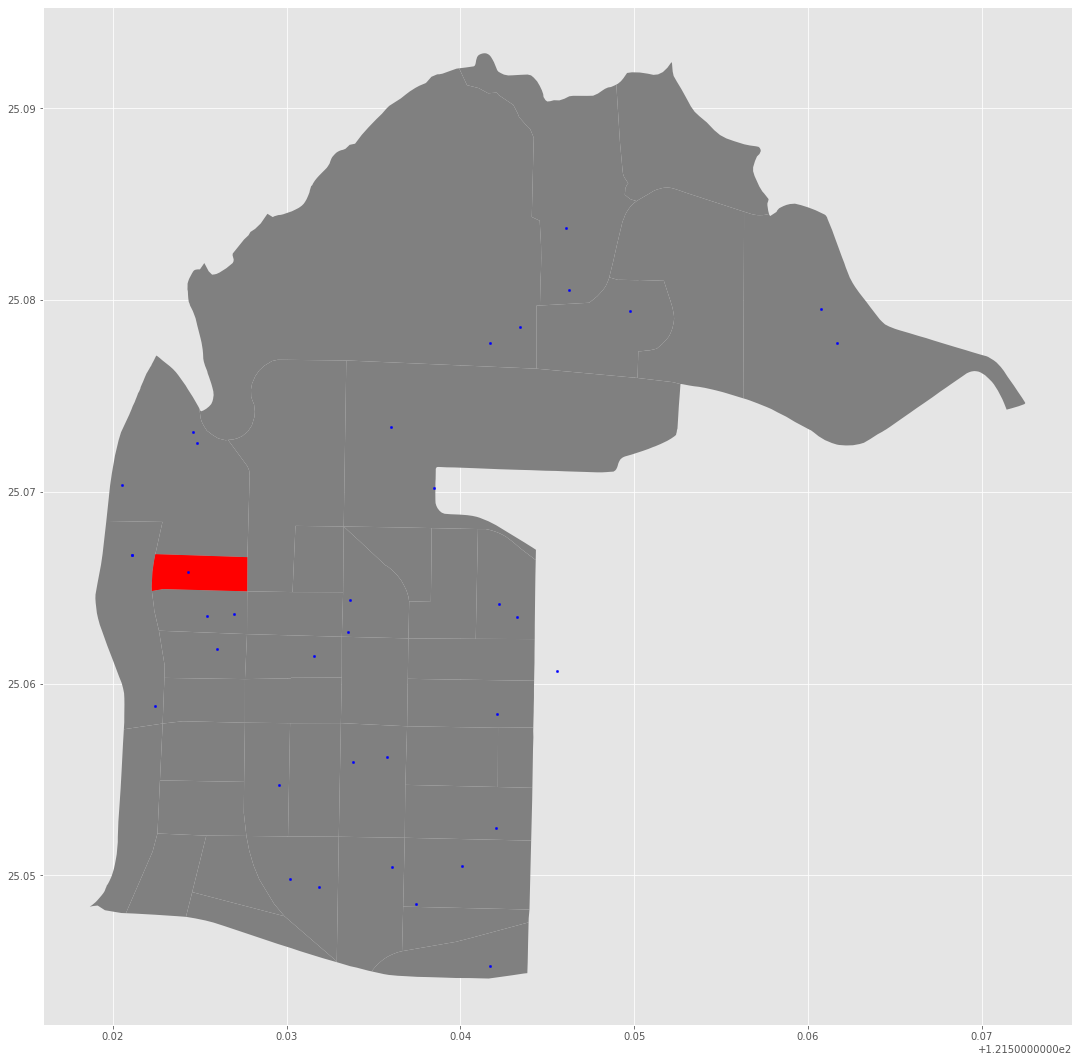

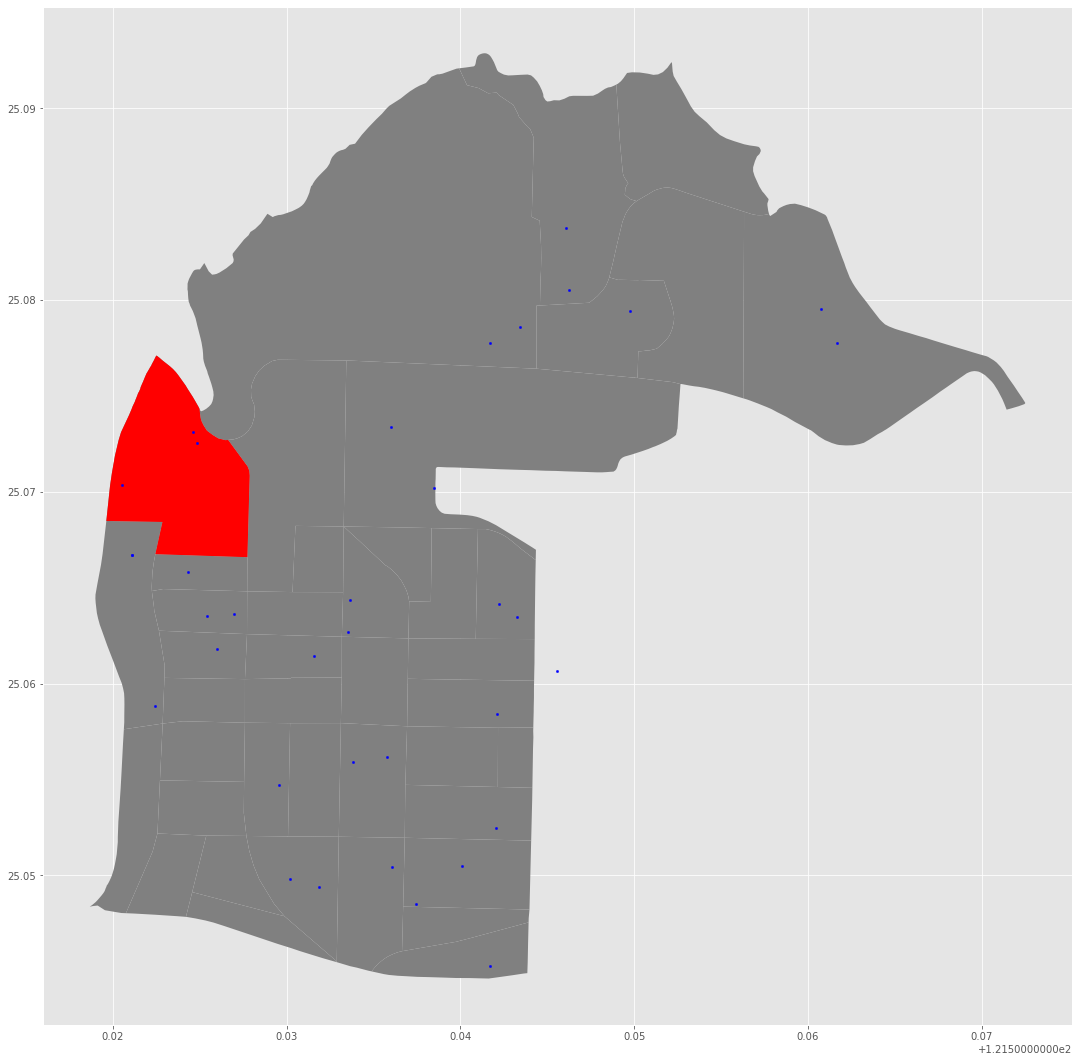

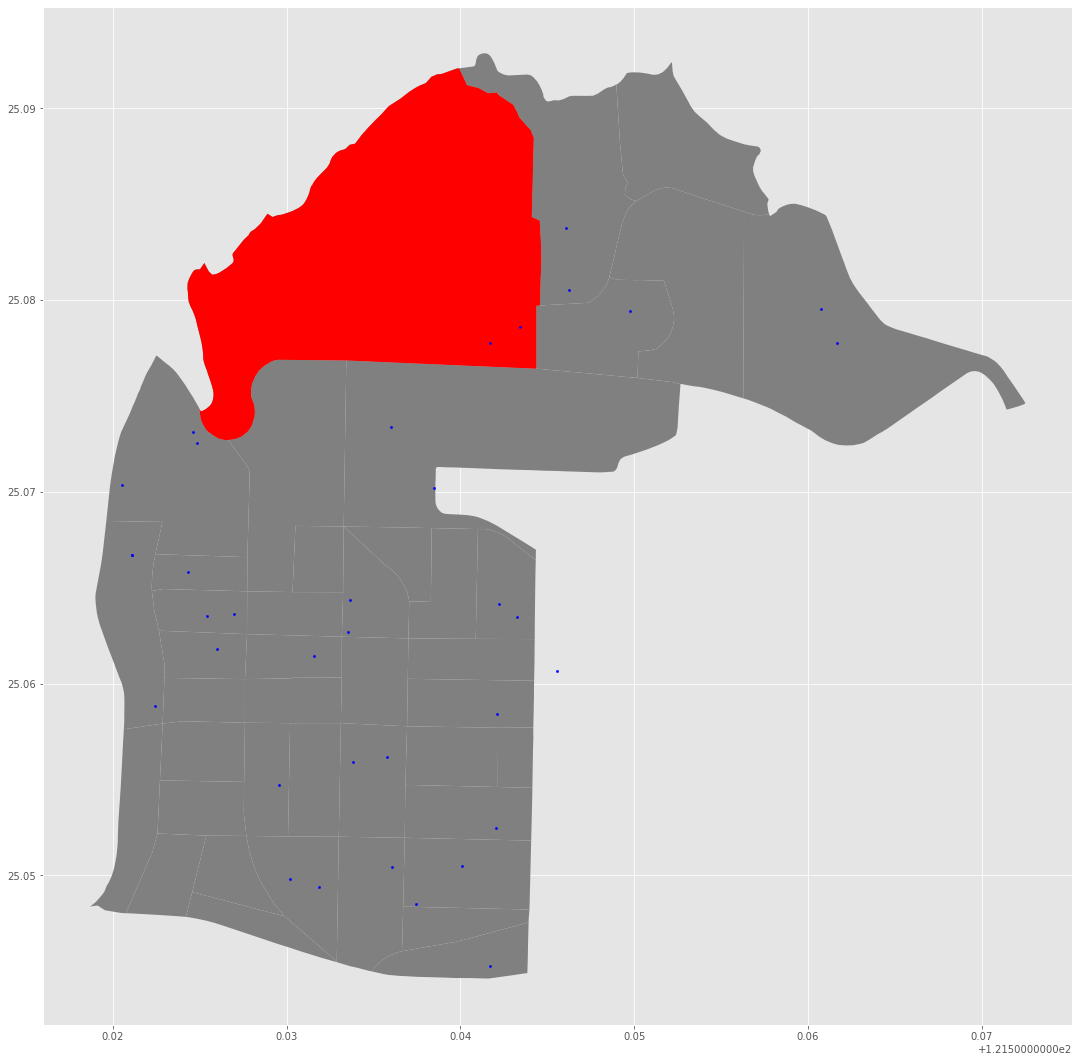

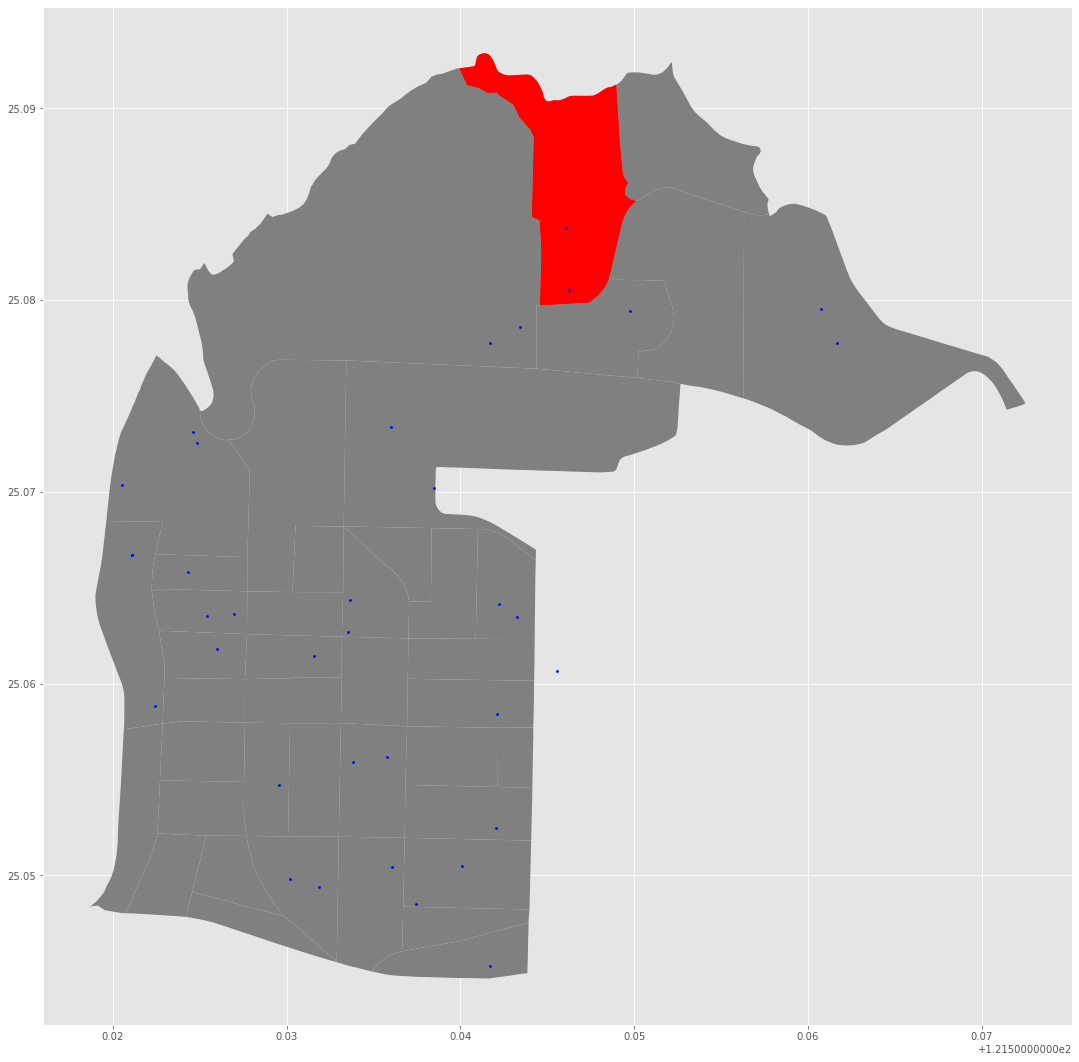

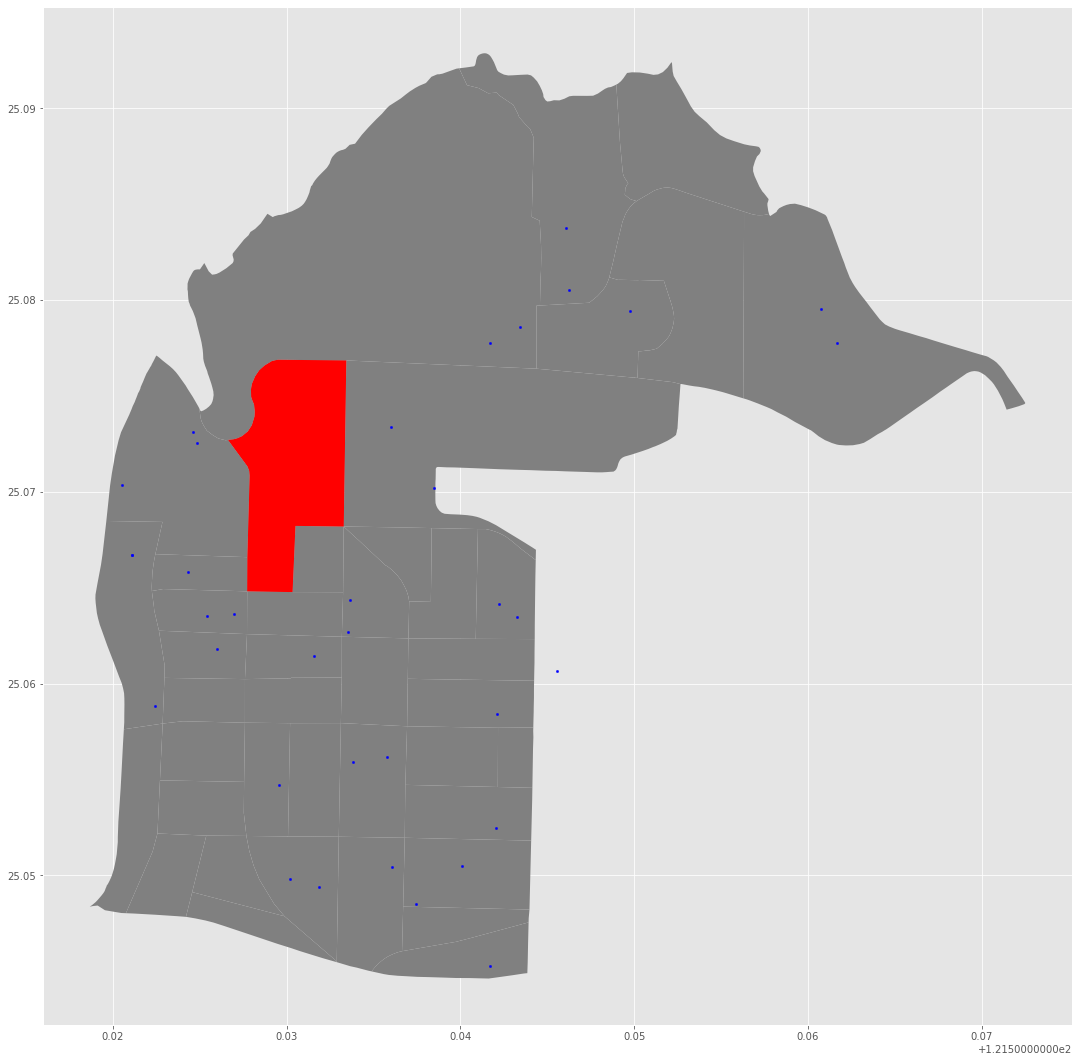

In [33]:
c = 0
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 15)

for villages in village_list:
    subcatch = zhongshan_gpd.loc[zhongshan_gpd["VILLNAME"] == villages]

    subcatch.reset_index(drop=True, inplace=True)
    
    pip_mask = lat_lon_school.within(subcatch.loc[0, 'geometry'])
    
    pip_data = lat_lon_school.loc[pip_mask]
    
    print(c, pip_data)
    
    n = pip_data.to_file(f"{villages}_school.shp",encoding='utf-8')
    
    c += 1

    fig, ax = plt.subplots()

    zhongshan_gpd.plot(ax=ax, facecolor='gray')

    subcatch.plot(ax=ax, facecolor='red')

    lat_lon_school.plot(ax=ax, color='blue', markersize=5)

    plt.tight_layout()

In [34]:
for villages in village_list:
    n = gpd.GeoDataFrame.from_file(f"{villages}_school.shp",encoding='utf-8')
    n.insert(loc=1, column="village", value = villages)
    n.to_csv(f"{villages}_school.csv", encoding="utf-8",  index=False)
    right = pd.read_csv(f"{villages}_school.csv")

In [35]:
school_1 = pd.read_csv("集英里_school.csv")
school_1

address village      name   Latitude   Longitude  \
0    台北市中山區中山北路三段40號     集英里  私立大同高級中學  25.066684  121.521076   
1  台北市中山區中山北路三段40號1樓     集英里      大同大學  25.066684  121.521076   
2    台北市中山區中山北路二段92號     集英里    馬偕紀念醫院  25.058846  121.522398   

                         geometry  
0  POINT (121.5210761 25.0666839)  
1  POINT (121.5210761 25.0666839)  
2  POINT (121.5223977 25.0588457)

In [36]:
school_2 = pd.read_csv("聚葉里_school.csv")
school_2

address village    name   Latitude   Longitude  \
0  台北市中山區林森北路511號     聚葉里  新興國民中學  25.061799  121.525983   

                         geometry  
0  POINT (121.5259829 25.0617989)

In [37]:
data_school = pd.concat([school_1, school_2])
data_school

address village      name   Latitude   Longitude  \
0    台北市中山區中山北路三段40號     集英里  私立大同高級中學  25.066684  121.521076   
1  台北市中山區中山北路三段40號1樓     集英里      大同大學  25.066684  121.521076   
2    台北市中山區中山北路二段92號     集英里    馬偕紀念醫院  25.058846  121.522398   
0     台北市中山區林森北路511號     聚葉里    新興國民中學  25.061799  121.525983   

                         geometry  
0  POINT (121.5210761 25.0666839)  
1  POINT (121.5210761 25.0666839)  
2  POINT (121.5223977 25.0588457)  
0  POINT (121.5259829 25.0617989)

In [38]:
run = True
c = 9
while run:
    try:
        school_3 = pd.read_csv(f"{village_list[c]}_school.csv")
        data_school = pd.concat([data_school, school_3], ignore_index=True)
        c += 1
    except:
        run = False
data_school
data_school.to_csv("zh_school.csv",index=False)

In [39]:
school_count = data_school.groupby("village").count()
school_count

address  name  Latitude  Longitude  geometry
village                                              
下埤里            2     2         2          2         2
中原里            1     1         1          1         1
中央里            2     2         2          2         2
劍潭里            2     2         2          2         2
力行里            2     2         2          2         2
圓山里            3     3         3          3         3
埤頭里            1     1         1          1         1
大佳里            2     2         2          2         2
大直里            2     2         2          2         2
復華里            1     1         1          1         1
恆安里            2     2         2          2         2
新生里            1     1         1          1         1
晴光里            1     1         1          1         1
朱園里            1     1         1          1         1
永安里            1     1         1          1         1
江山里            1     1         1          1         1
聚葉里            1     1         1          1         1
興亞里            2     2         2          2         2
行政里            2     2         2          2         2
金泰里            2     2         2          2         2
集英里            3     3         3          3         3

In [40]:
school_count.reset_index(inplace=True)
school_count
school_count = school_count.drop(["address", "name", "Latitude", "Longitude"], axis=1)
school_count = school_count.rename(columns={"geometry":"count_school"})
school_count

village  count_school
0      下埤里             2
1      中原里             1
2      中央里             2
3      劍潭里             2
4      力行里             2
5      圓山里             3
6      埤頭里             1
7      大佳里             2
8      大直里             2
9      復華里             1
10     恆安里             2
11     新生里             1
12     晴光里             1
13     朱園里             1
14     永安里             1
15     江山里             1
16     聚葉里             1
17     興亞里             2
18     行政里             2
19     金泰里             2
20     集英里             3

In [41]:
count_data = pd.read_excel("count_data.xlsx")
count_data = count_data.drop(["Unnamed: 0"],axis=1)
count_data.to_csv("count_data.csv", index=False)

In [42]:
count_data

village  MRT  count_school
0      民安里    3             0
1      康樂里    0             0
2      中山里    0             0
3      聚盛里    0             0
4      正守里    0             0
5      正義里    0             0
6      正得里    0             0
7      集英里    7             3
8      聚葉里    2             1
9      中吉里    1             0
10     中原里    0             1
11     興亞里    3             2
12     埤頭里    0             1
13     朱崙里    0             0
14     力行里    3             2
15     中央里    2             2
16     朱馥里    0             0
17     龍洲里    0             0
18     朱園里    2             1
19     新福里    0             0
20     松江里    2             0
21     行孝里    0             0
22     下埤里    0             2
23     江寧里    1             0
24     江山里    0             1
25     新生里    1             1
26     中庄里    1             0
27     行政里    0             2
28     行仁里    0             0
29     復華里    2             1
30     金泰里    0             2
31     北安里    1             0
32     恆安里    2             2
33     成功里    2             0
34     永安里    2             1
35     大佳里    0             2
36     新喜里    0             0
37     晴光里    0             1
38     圓山里    2             3
39     劍潭里    0             2
40     大直里    1             2
41     新庄里    0             0